## 구글 결측치, 이상치 제거 전처리 코드

In [73]:
import pandas as pd

bangkok_26 = pd.read_csv(f'/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/이상치 결측치 제거 전 구글 데이터/google_bangkok_26.csv')
bangkok_27 = pd.read_csv(f'/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/이상치 결측치 제거 전 구글 데이터/google_bangkok_27.csv')
danang_26 = pd.read_csv(f'/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/이상치 결측치 제거 전 구글 데이터/google_danang_26.csv')
danang_27 = pd.read_csv(f'/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/이상치 결측치 제거 전 구글 데이터/google_danang_27.csv')
osaka_26 = pd.read_csv(f'/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/이상치 결측치 제거 전 구글 데이터/google_osaka_26.csv')
osaka_27 = pd.read_csv(f'/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/이상치 결측치 제거 전 구글 데이터/google_osaka_27.csv')


In [74]:
import datetime

# datetime 형식 변환
bangkok_26['추출시간'] = pd.to_datetime(bangkok_26['추출시간'])
bangkok_27['추출시간'] = pd.to_datetime(bangkok_27['추출시간'])

danang_26['추출시간'] = pd.to_datetime(danang_26['추출시간'])
danang_27['추출시간'] = pd.to_datetime(danang_27['추출시간'])

osaka_26['추출시간'] = pd.to_datetime(osaka_26['추출시간'])
osaka_27['추출시간'] = pd.to_datetime(osaka_27['추출시간'])

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# 편명, 추출시간을 기준으로 정렬 데이터
bangkok_26_sorted = bangkok_26.sort_values(by=['편명', '추출시간'])
bangkok_27_sorted = bangkok_27.sort_values(by=['편명', '추출시간'])

danang_26_sorted = danang_26.sort_values(by=['편명', '추출시간'])
danang_27_sorted = danang_27.sort_values(by=['편명', '추출시간'])

osaka_26_sorted = osaka_26.sort_values(by=['편명', '추출시간'])
osaka_27_sorted = osaka_27.sort_values(by=['편명', '추출시간'])

In [76]:
bangkok_26_sorted = bangkok_26_sorted.reset_index(drop=True)
bangkok_27_sorted = bangkok_27_sorted.reset_index(drop=True)

danang_26_sorted = danang_26_sorted.reset_index(drop=True)
danang_27_sorted = danang_27_sorted.reset_index(drop=True)

osaka_26_sorted = osaka_26_sorted.reset_index(drop=True)
osaka_27_sorted = osaka_27_sorted.reset_index(drop=True)

In [77]:
osaka_27_sorted

,항공사,출발시간,출발공항,도착시간,도착공항,비행방식,소요시간,편도/왕복,가격,추출시간,편명,비행일자,사이트
0,제주항공,09:10,ICN,11:00,KIX,직항,01시간 50분,편도,239900,2024-01-20 00:00:00,7C 1302,24.01.27(토),google
1,제주항공,09:10,ICN,11:00,KIX,직항,01시간 50분,편도,239900,2024-01-20 00:30:00,7C 1302,24.01.27(토),google
2,제주항공,09:10,ICN,11:00,KIX,직항,01시간 50분,편도,239900,2024-01-20 01:00:00,7C 1302,24.01.27(토),google
3,제주항공,09:10,ICN,11:00,KIX,직항,01시간 50분,편도,239900,2024-01-20 01:30:00,7C 1302,24.01.27(토),google
4,제주항공,09:10,ICN,11:00,KIX,직항,01시간 50분,편도,239900,2024-01-20 02:00:00,7C 1302,24.01.27(토),google
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4600,티웨이항공,14:40,ICN,16:30,KIX,직항,01시간 50분,편도,222300,2024-01-22 21:30:00,TW 285,24.01.27(토),google
4601,티웨이항공,14:40,ICN,16:30,KIX,직항,01시간 50분,편도,222300,2024-01-22 22:00:00,TW 285,24.01.27(토),google
4602,티웨이항공,14:40,ICN,16:30,KIX,직항,01시간 50분,편도,222300,2024-01-22 22:30:00,TW 285,24.01.27(토),google
4603,티웨이항공,14:40,ICN,16:30,KIX,직항,01시간 50분,편도,222300,2024-01-22 23:00:00,TW 285,24.01.27(토),google


In [78]:
# test_item = grouped_number

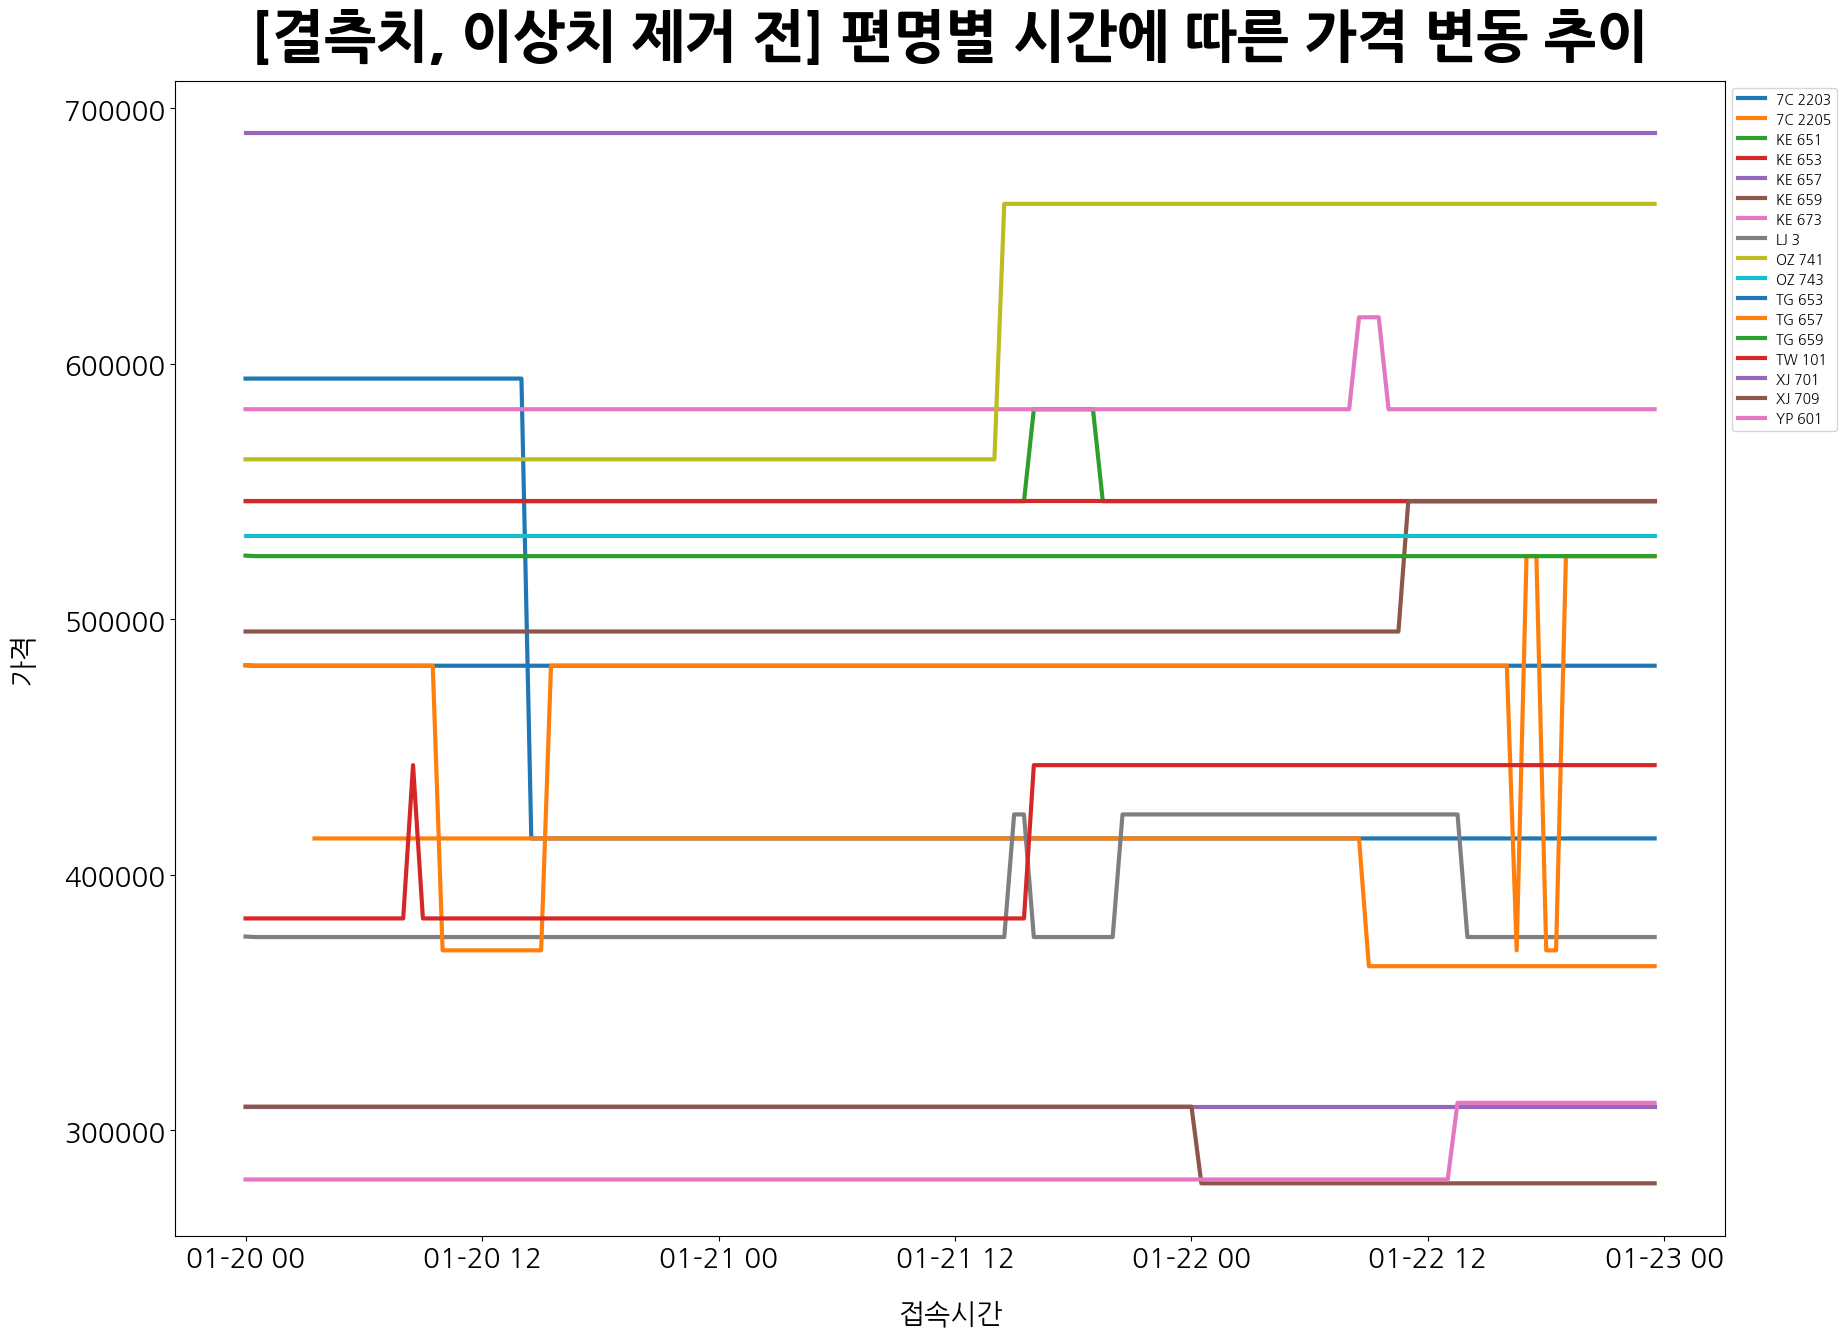

In [79]:
import koreanize_matplotlib
grouped_number = bangkok_26_sorted.groupby('편명')
grouped_date = bangkok_26_sorted.groupby('추출시간')

# plt.figure(figsize=(20,20))
# for name, group in grouped_number:
#     plt.plot(group['추출시간'], group['가격'], label=name)

# plt.xlabel('추출시간')
# plt.ylabel('가격')
# plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
# plt.legend()
# plt.show()


plt.figure(figsize=(20,15))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name, linewidth=3)

plt.xlabel('접속시간', fontsize= 20, labelpad=20)
plt.ylabel('가격', fontsize= 20, labelpad=20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.title('[결측치, 이상치 제거 전] 편명별 시간에 따른 가격 변동 추이',fontsize= 40, fontweight='bold', pad = 20)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### 결측치 제거 코드

## bangkok 26

In [67]:
list_bang26 = bangkok_26_sorted['편명'].unique()

# 편명마다 결측치가 있는지 프린트
for raw in list_bang26:
    print("편명:", raw, "개수:", len(bangkok_26_sorted[bangkok_26_sorted['편명']==raw]))

편명: 7C 2203 개수: 133
편명: 7C 2205 개수: 137
편명: KE 651 개수: 144
편명: KE 653 개수: 144
편명: KE 657 개수: 144
편명: KE 659 개수: 144
편명: KE 673 개수: 144
편명: LJ 3 개수: 144
편명: OZ 741 개수: 144
편명: OZ 743 개수: 144
편명: TG 653 개수: 144
편명: TG 657 개수: 144
편명: TG 659 개수: 144
편명: TW 101 개수: 144
편명: XJ 701 개수: 144
편명: XJ 709 개수: 143
편명: YP 601 개수: 143


/tmp/ipykernel_10042/3220930427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "편명", data= bangkok_26_sorted, palette='Set3')


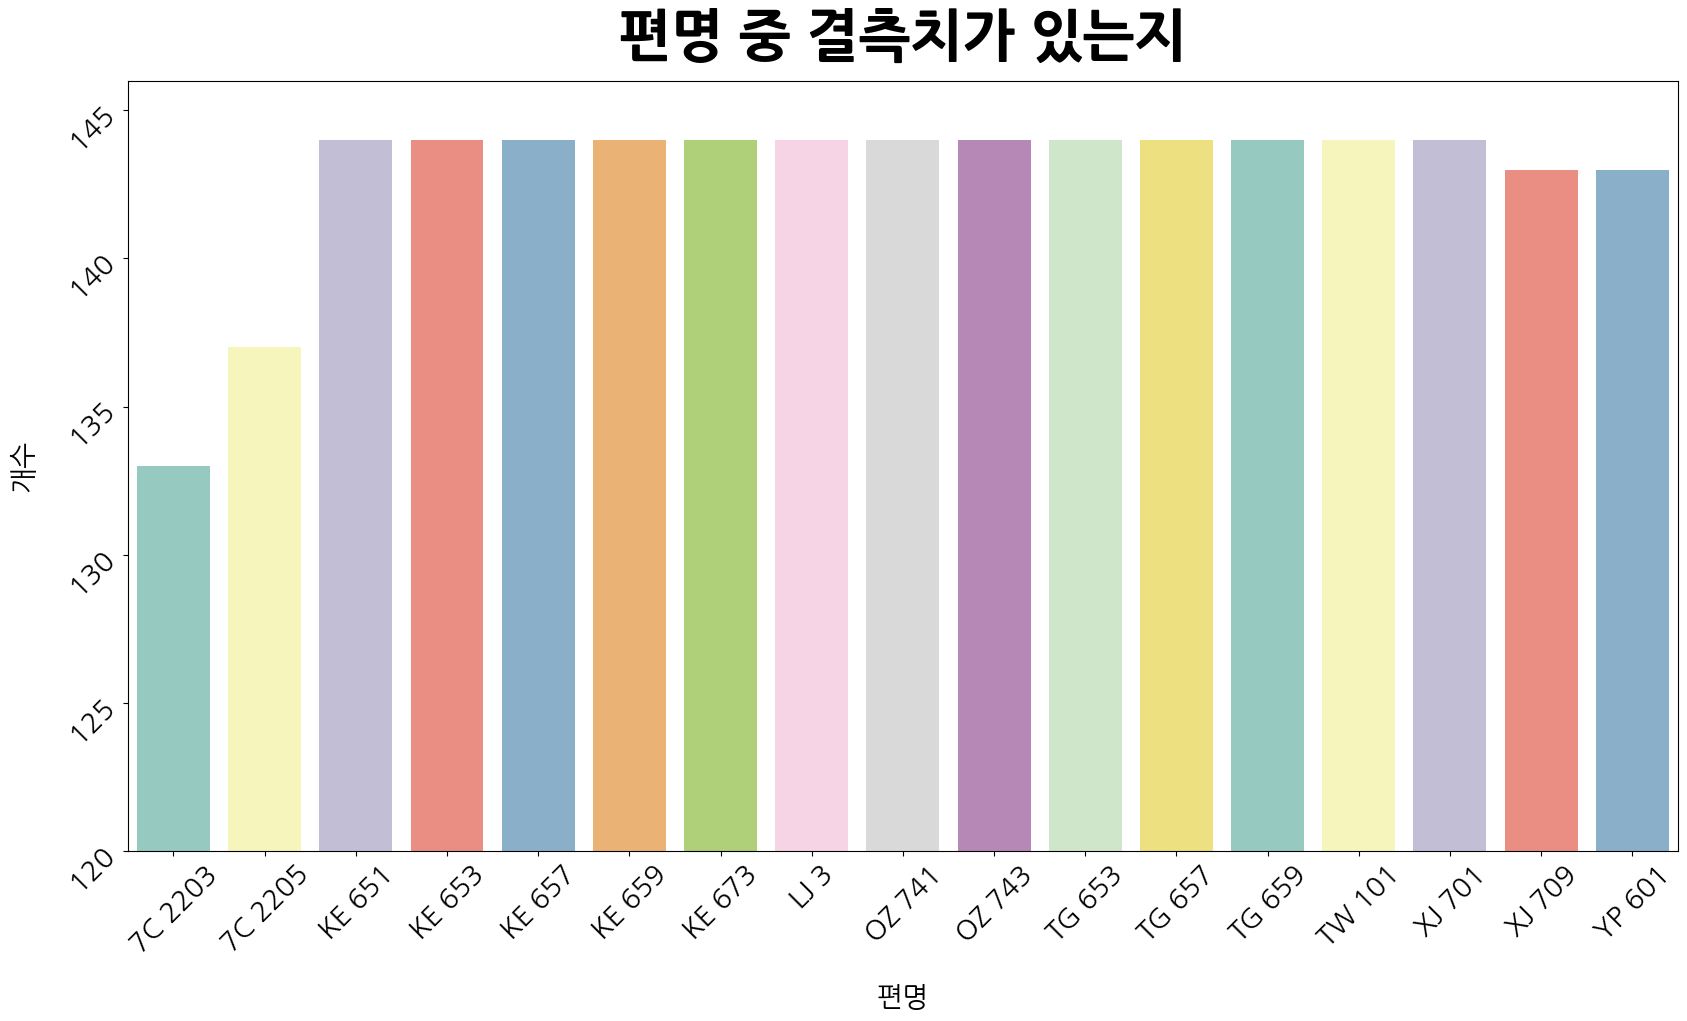

In [68]:
plt.figure(figsize=(20,10))
sns.countplot(x = "편명", data= bangkok_26_sorted, palette='Set3')

plt.xlabel('편명', fontsize= 20, labelpad=20)
plt.ylabel('개수', fontsize= 20, labelpad=20)
plt.xticks(fontsize= 20, rotation = 45)
plt.yticks(fontsize= 20, rotation = 45)
plt.title('편명 중 결측치가 있는지',fontsize= 40, fontweight='bold', pad = 20)
plt.ylim(120, 146)
plt.show()

In [69]:
# 제거
for raw in list_bang26:
    if len(bangkok_26_sorted[bangkok_26_sorted['편명']==raw]) != 144:
        print("편명 : ", raw, "제거합니다!.")
        bangkok_26_sorted = bangkok_26_sorted[bangkok_26_sorted['편명'] != raw]

편명 :  7C 2203 제거합니다!.
편명 :  7C 2205 제거합니다!.
편명 :  XJ 709 제거합니다!.
편명 :  YP 601 제거합니다!.


In [70]:
list_bang26 = bangkok_26_sorted['편명'].unique()
print("제거 후 편명 리스트 :", list_bang26)
print('')


for raw in list_bang26:
    print("편명:", raw, "개수:", len(bangkok_26_sorted[bangkok_26_sorted['편명']==raw]))

제거 후 편명 리스트 : ['KE 651' 'KE 653' 'KE 657' 'KE 659' 'KE 673' 'LJ 3' 'OZ 741' 'OZ 743'
 'TG 653' 'TG 657' 'TG 659' 'TW 101' 'XJ 701']

편명: KE 651 개수: 144
편명: KE 653 개수: 144
편명: KE 657 개수: 144
편명: KE 659 개수: 144
편명: KE 673 개수: 144
편명: LJ 3 개수: 144
편명: OZ 741 개수: 144
편명: OZ 743 개수: 144
편명: TG 653 개수: 144
편명: TG 657 개수: 144
편명: TG 659 개수: 144
편명: TW 101 개수: 144
편명: XJ 701 개수: 144


## 이상치 제거

In [71]:
bangkok_26_sorted = bangkok_26_sorted[bangkok_26_sorted['편명'] != 'TG 657']

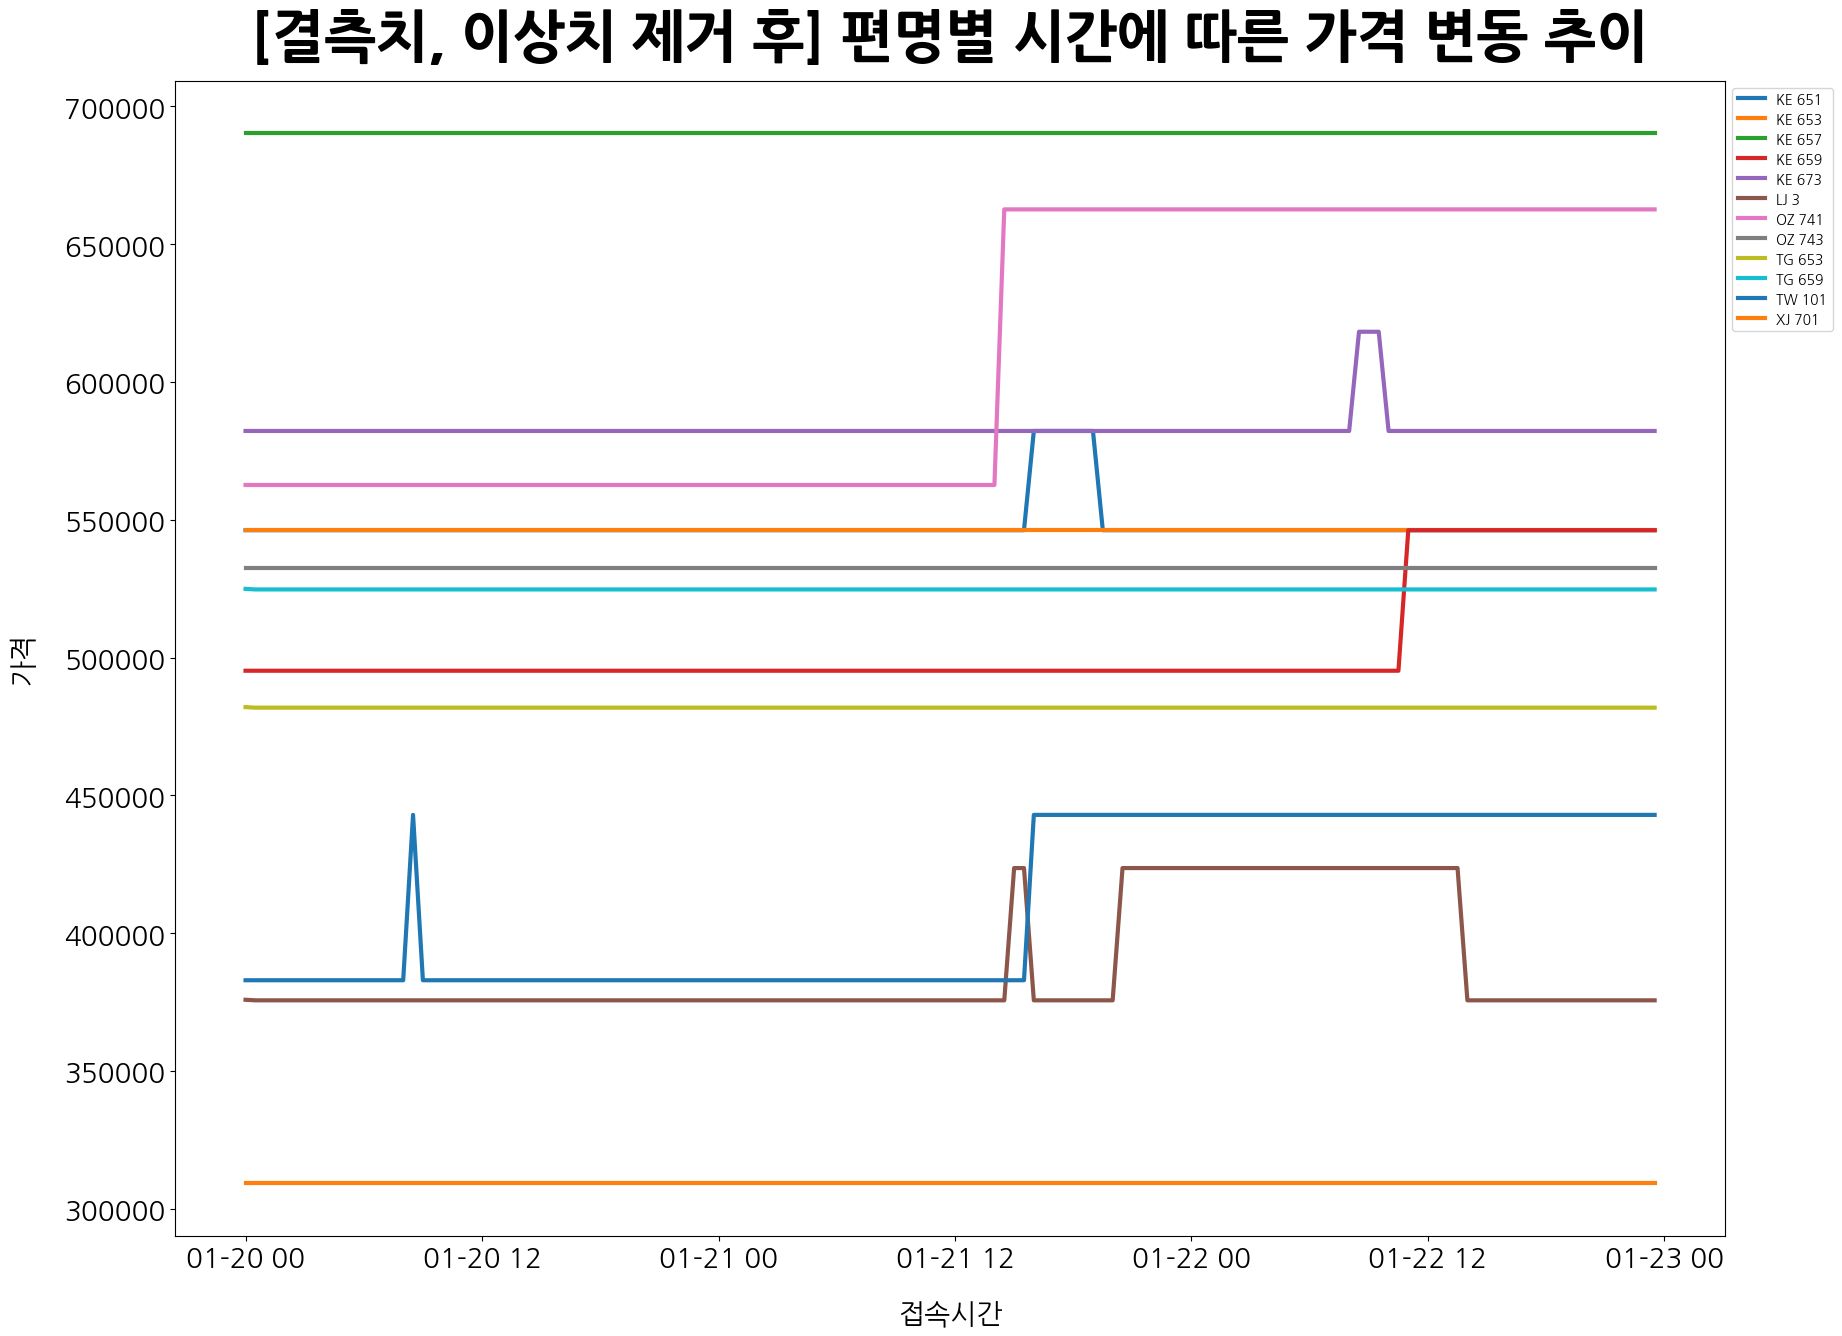

In [72]:
grouped_number = bangkok_26_sorted.groupby('편명')
grouped_date = bangkok_26_sorted.groupby('추출시간')


plt.figure(figsize=(20,15))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name,linewidth=3)

plt.xlabel('접속시간', fontsize= 20, labelpad=20)
plt.ylabel('가격', fontsize= 20, labelpad=20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.title('[결측치, 이상치 제거 후] 편명별 시간에 따른 가격 변동 추이',fontsize= 40, fontweight='bold', pad = 20)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

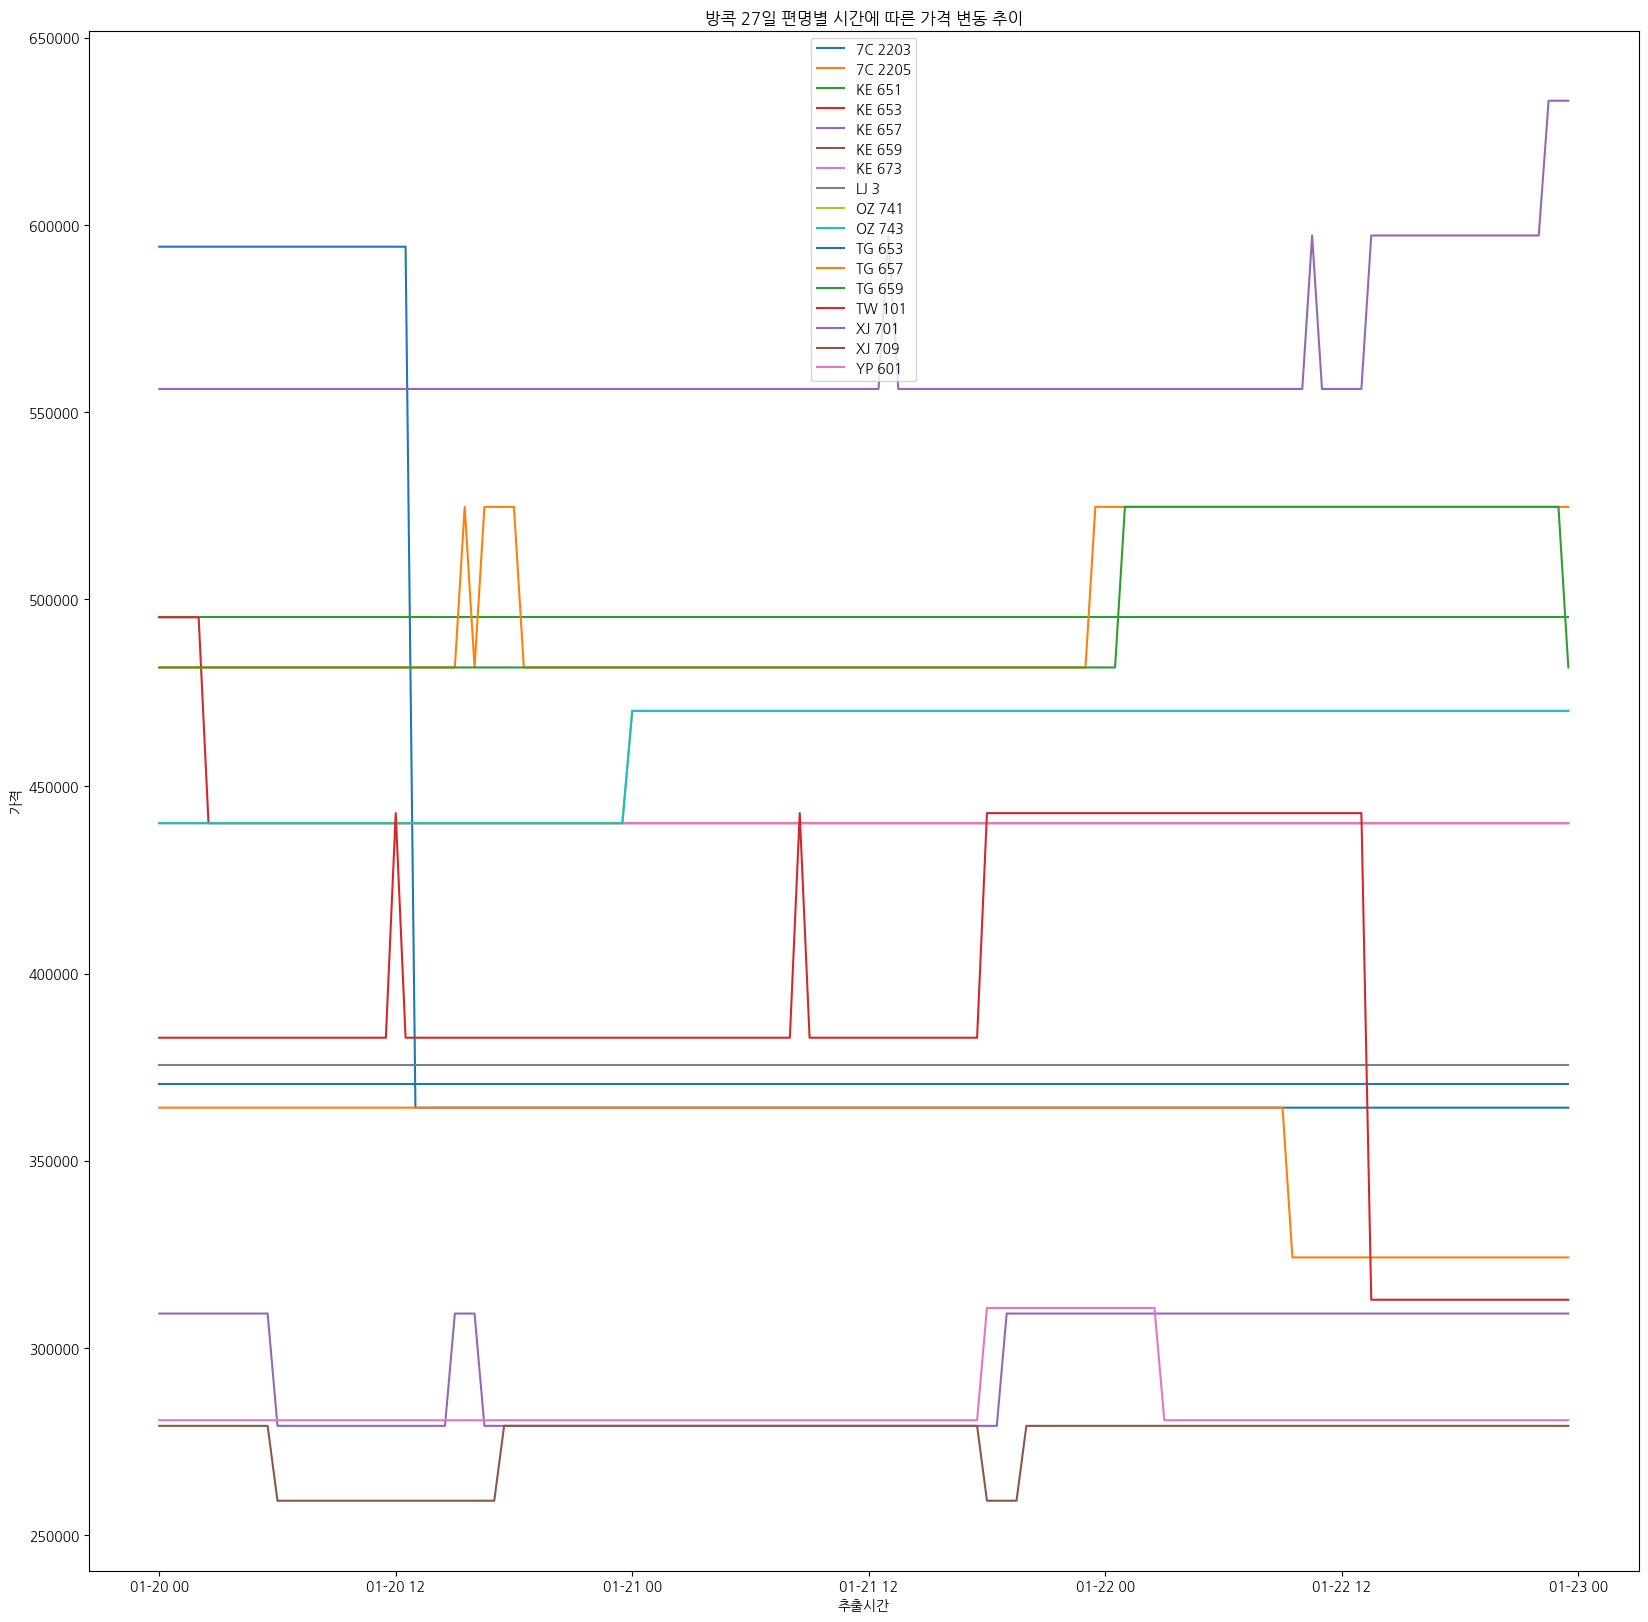

In [67]:
import koreanize_matplotlib
grouped_number = bangkok_27_sorted.groupby('편명')
grouped_date = bangkok_27_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('방콕 27일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

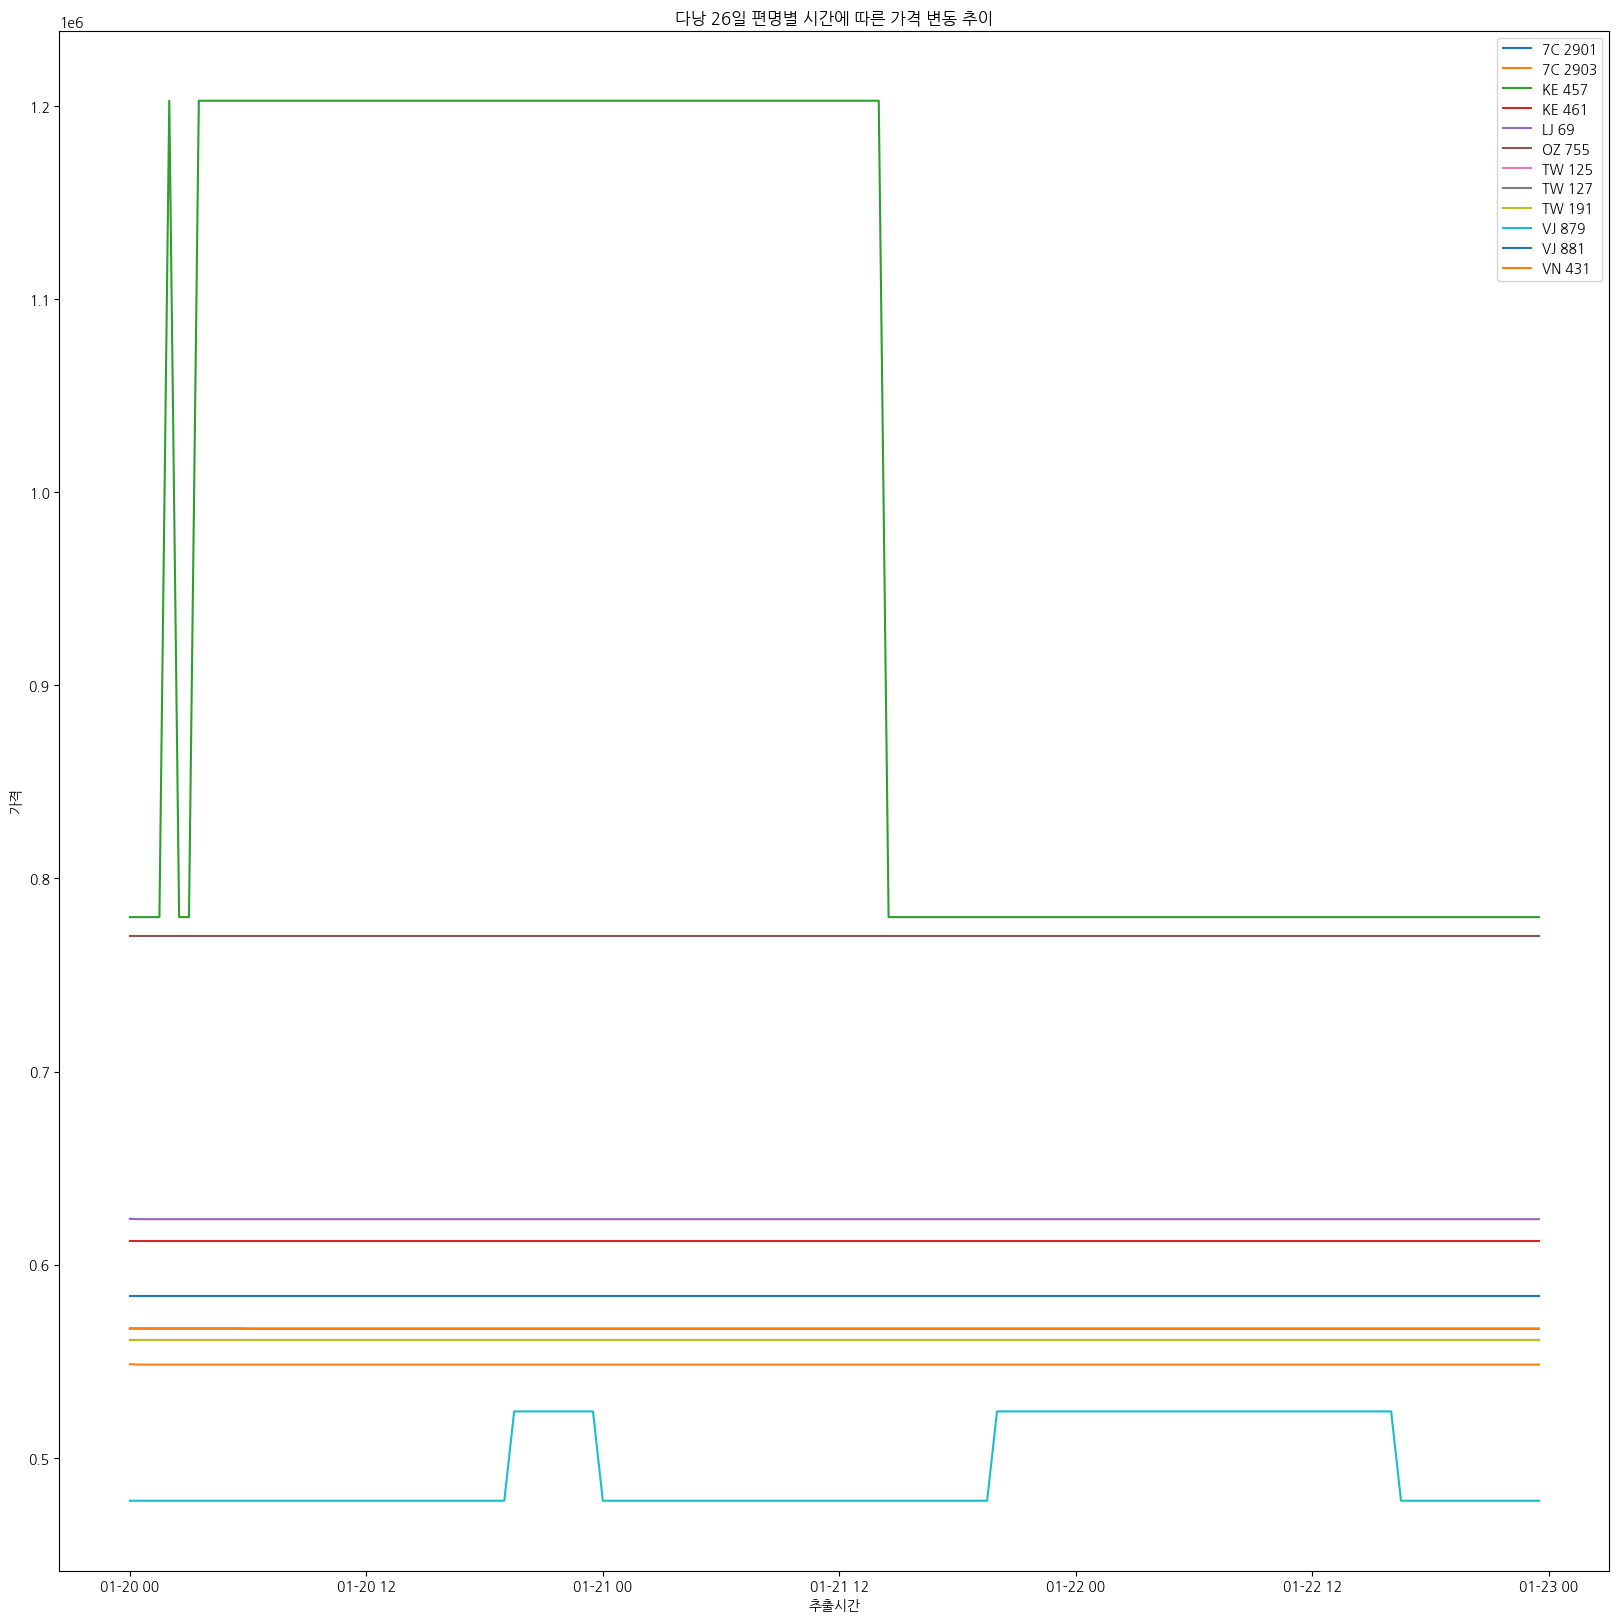

In [68]:
import koreanize_matplotlib
grouped_number = danang_26_sorted.groupby('편명')
grouped_date = danang_26_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('다낭 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

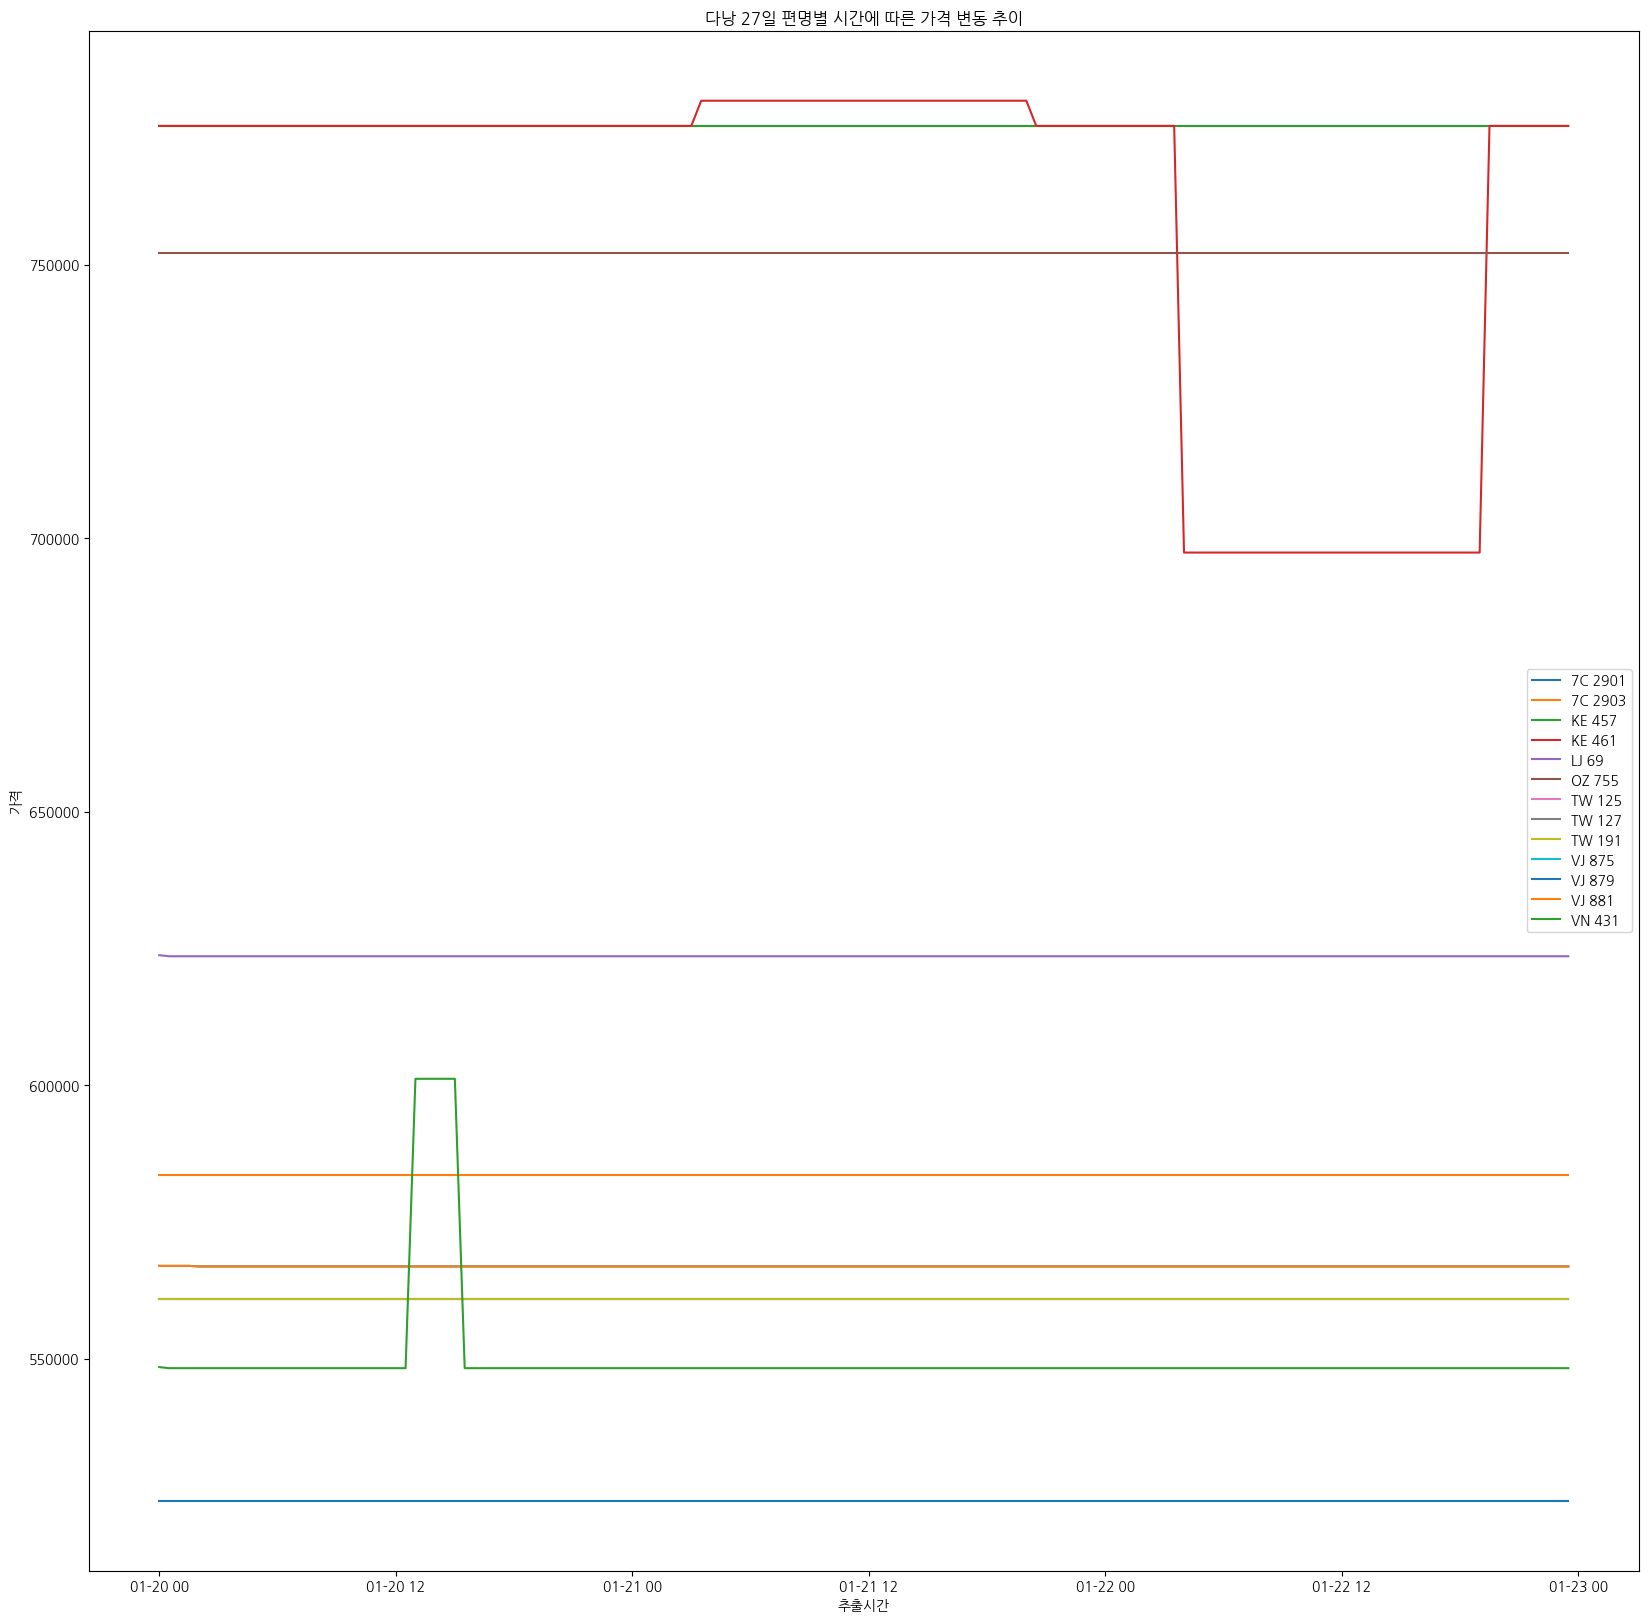

In [69]:
import koreanize_matplotlib
grouped_number = danang_27_sorted.groupby('편명')
grouped_date = danang_27_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('다낭 27일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

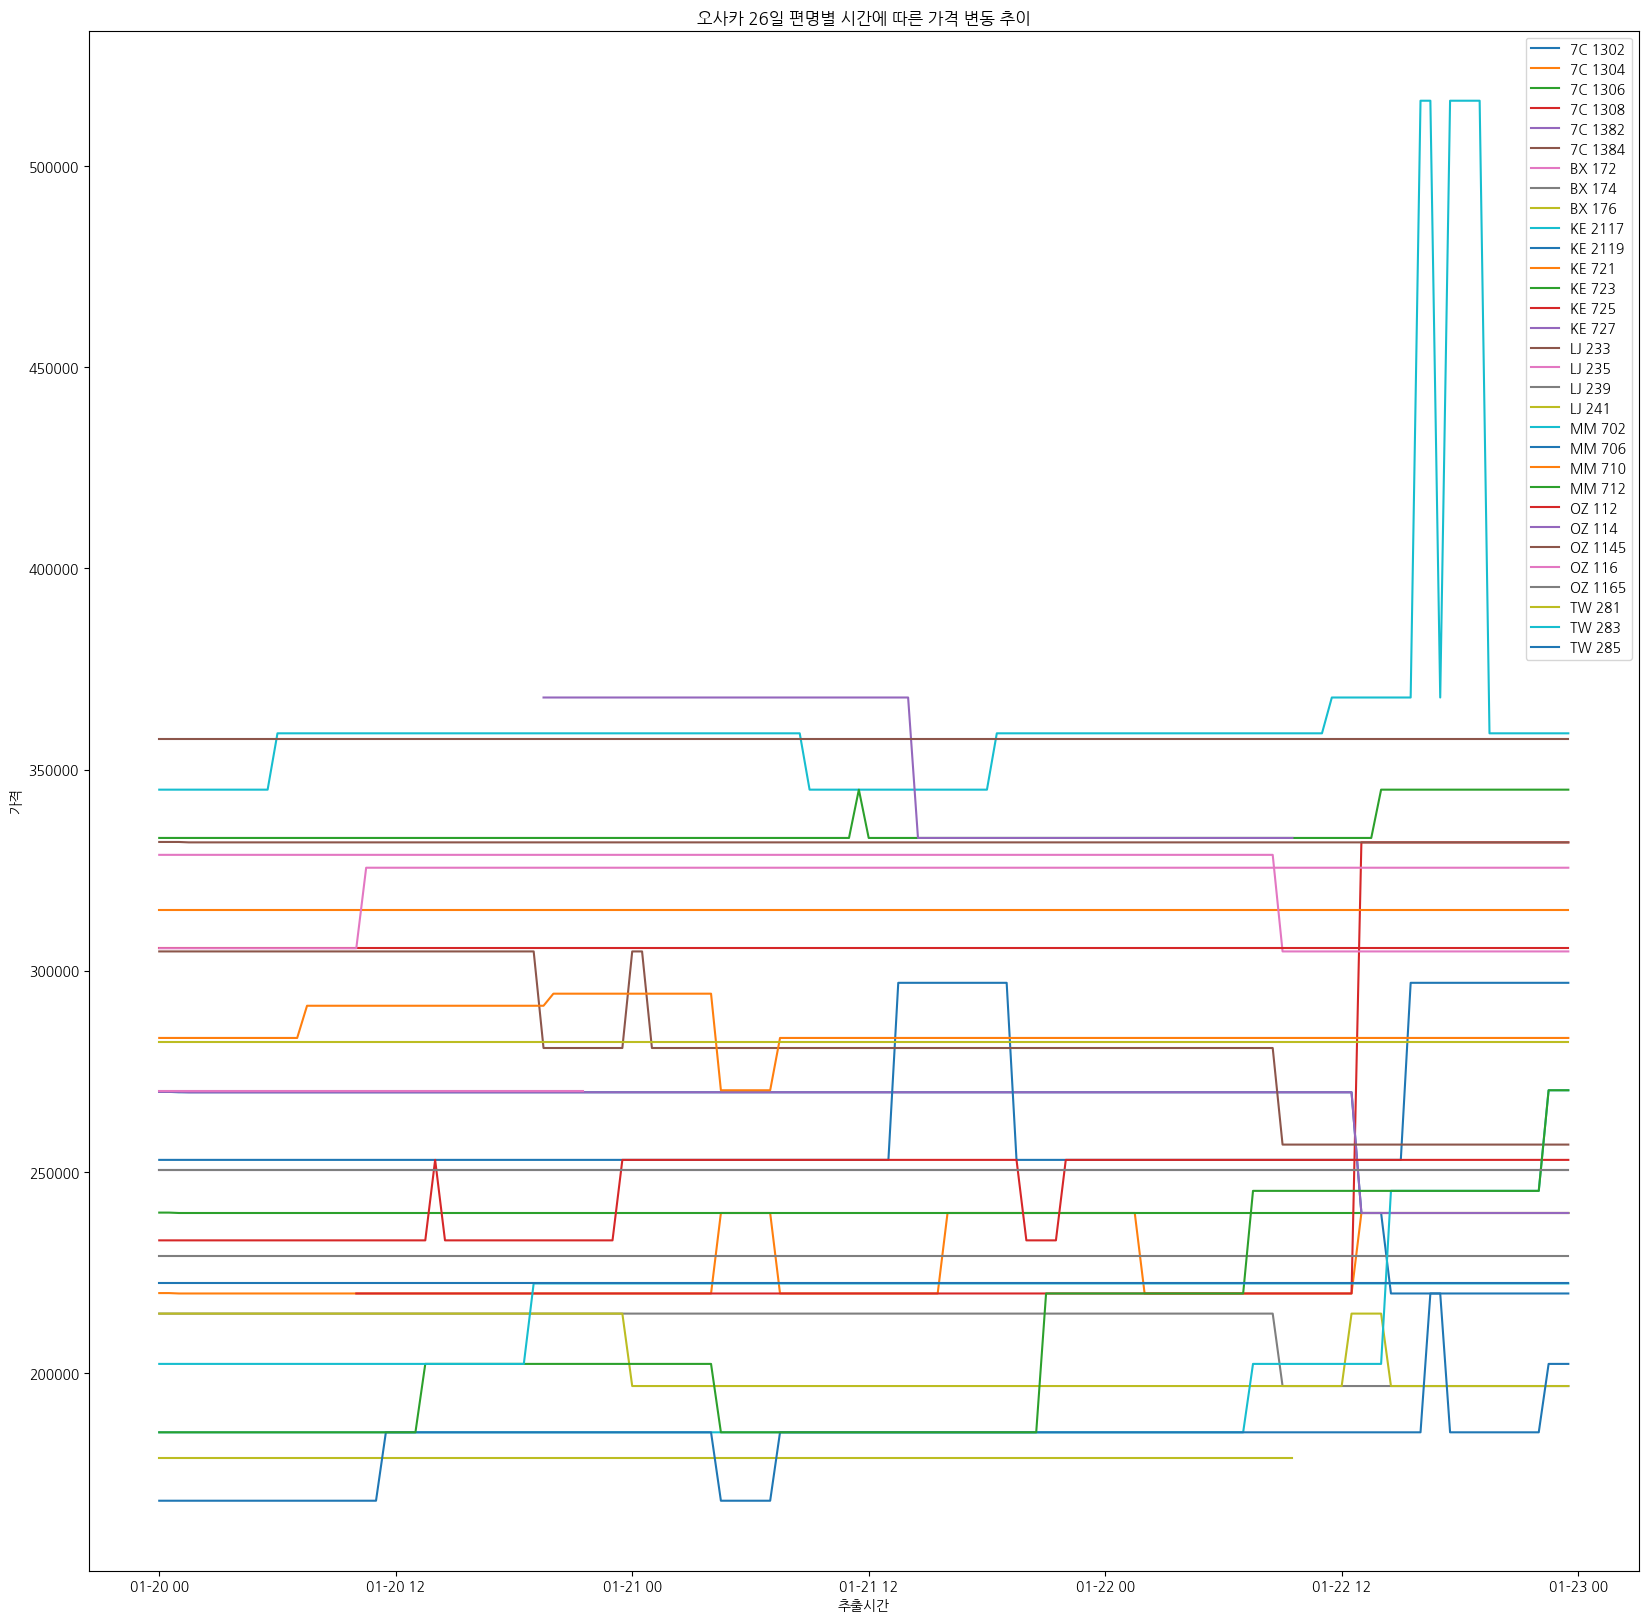

In [70]:
grouped_number = osaka_26_sorted.groupby('편명')
grouped_date = osaka_26_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('오사카 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

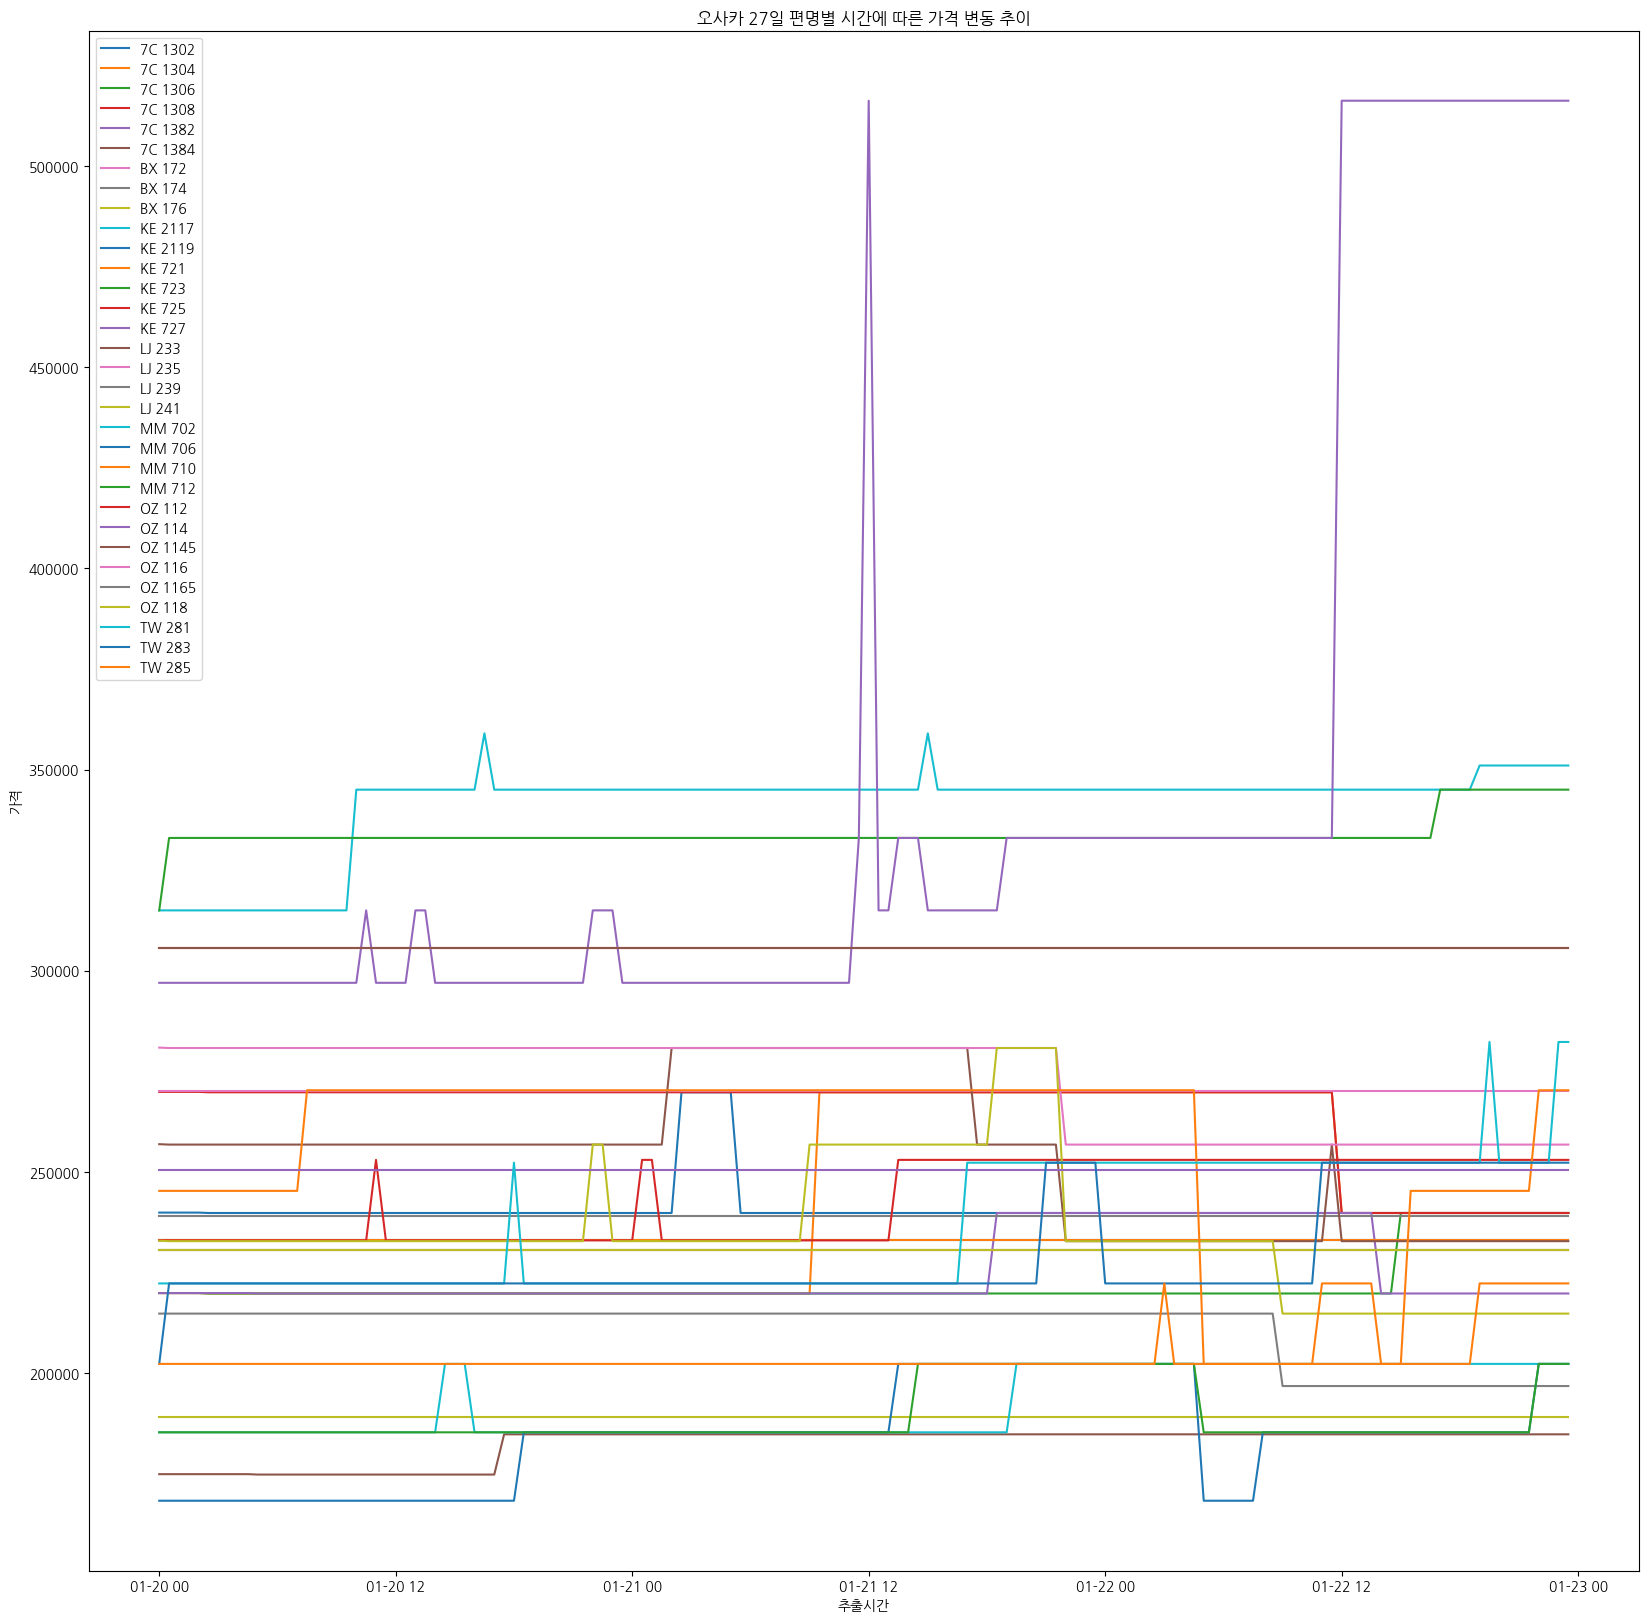

In [71]:
import koreanize_matplotlib
grouped_number = osaka_27_sorted.groupby('편명')
grouped_date = osaka_27_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('오사카 27일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

### 결측치 제거

In [72]:
import pandas as pd

bangkok_26 = pd.read_csv(f'/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/이상치 결측치 제거 전 구글 데이터/google_bangkok_26.csv')
bangkok_27 = pd.read_csv(f'/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/이상치 결측치 제거 전 구글 데이터/google_bangkok_27.csv')
danang_26 = pd.read_csv(f'/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/이상치 결측치 제거 전 구글 데이터/google_danang_26.csv')
danang_27 = pd.read_csv(f'/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/이상치 결측치 제거 전 구글 데이터/google_danang_27.csv')
osaka_26 = pd.read_csv(f'/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/이상치 결측치 제거 전 구글 데이터/google_osaka_26.csv')
osaka_27 = pd.read_csv(f'/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/이상치 결측치 제거 전 구글 데이터/google_osaka_27.csv')


In [73]:
import datetime

# datetime 형식 변환
bangkok_26['추출시간'] = pd.to_datetime(bangkok_26['추출시간'])
bangkok_27['추출시간'] = pd.to_datetime(bangkok_27['추출시간'])

danang_26['추출시간'] = pd.to_datetime(danang_26['추출시간'])
danang_27['추출시간'] = pd.to_datetime(danang_27['추출시간'])

osaka_26['추출시간'] = pd.to_datetime(osaka_26['추출시간'])
osaka_27['추출시간'] = pd.to_datetime(osaka_27['추출시간'])

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# 편명, 추출시간을 기준으로 정렬 데이터
bangkok_26_sorted = bangkok_26.sort_values(by=['편명', '추출시간'])
bangkok_27_sorted = bangkok_27.sort_values(by=['편명', '추출시간'])

danang_26_sorted = danang_26.sort_values(by=['편명', '추출시간'])
danang_27_sorted = danang_27.sort_values(by=['편명', '추출시간'])

osaka_26_sorted = osaka_26.sort_values(by=['편명', '추출시간'])
osaka_27_sorted = osaka_27.sort_values(by=['편명', '추출시간'])

In [75]:
bangkok_26_sorted = bangkok_26_sorted.reset_index(drop=True)
bangkok_27_sorted = bangkok_27_sorted.reset_index(drop=True)

danang_26_sorted = danang_26_sorted.reset_index(drop=True)
danang_27_sorted = danang_27_sorted.reset_index(drop=True)

osaka_26_sorted = osaka_26_sorted.reset_index(drop=True)
osaka_27_sorted = osaka_27_sorted.reset_index(drop=True)

In [76]:
danang_27_sorted

,항공사,출발시간,출발공항,도착시간,도착공항,비행방식,소요시간,편도/왕복,가격,추출시간,편명,비행일자,사이트
0,제주항공,11:40,ICN,14:45,DAD,직항,05시간 00분,편도,567000,2024-01-20 00:00:00,7C 2901,24.01.27(토),google
1,제주항공,11:40,ICN,14:45,DAD,직항,05시간 00분,편도,567000,2024-01-20 00:30:00,7C 2901,24.01.27(토),google
2,제주항공,11:40,ICN,14:45,DAD,직항,05시간 00분,편도,567000,2024-01-20 01:00:00,7C 2901,24.01.27(토),google
3,제주항공,11:40,ICN,14:45,DAD,직항,05시간 00분,편도,567000,2024-01-20 01:30:00,7C 2901,24.01.27(토),google
4,제주항공,11:40,ICN,14:45,DAD,직항,05시간 00분,편도,566900,2024-01-20 02:00:00,7C 2901,24.01.27(토),google
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,베트남항공,10:45,ICN,13:55,DAD,직항,05시간 10분,편도,548300,2024-01-22 21:30:00,VN 431,24.01.27(토),google
1849,베트남항공,10:45,ICN,13:55,DAD,직항,05시간 10분,편도,548300,2024-01-22 22:00:00,VN 431,24.01.27(토),google
1850,베트남항공,10:45,ICN,13:55,DAD,직항,05시간 10분,편도,548300,2024-01-22 22:30:00,VN 431,24.01.27(토),google
1851,베트남항공,10:45,ICN,13:55,DAD,직항,05시간 10분,편도,548300,2024-01-22 23:00:00,VN 431,24.01.27(토),google


### 결측치 제거 코드

## bangkok 26

In [77]:
list_bang26 = bangkok_26_sorted['편명'].unique()

# 편명마다 결측치가 있는지 프린트
for raw in list_bang26:
    print("편명:", raw, "개수:", len(bangkok_26_sorted[bangkok_26_sorted['편명']==raw]))

편명: 7C 2203 개수: 133
편명: 7C 2205 개수: 137
편명: KE 651 개수: 144
편명: KE 653 개수: 144
편명: KE 657 개수: 144
편명: KE 659 개수: 144
편명: KE 673 개수: 144
편명: LJ 3 개수: 144
편명: OZ 741 개수: 144
편명: OZ 743 개수: 144
편명: TG 653 개수: 144
편명: TG 657 개수: 144
편명: TG 659 개수: 144
편명: TW 101 개수: 144
편명: XJ 701 개수: 144
편명: XJ 709 개수: 143
편명: YP 601 개수: 143


In [78]:
# 제거
for raw in list_bang26:
    if len(bangkok_26_sorted[bangkok_26_sorted['편명']==raw]) != 144:
        print("편명 : ", raw, "제거합니다!.")
        bangkok_26_sorted = bangkok_26_sorted[bangkok_26_sorted['편명'] != raw]

편명 :  7C 2203 제거합니다!.
편명 :  7C 2205 제거합니다!.
편명 :  XJ 709 제거합니다!.
편명 :  YP 601 제거합니다!.


In [79]:
list_bang26 = bangkok_26_sorted['편명'].unique()
print("제거 후 편명 리스트 :", list_bang26)
print('')


for raw in list_bang26:
    print("편명:", raw, "개수:", len(bangkok_26_sorted[bangkok_26_sorted['편명']==raw]))

제거 후 편명 리스트 : ['KE 651' 'KE 653' 'KE 657' 'KE 659' 'KE 673' 'LJ 3' 'OZ 741' 'OZ 743'
 'TG 653' 'TG 657' 'TG 659' 'TW 101' 'XJ 701']

편명: KE 651 개수: 144
편명: KE 653 개수: 144
편명: KE 657 개수: 144
편명: KE 659 개수: 144
편명: KE 673 개수: 144
편명: LJ 3 개수: 144
편명: OZ 741 개수: 144
편명: OZ 743 개수: 144
편명: TG 653 개수: 144
편명: TG 657 개수: 144
편명: TG 659 개수: 144
편명: TW 101 개수: 144
편명: XJ 701 개수: 144


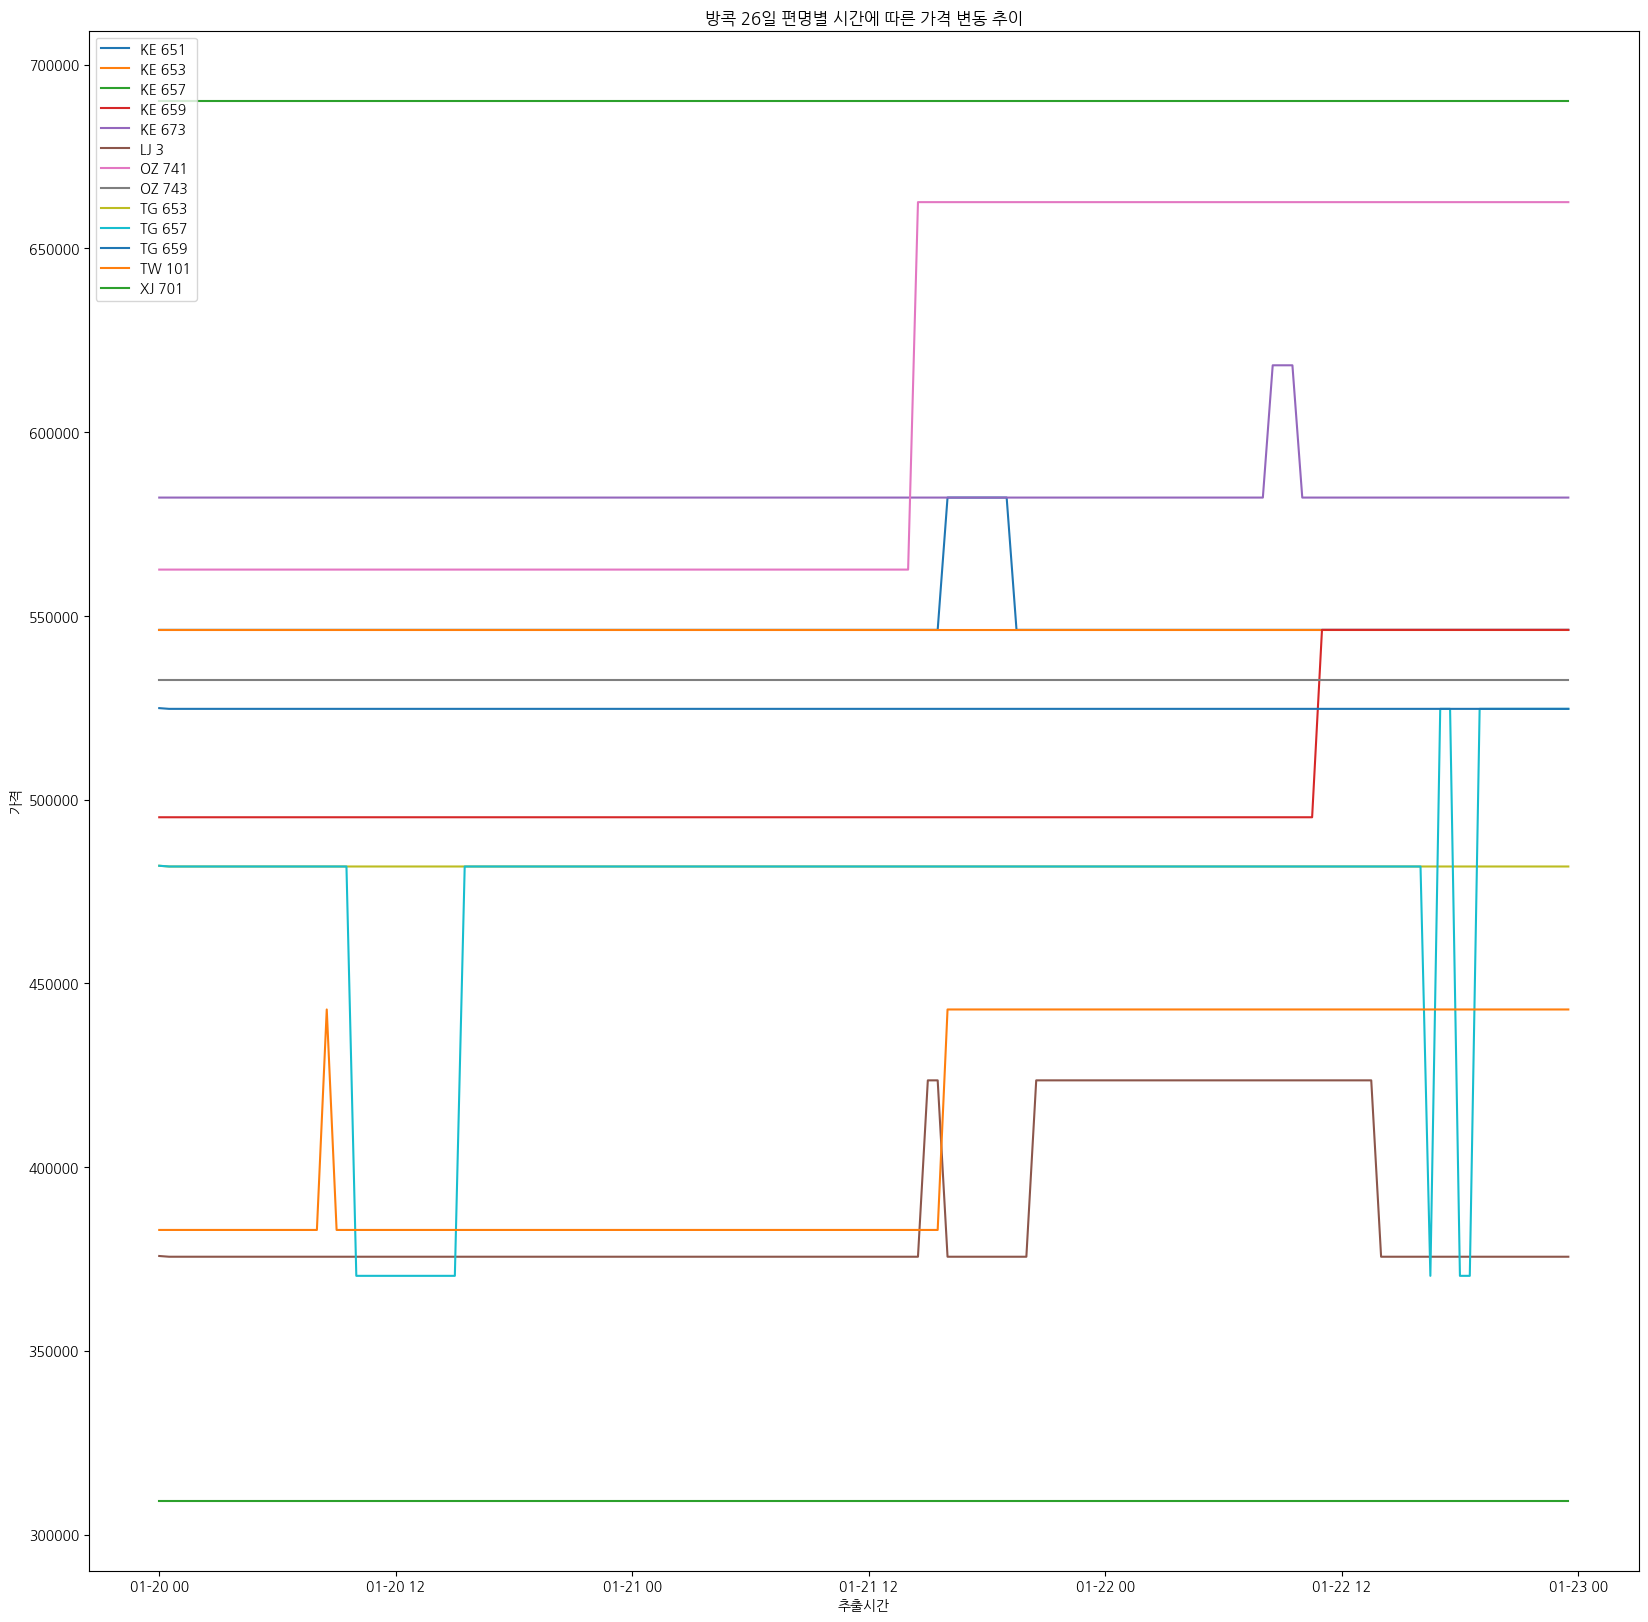

In [80]:
import koreanize_matplotlib
grouped_number = bangkok_26_sorted.groupby('편명')
grouped_date = bangkok_26_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

## 이상치 제거

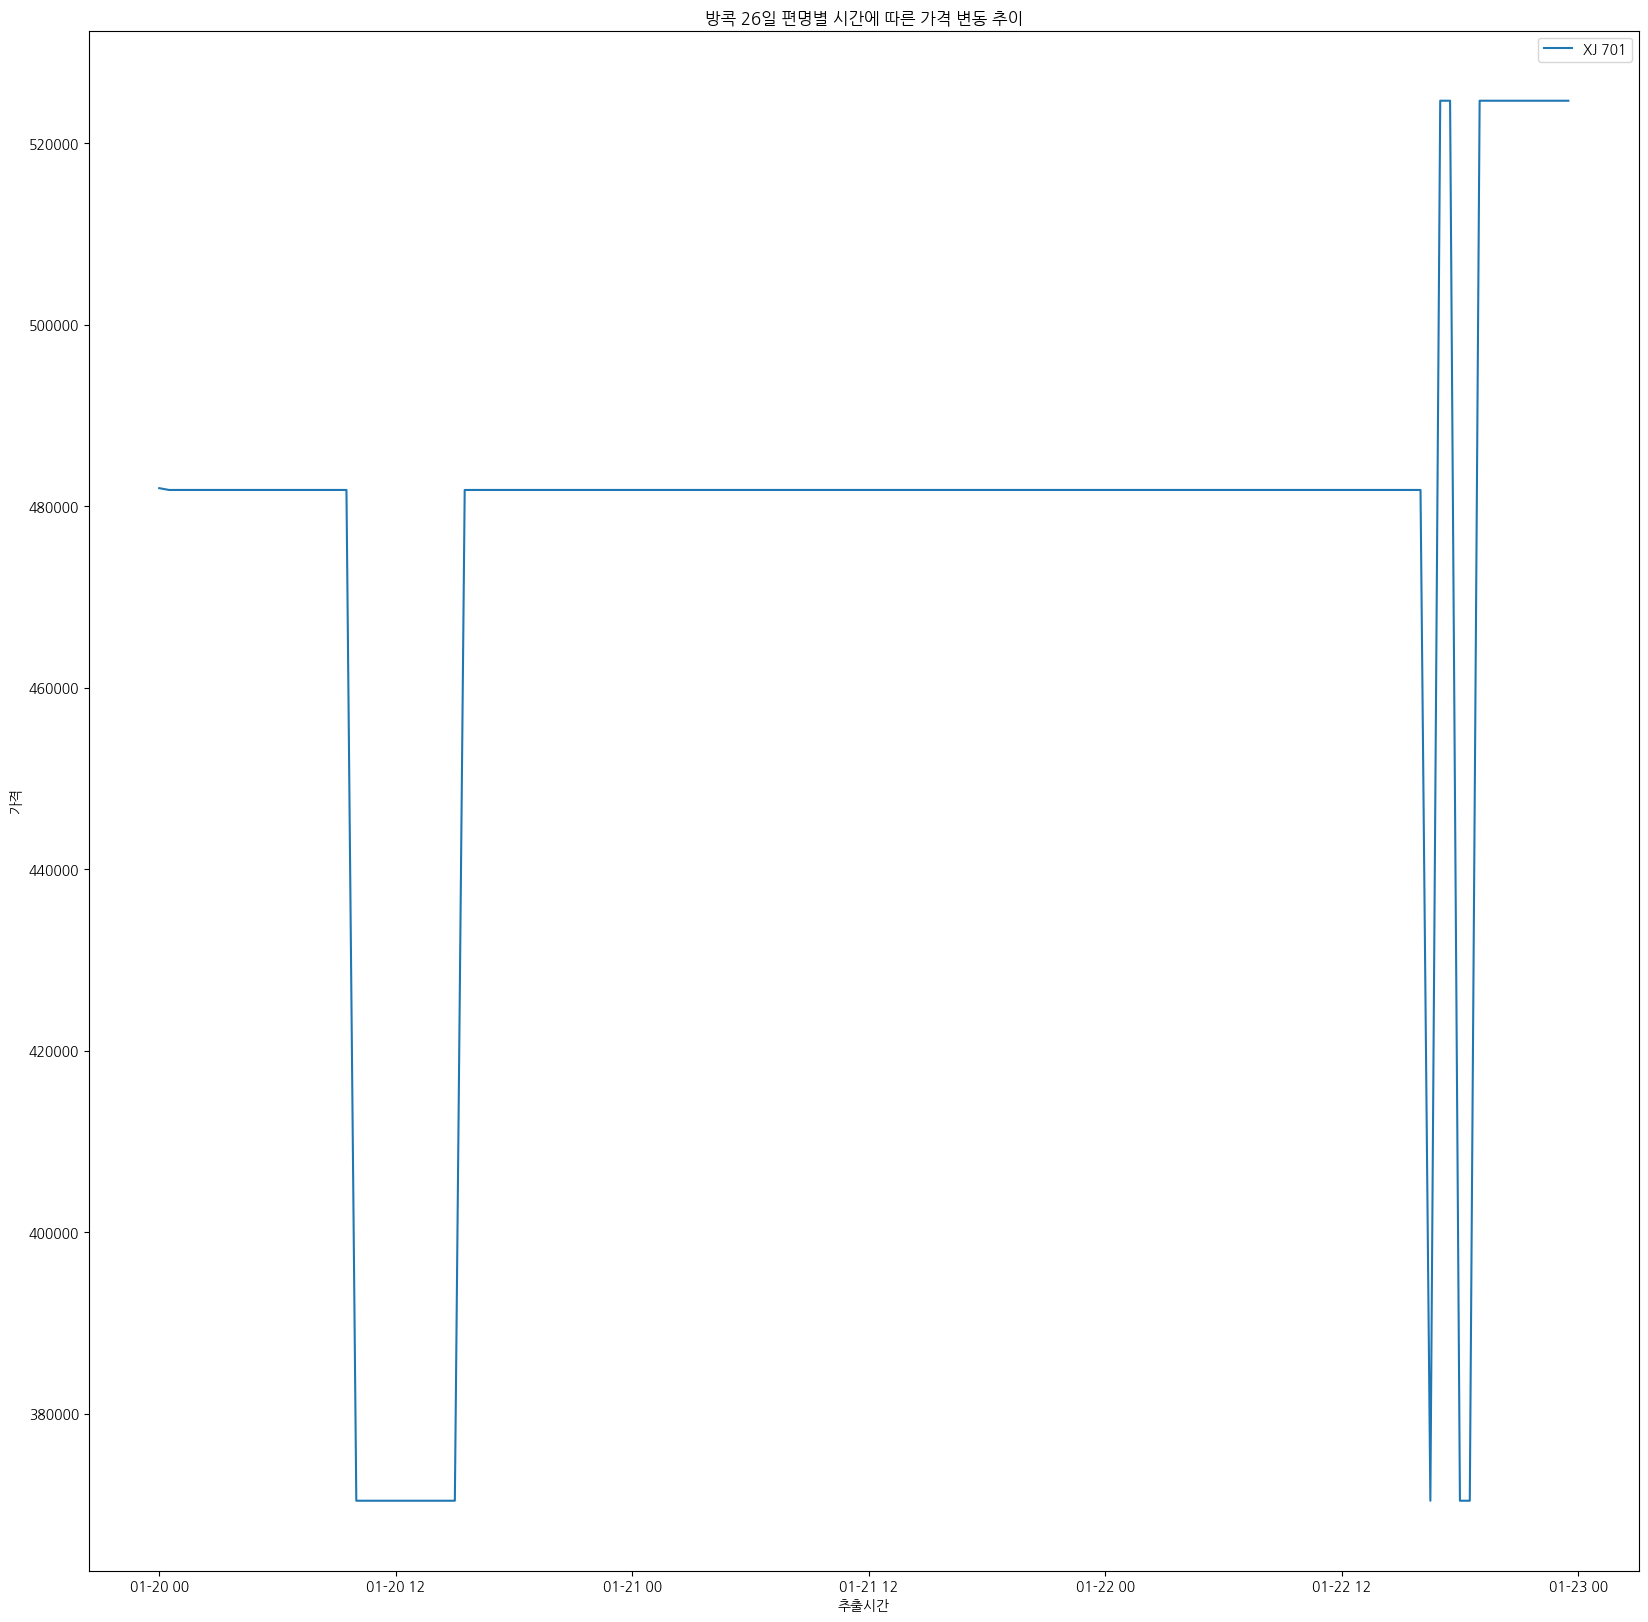

In [81]:
import koreanize_matplotlib
grouped_number = bangkok_26_sorted[bangkok_26_sorted['편명'] == 'TG 657']
# grouped_date = bangkok_26_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
# for name, group in grouped_number:
plt.plot(grouped_number['추출시간'], grouped_number['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

In [82]:
bangkok_26_sorted = bangkok_26_sorted[bangkok_26_sorted['편명'] != 'TG 657']

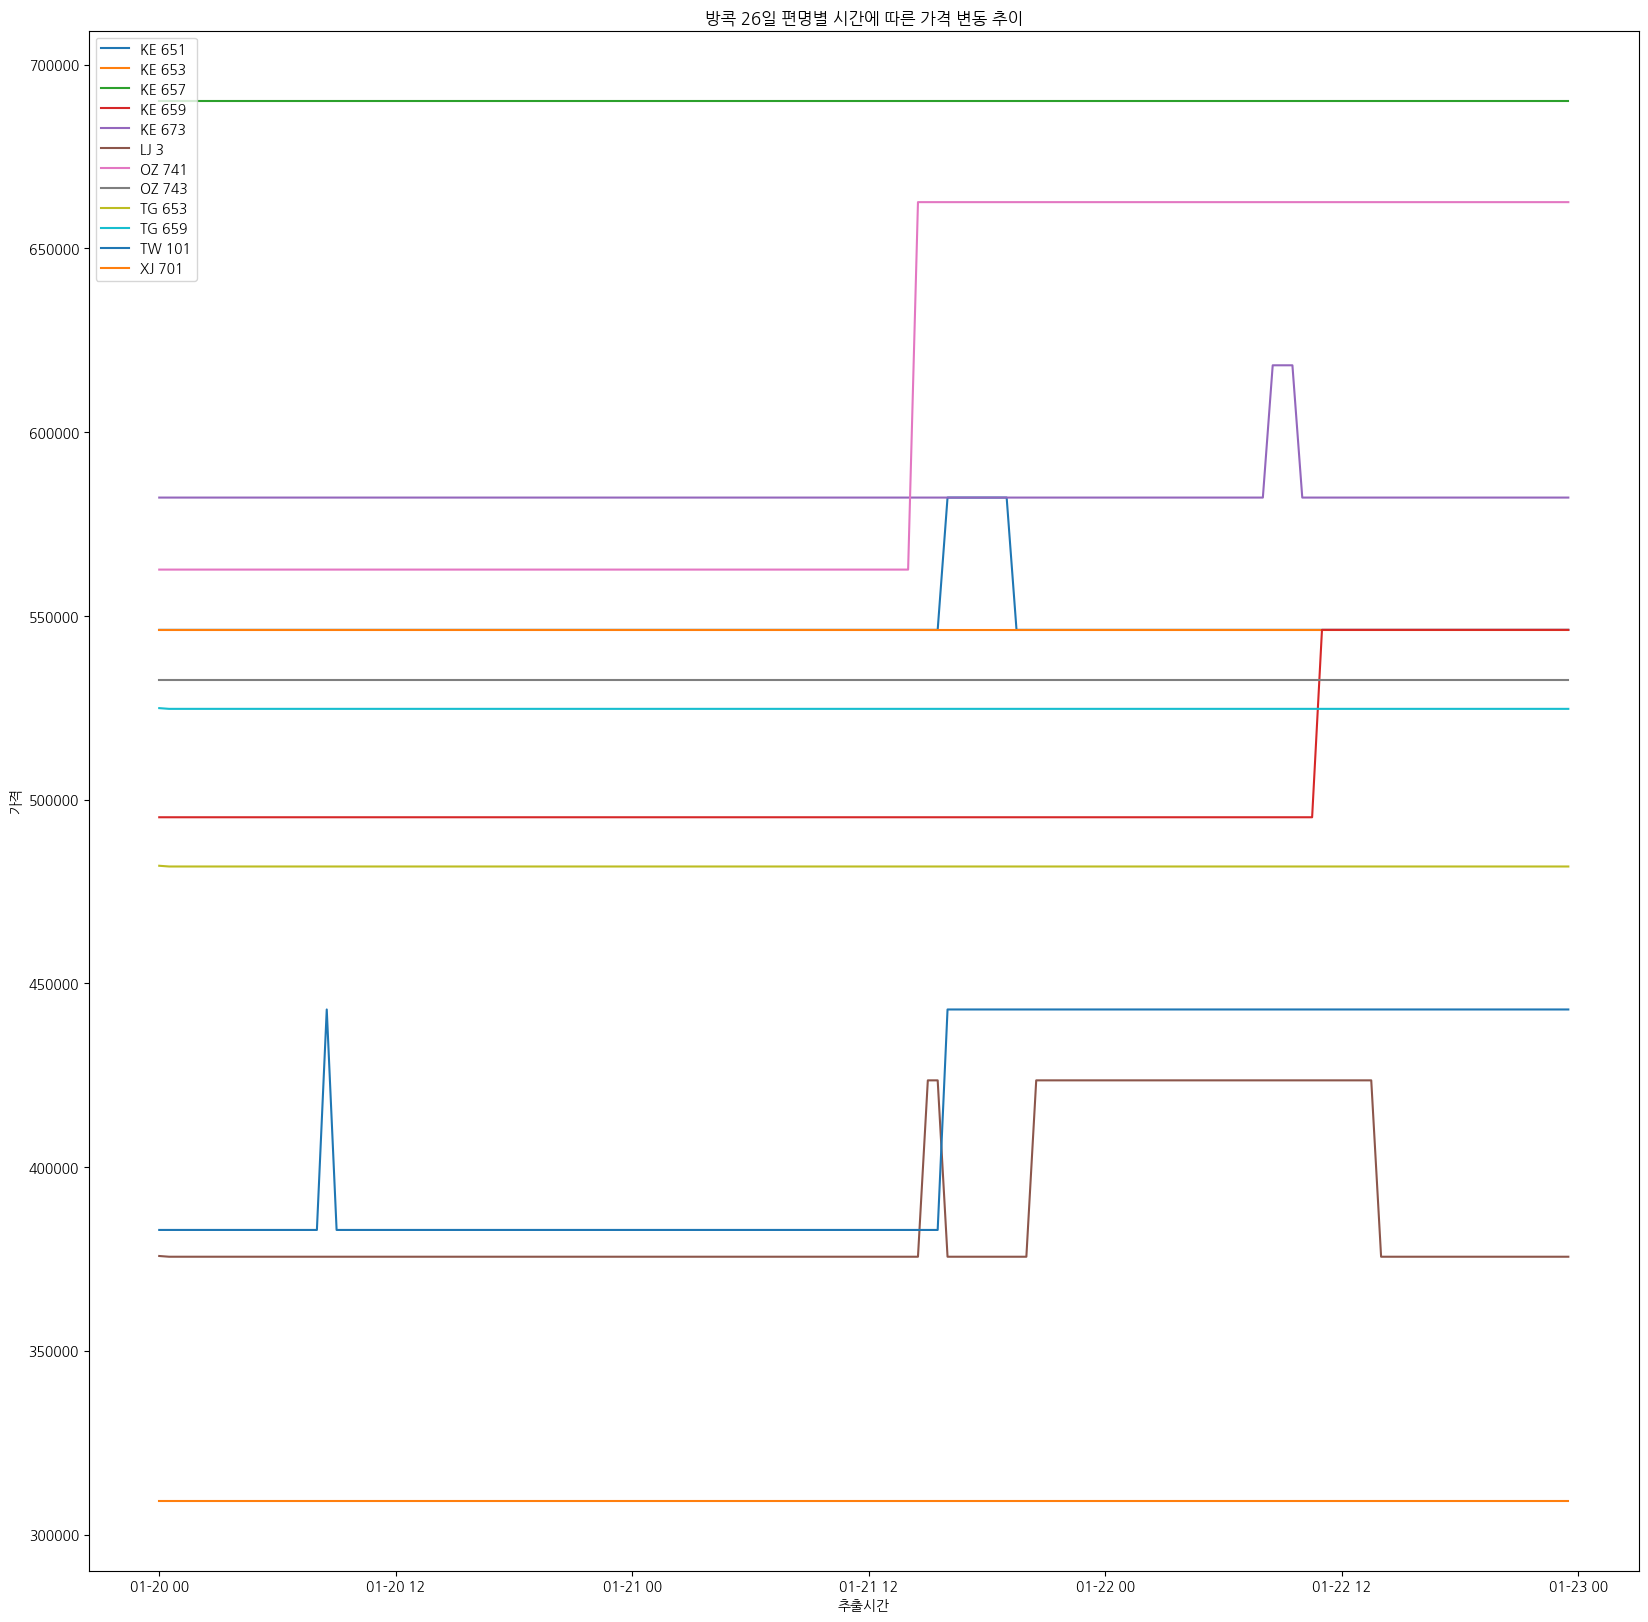

In [83]:
import koreanize_matplotlib
grouped_number = bangkok_26_sorted.groupby('편명')
grouped_date = bangkok_26_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

## bangkok 27

In [84]:
list_bang27 = bangkok_27_sorted['편명'].unique()

# 편명마다 결측치가 있는지 프린트
for raw in list_bang27:
    print("편명:", raw, "개수:", len(bangkok_27_sorted[bangkok_27_sorted['편명']==raw]))

편명: 7C 2203 개수: 144
편명: 7C 2205 개수: 144
편명: KE 651 개수: 144
편명: KE 653 개수: 144
편명: KE 657 개수: 144
편명: KE 659 개수: 144
편명: KE 673 개수: 144
편명: LJ 3 개수: 144
편명: OZ 741 개수: 144
편명: OZ 743 개수: 144
편명: TG 653 개수: 144
편명: TG 657 개수: 144
편명: TG 659 개수: 144
편명: TW 101 개수: 144
편명: XJ 701 개수: 143
편명: XJ 709 개수: 143
편명: YP 601 개수: 144


In [85]:
# 제거
for raw in list_bang27:
    if len(bangkok_27_sorted[bangkok_27_sorted['편명']==raw]) != 144:
        print("편명 : ", raw, "제거합니다!.")
        bangkok_27_sorted = bangkok_27_sorted[bangkok_27_sorted['편명'] != raw]

편명 :  XJ 701 제거합니다!.
편명 :  XJ 709 제거합니다!.


In [86]:
list_bang27 = bangkok_27_sorted['편명'].unique()
print("제거 후 편명 리스트 :", list_bang27)
print('')


for raw in list_bang27:
    print("편명:", raw, "개수:", len(bangkok_27_sorted[bangkok_27_sorted['편명']==raw]))

제거 후 편명 리스트 : ['7C 2203' '7C 2205' 'KE 651' 'KE 653' 'KE 657' 'KE 659' 'KE 673' 'LJ 3'
 'OZ 741' 'OZ 743' 'TG 653' 'TG 657' 'TG 659' 'TW 101' 'YP 601']

편명: 7C 2203 개수: 144
편명: 7C 2205 개수: 144
편명: KE 651 개수: 144
편명: KE 653 개수: 144
편명: KE 657 개수: 144
편명: KE 659 개수: 144
편명: KE 673 개수: 144
편명: LJ 3 개수: 144
편명: OZ 741 개수: 144
편명: OZ 743 개수: 144
편명: TG 653 개수: 144
편명: TG 657 개수: 144
편명: TG 659 개수: 144
편명: TW 101 개수: 144
편명: YP 601 개수: 144


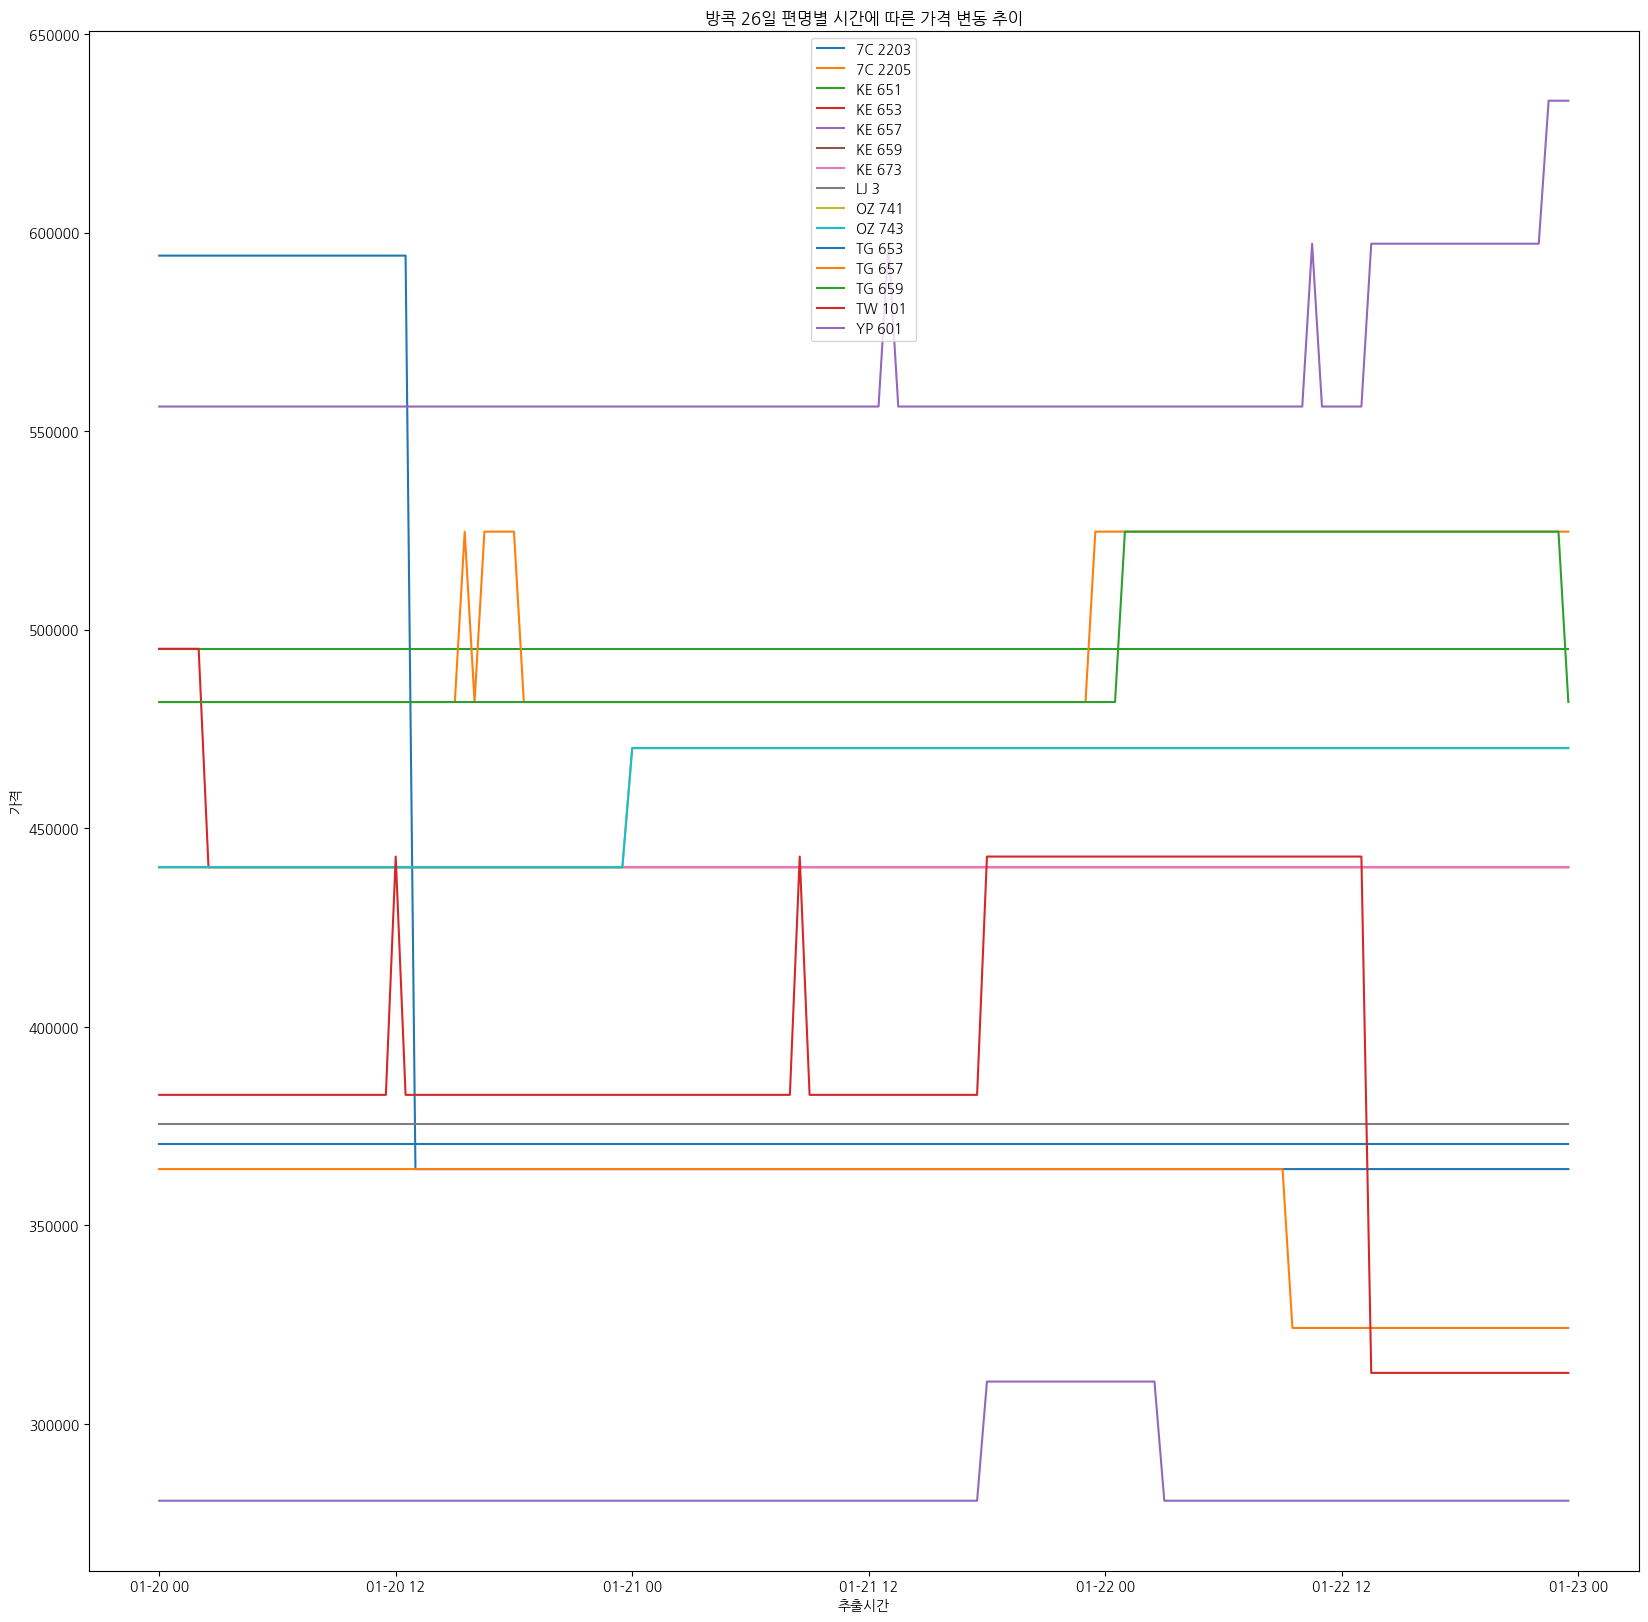

In [87]:
import koreanize_matplotlib
grouped_number = bangkok_27_sorted.groupby('편명')
grouped_date = bangkok_27_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

## 이상치 제거

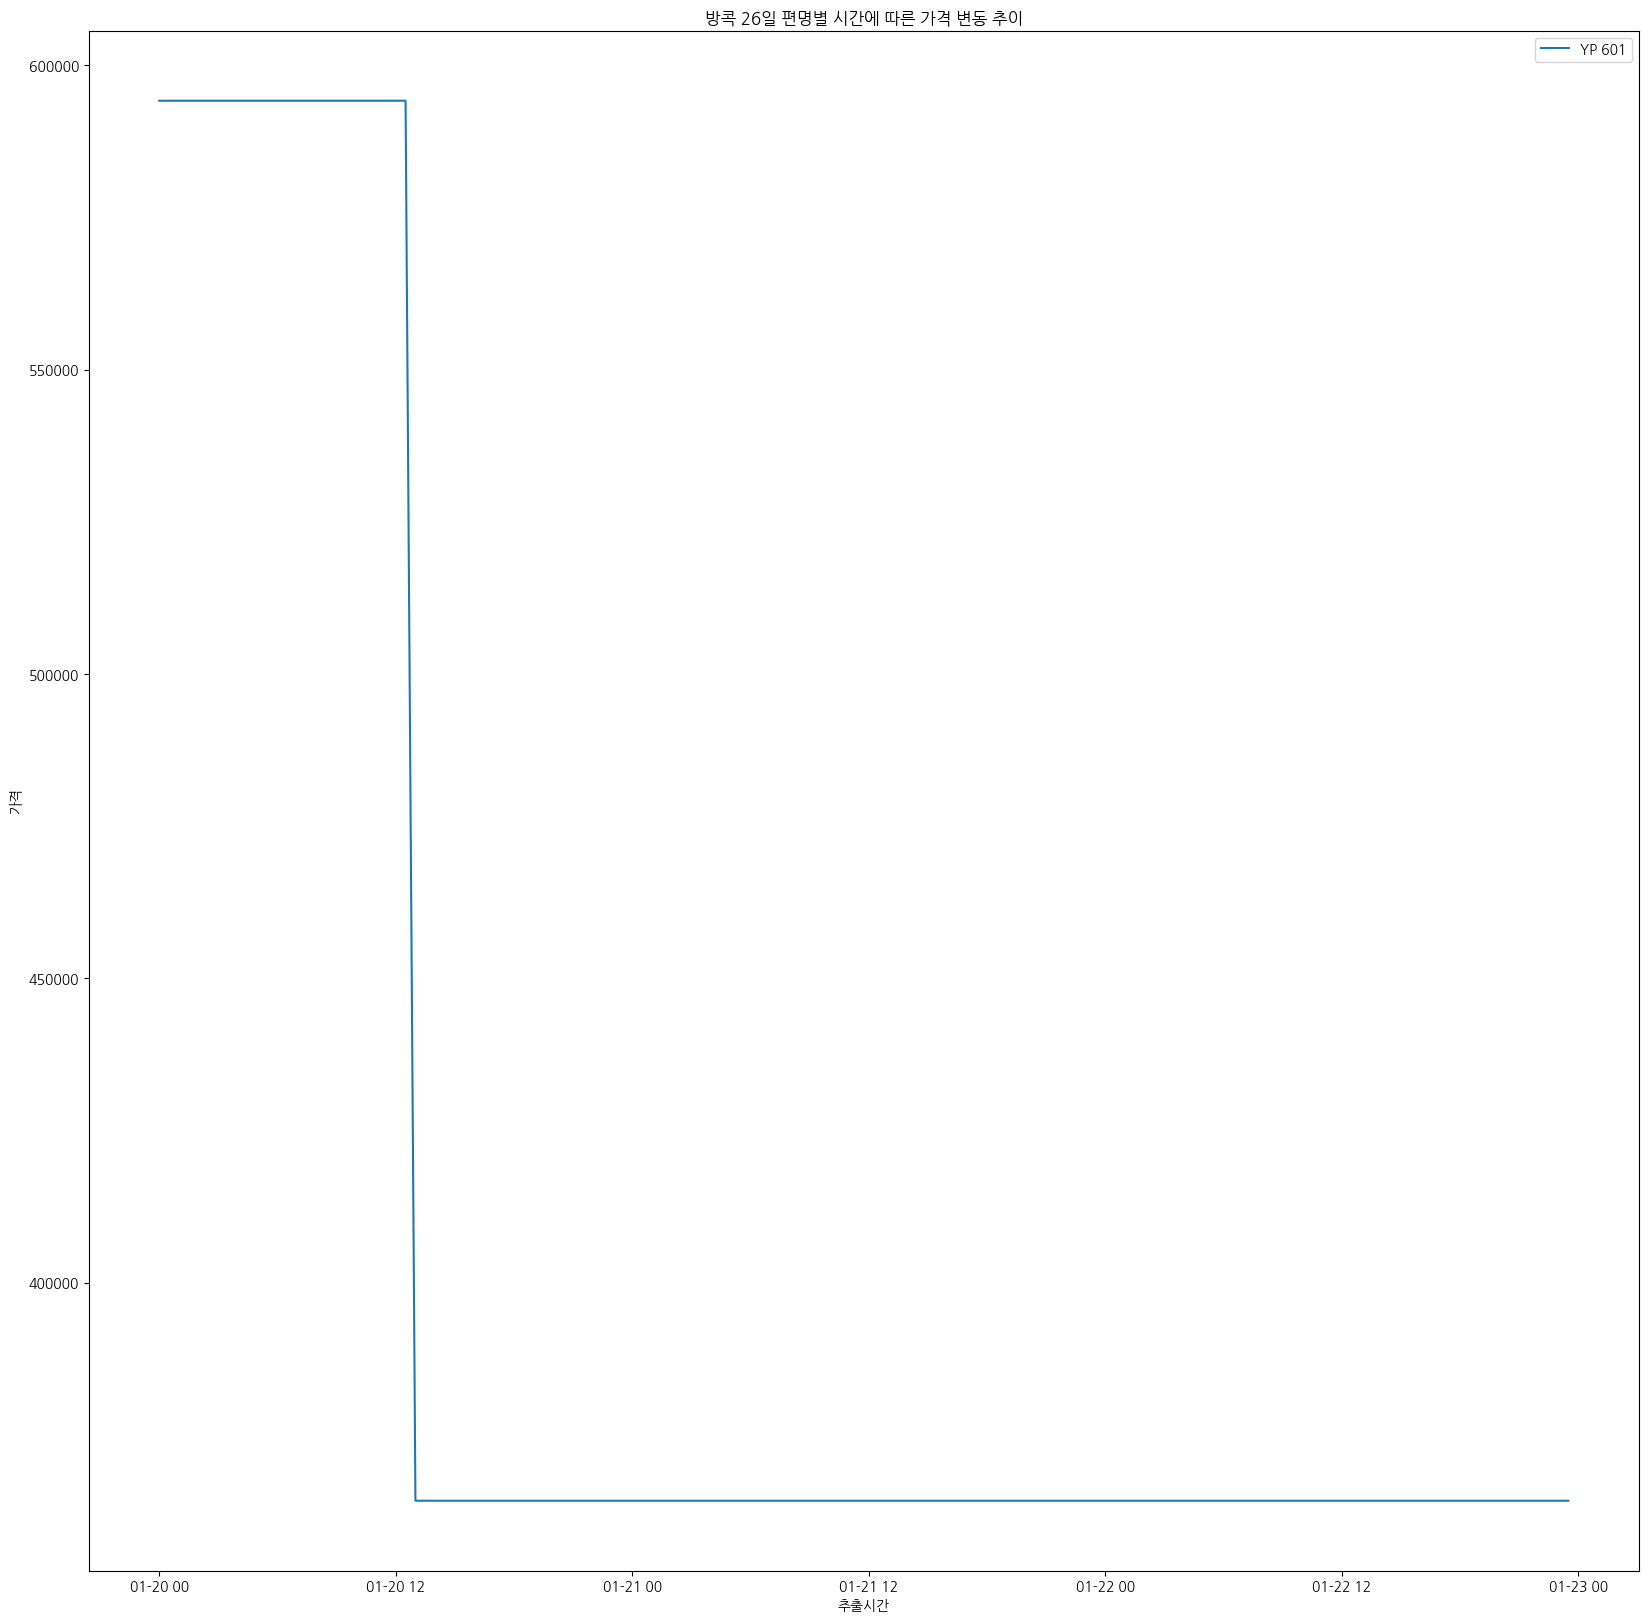

In [88]:
import koreanize_matplotlib
grouped_number = bangkok_27_sorted[bangkok_27_sorted['편명'] == '7C 2203']
# grouped_date = bangkok_27_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
# for name, group in grouped_number:
plt.plot(grouped_number['추출시간'], grouped_number['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

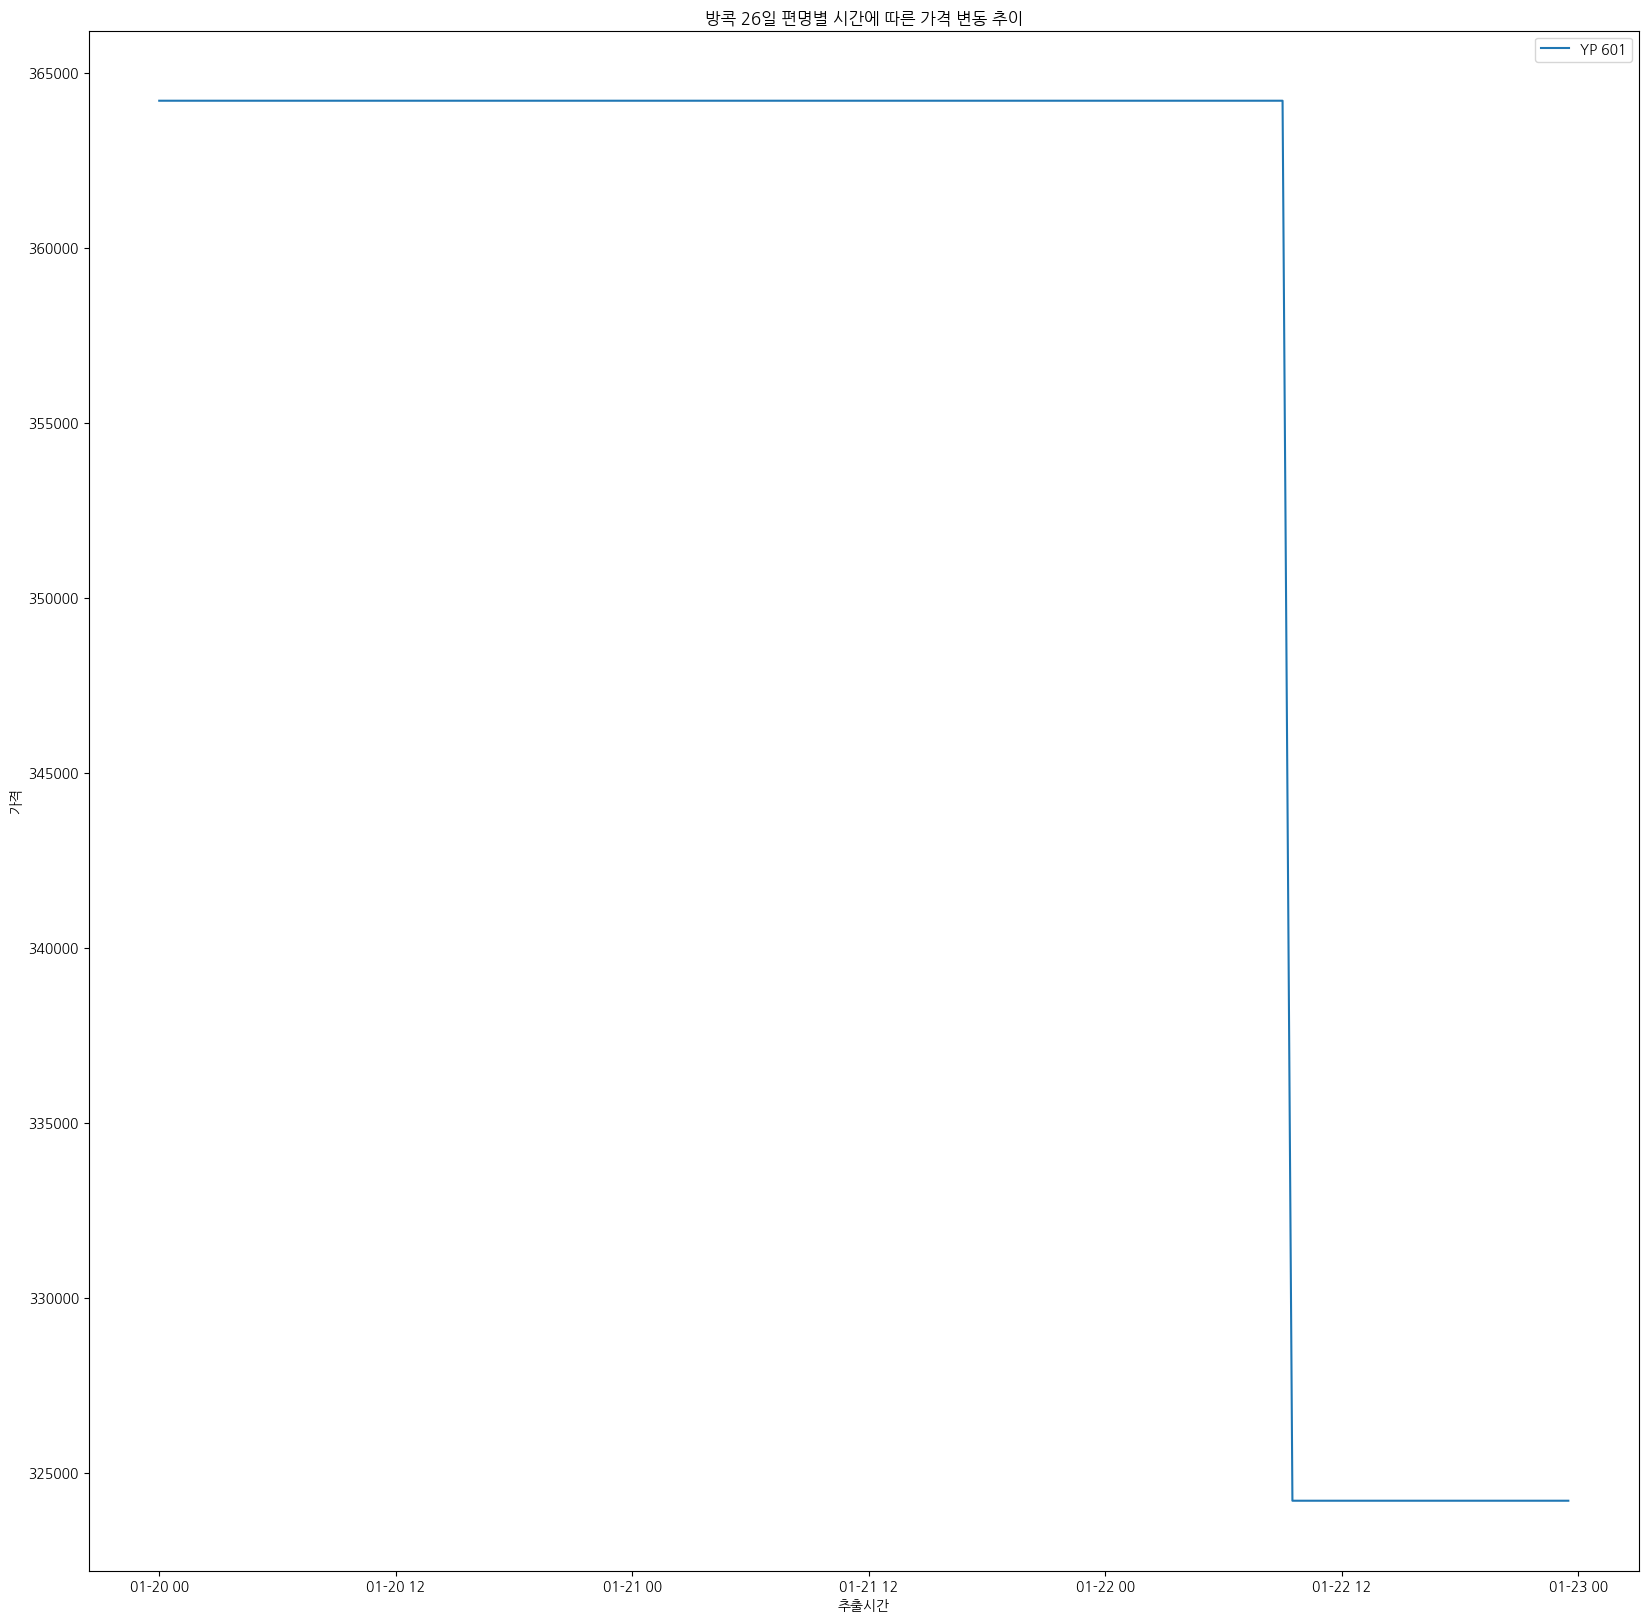

In [89]:
import koreanize_matplotlib
grouped_number = bangkok_27_sorted[bangkok_27_sorted['편명'] == '7C 2205']
# grouped_date = bangkok_27_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
# for name, group in grouped_number:
plt.plot(grouped_number['추출시간'], grouped_number['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

In [90]:
bangkok_27_sorted = bangkok_27_sorted[bangkok_27_sorted['편명'] != '7C 2203']

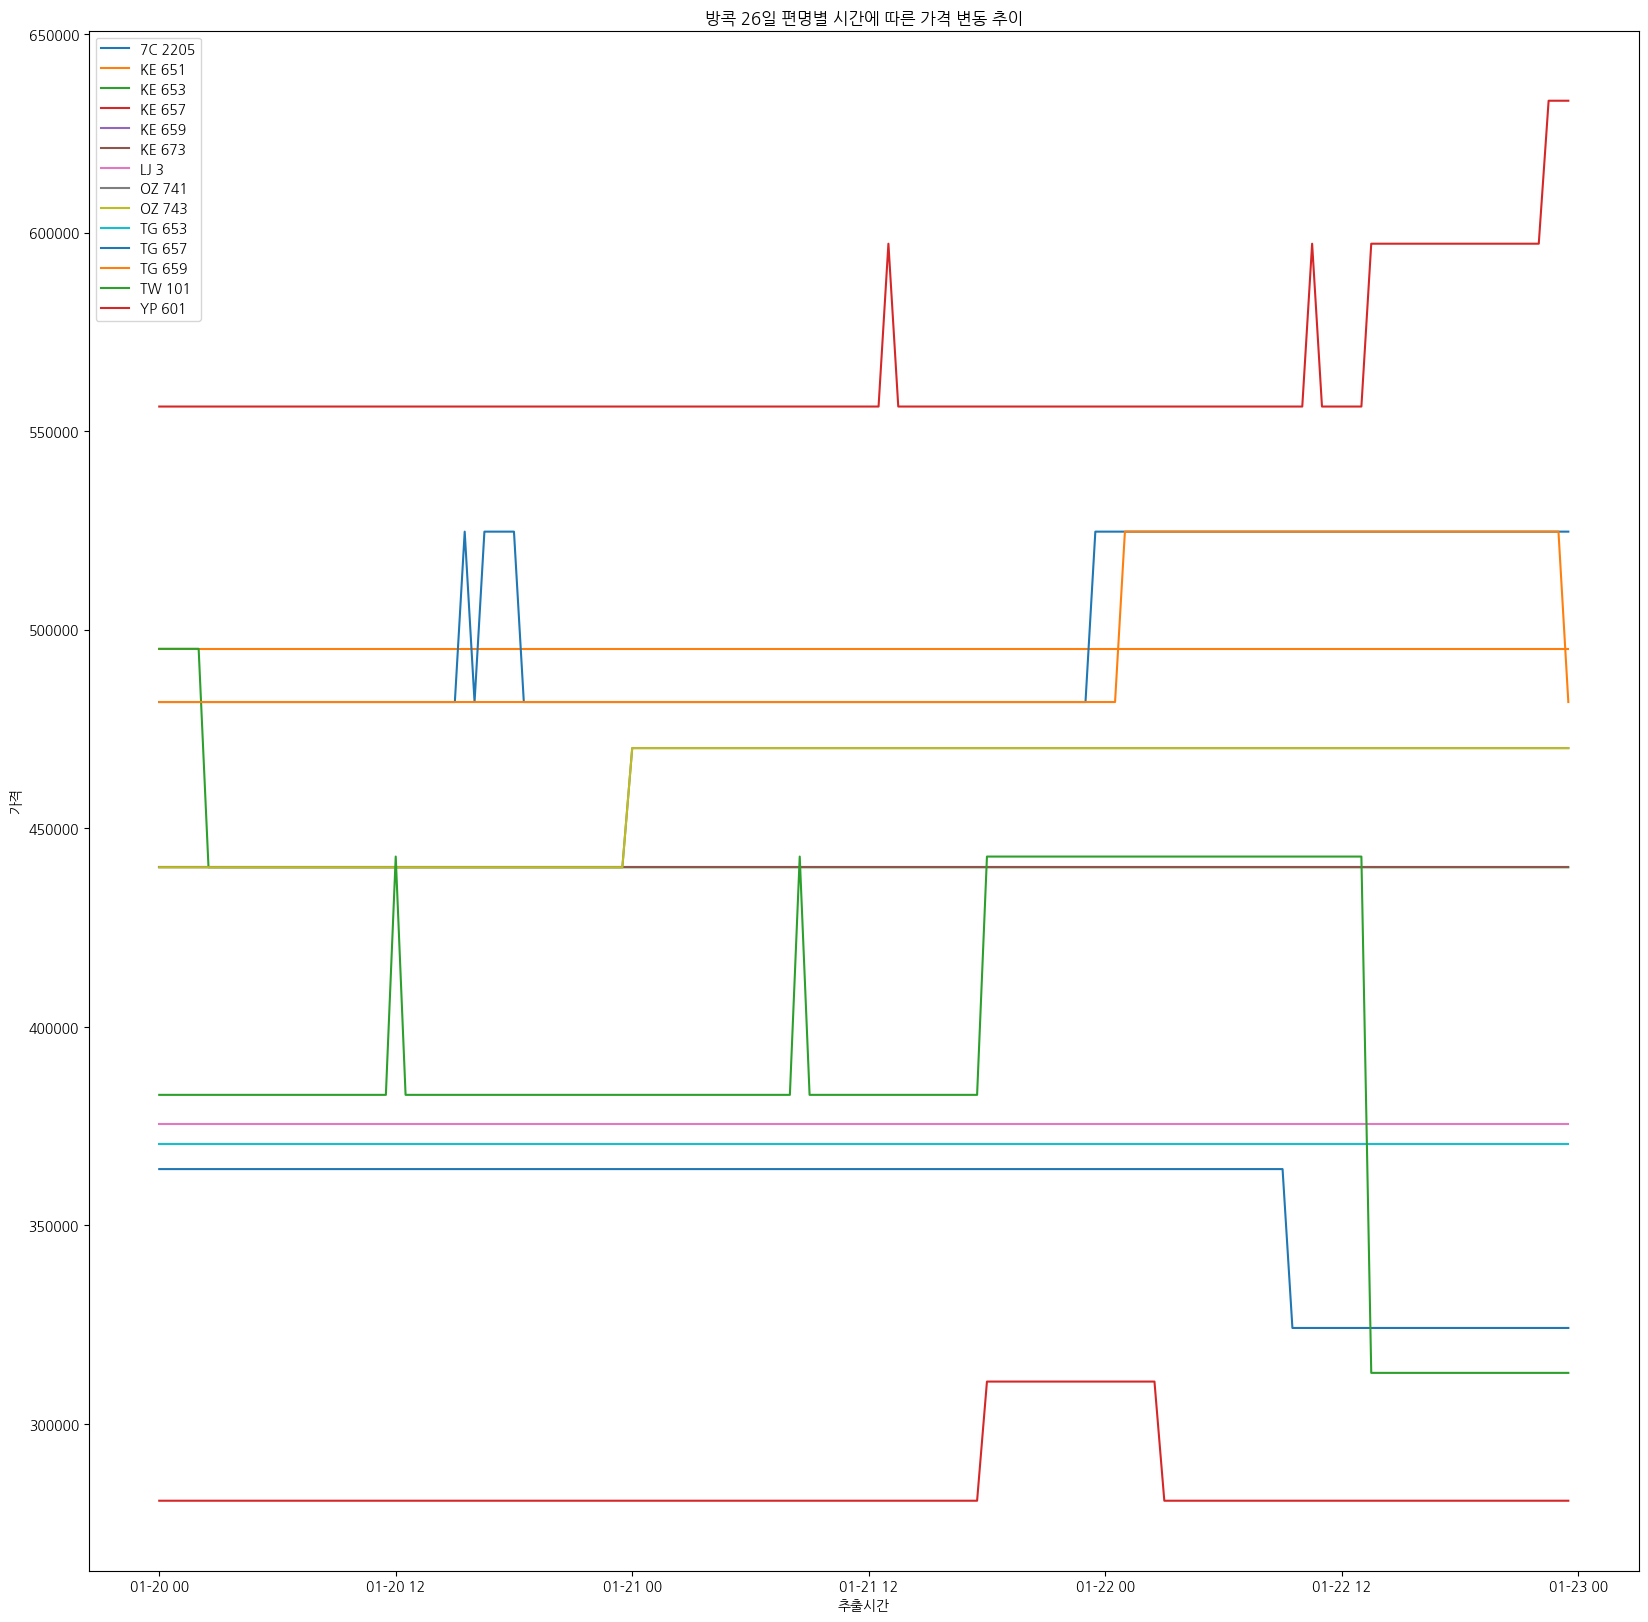

In [91]:
import koreanize_matplotlib
grouped_number = bangkok_27_sorted.groupby('편명')
grouped_date = bangkok_27_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

### danang 26

In [92]:
list_danang_26 = danang_26_sorted['편명'].unique()

# 편명마다 결측치가 있는지 프린트
for raw in list_danang_26:
    print("편명:", raw, "개수:", len(danang_26_sorted[danang_26_sorted['편명']==raw]))

편명: 7C 2901 개수: 141
편명: 7C 2903 개수: 141
편명: KE 457 개수: 141
편명: KE 461 개수: 141
편명: LJ 69 개수: 141
편명: OZ 755 개수: 141
편명: TW 125 개수: 141
편명: TW 127 개수: 141
편명: TW 191 개수: 141
편명: VJ 879 개수: 140
편명: VJ 881 개수: 141
편명: VN 431 개수: 141


In [93]:
# 제거
for raw in list_danang_26:
    if len(danang_26_sorted[danang_26_sorted['편명']==raw]) != 141:
        print("편명 : ", raw, "제거합니다!.")
        danang_26_sorted = danang_26_sorted[danang_26_sorted['편명'] != raw]

편명 :  VJ 879 제거합니다!.


In [94]:
list_danang_26 = danang_26_sorted['편명'].unique()
print("제거 후 편명 리스트 :", list_danang_26)
print('')


for raw in list_danang_26:
    print("편명:", raw, "개수:", len(danang_26_sorted[danang_26_sorted['편명']==raw]))

제거 후 편명 리스트 : ['7C 2901' '7C 2903' 'KE 457' 'KE 461' 'LJ 69' 'OZ 755' 'TW 125' 'TW 127'
 'TW 191' 'VJ 881' 'VN 431']

편명: 7C 2901 개수: 141
편명: 7C 2903 개수: 141
편명: KE 457 개수: 141
편명: KE 461 개수: 141
편명: LJ 69 개수: 141
편명: OZ 755 개수: 141
편명: TW 125 개수: 141
편명: TW 127 개수: 141
편명: TW 191 개수: 141
편명: VJ 881 개수: 141
편명: VN 431 개수: 141


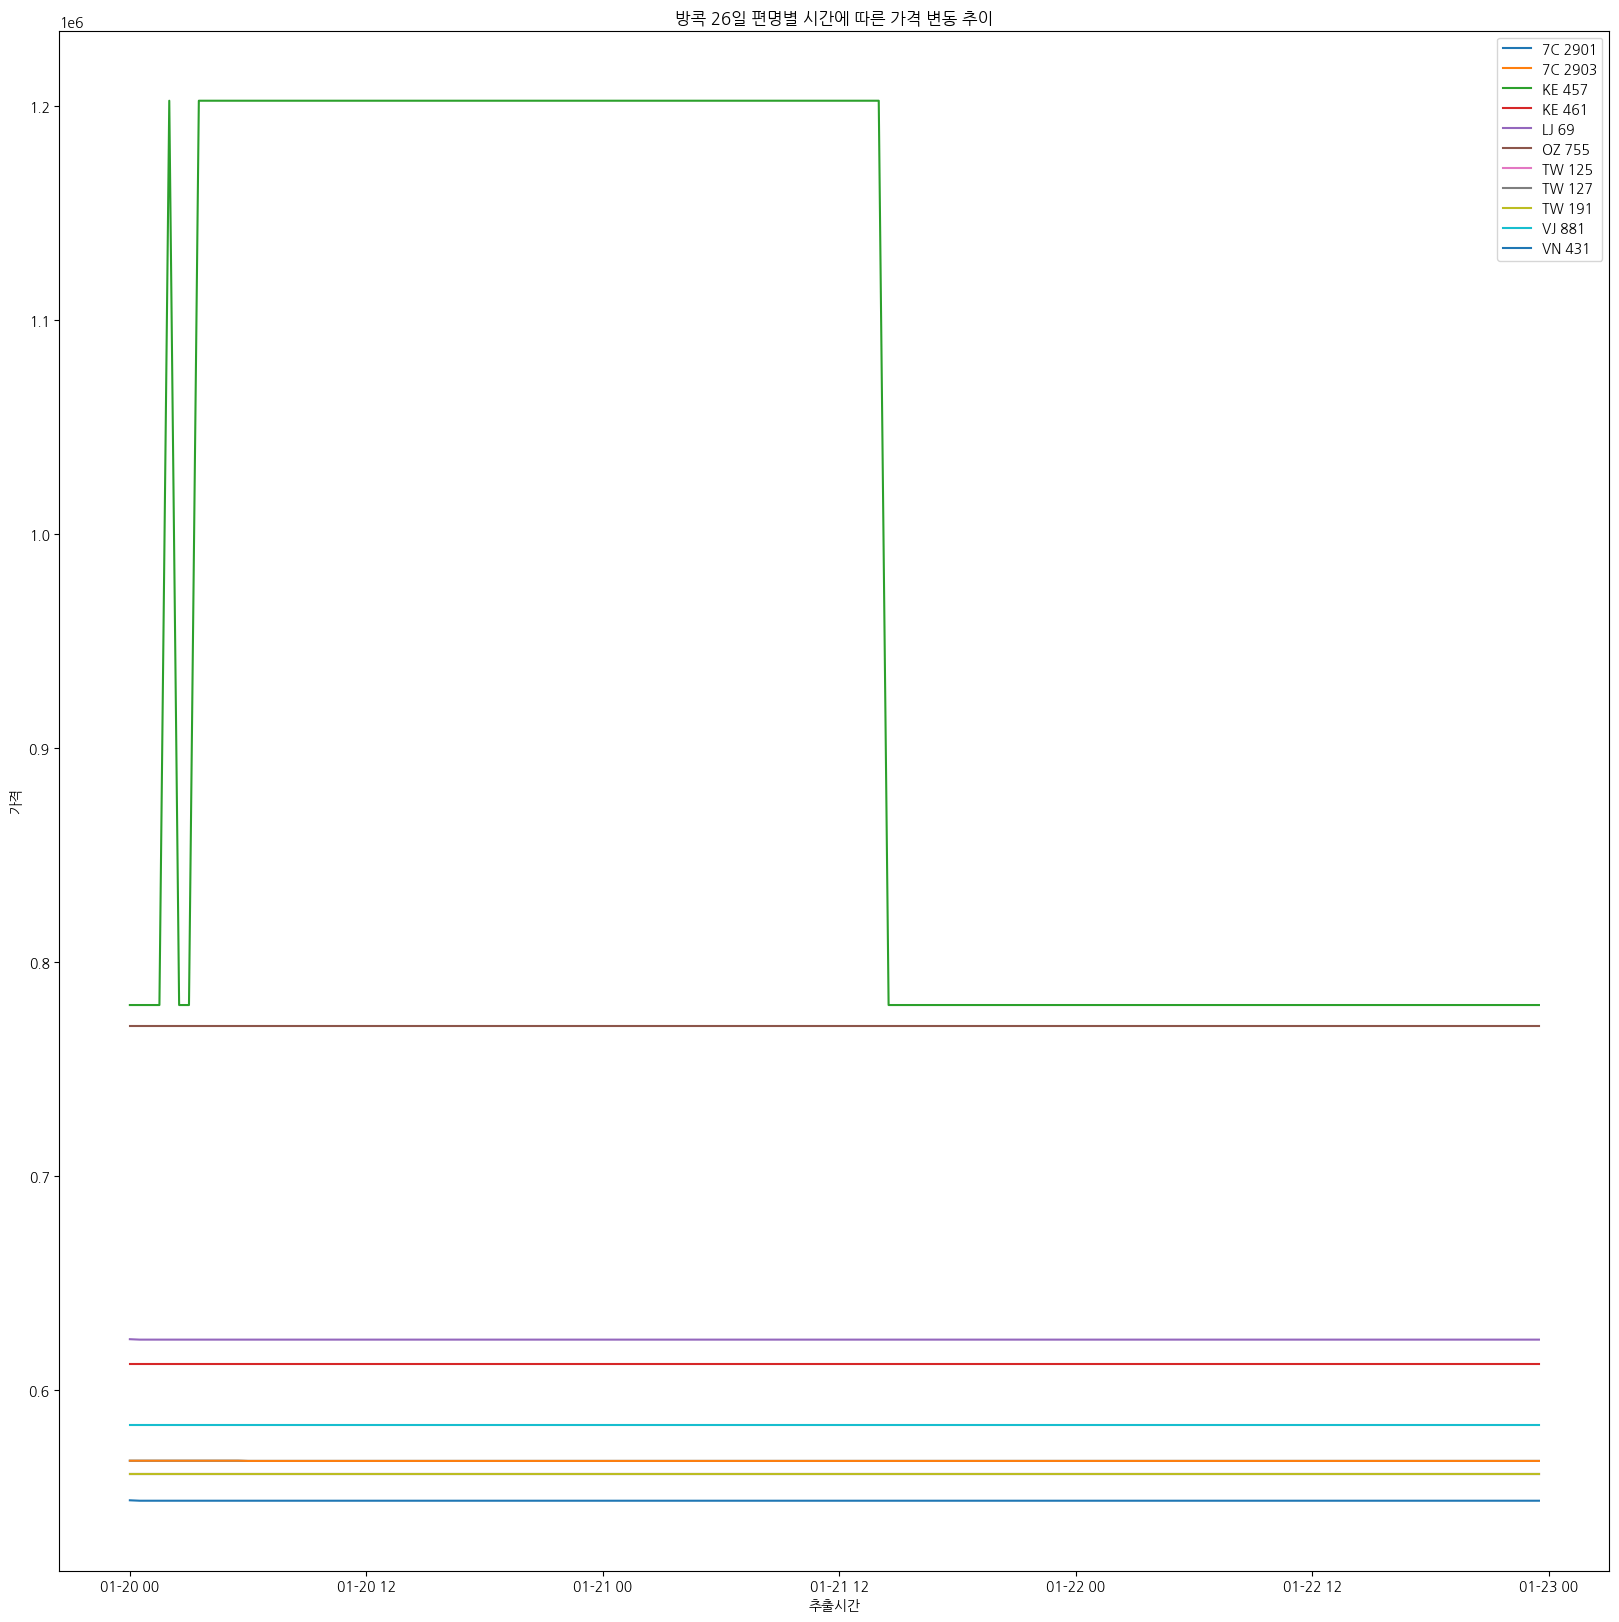

In [95]:
import koreanize_matplotlib
grouped_number = danang_26_sorted.groupby('편명')
grouped_date = danang_26_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()


## 이상치 제거

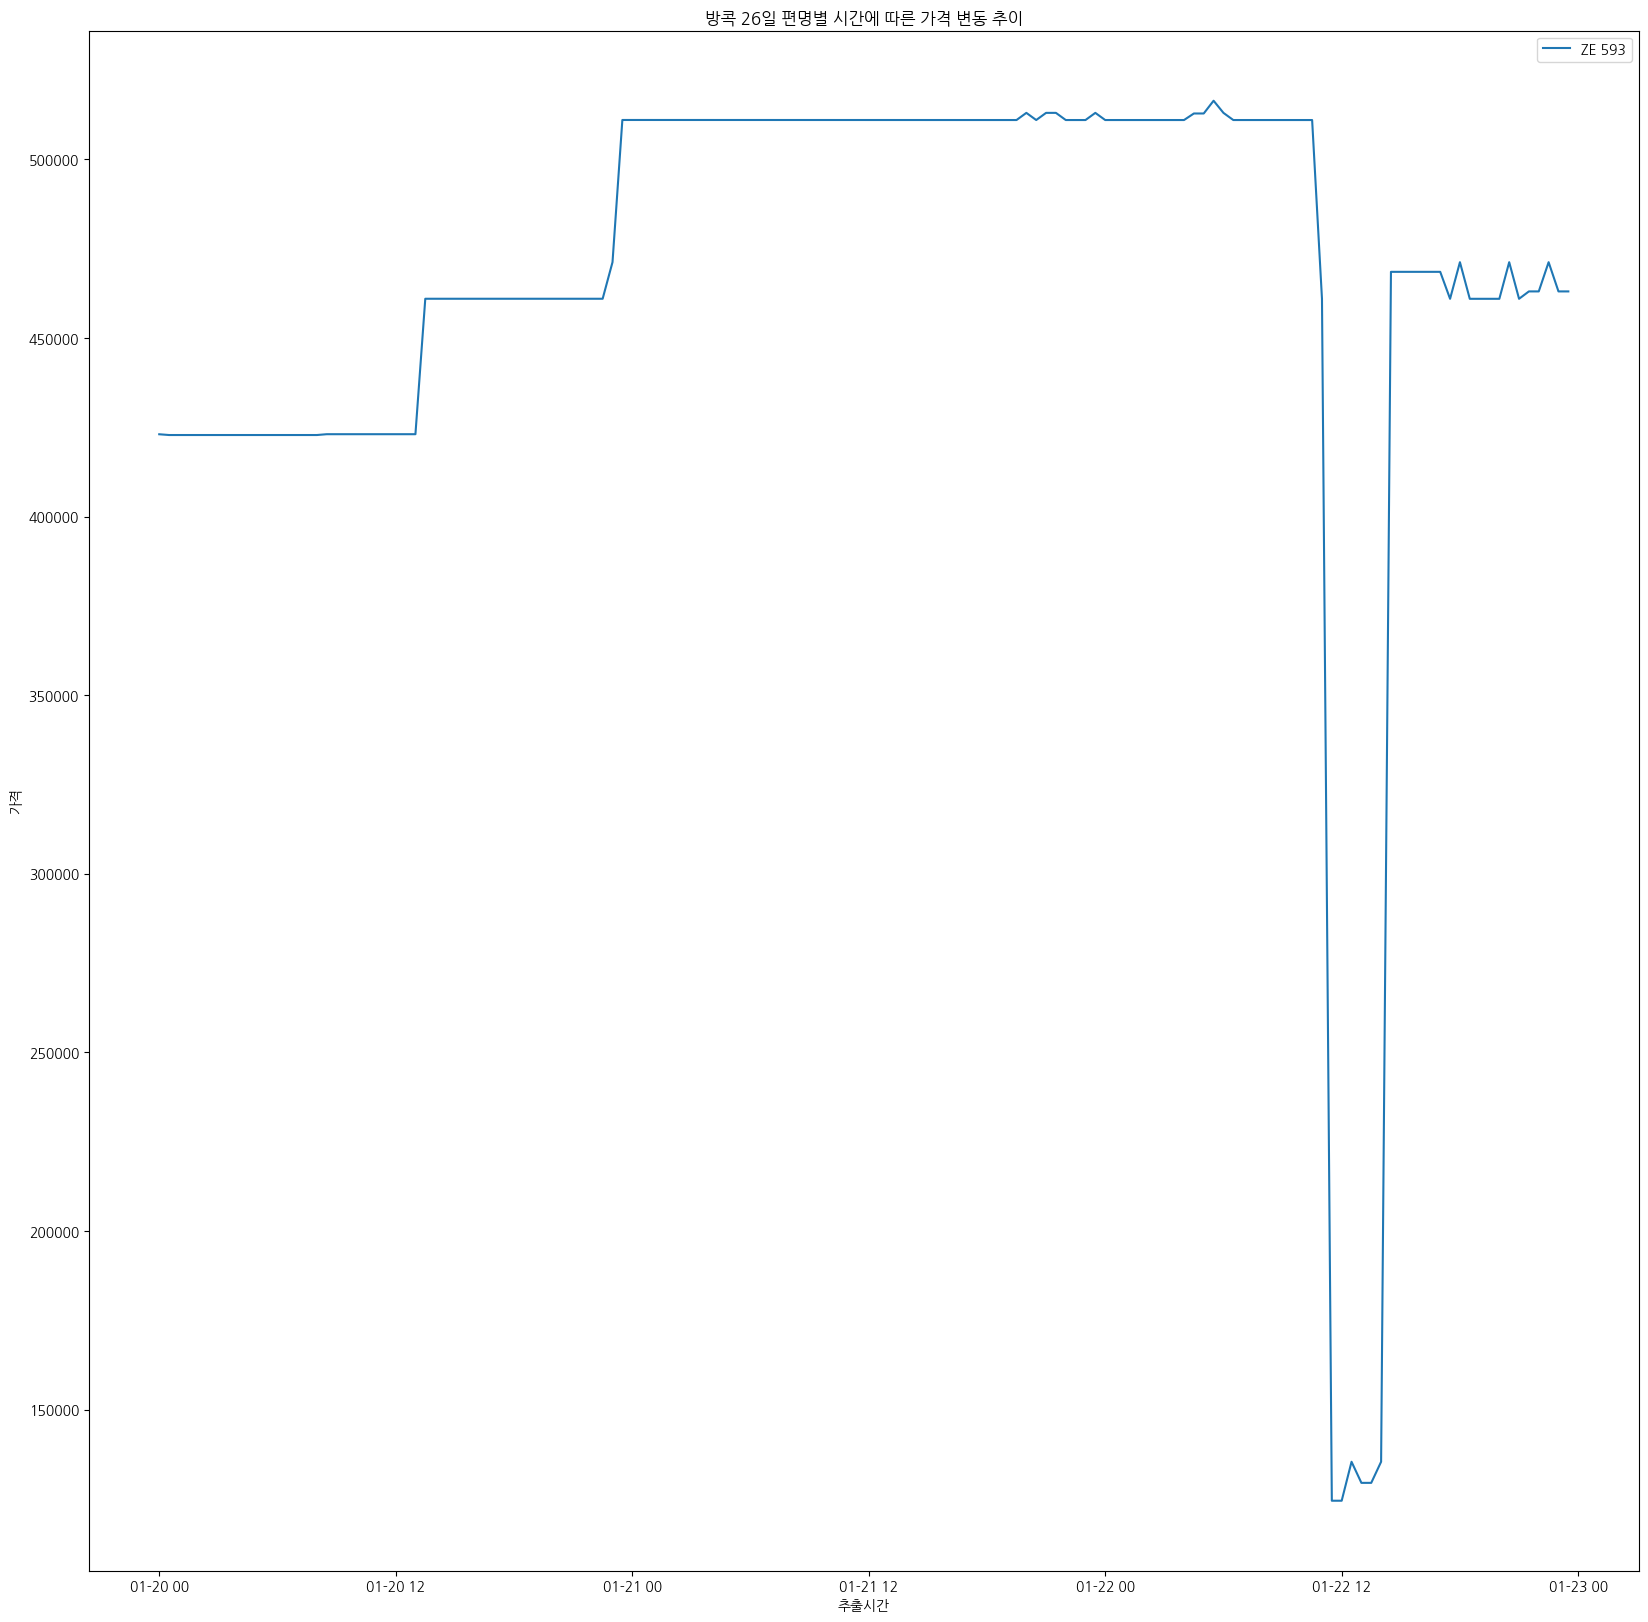

In [422]:
import koreanize_matplotlib
grouped_number = danang_26_sorted[danang_26_sorted['편명'] == 'ZE 593']
# grouped_date = danang_26_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
# for name, group in grouped_number:
plt.plot(grouped_number['추출시간'], grouped_number['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

In [423]:
danang_26_sorted = danang_26_sorted[danang_26_sorted['편명'] != 'ZE 593']

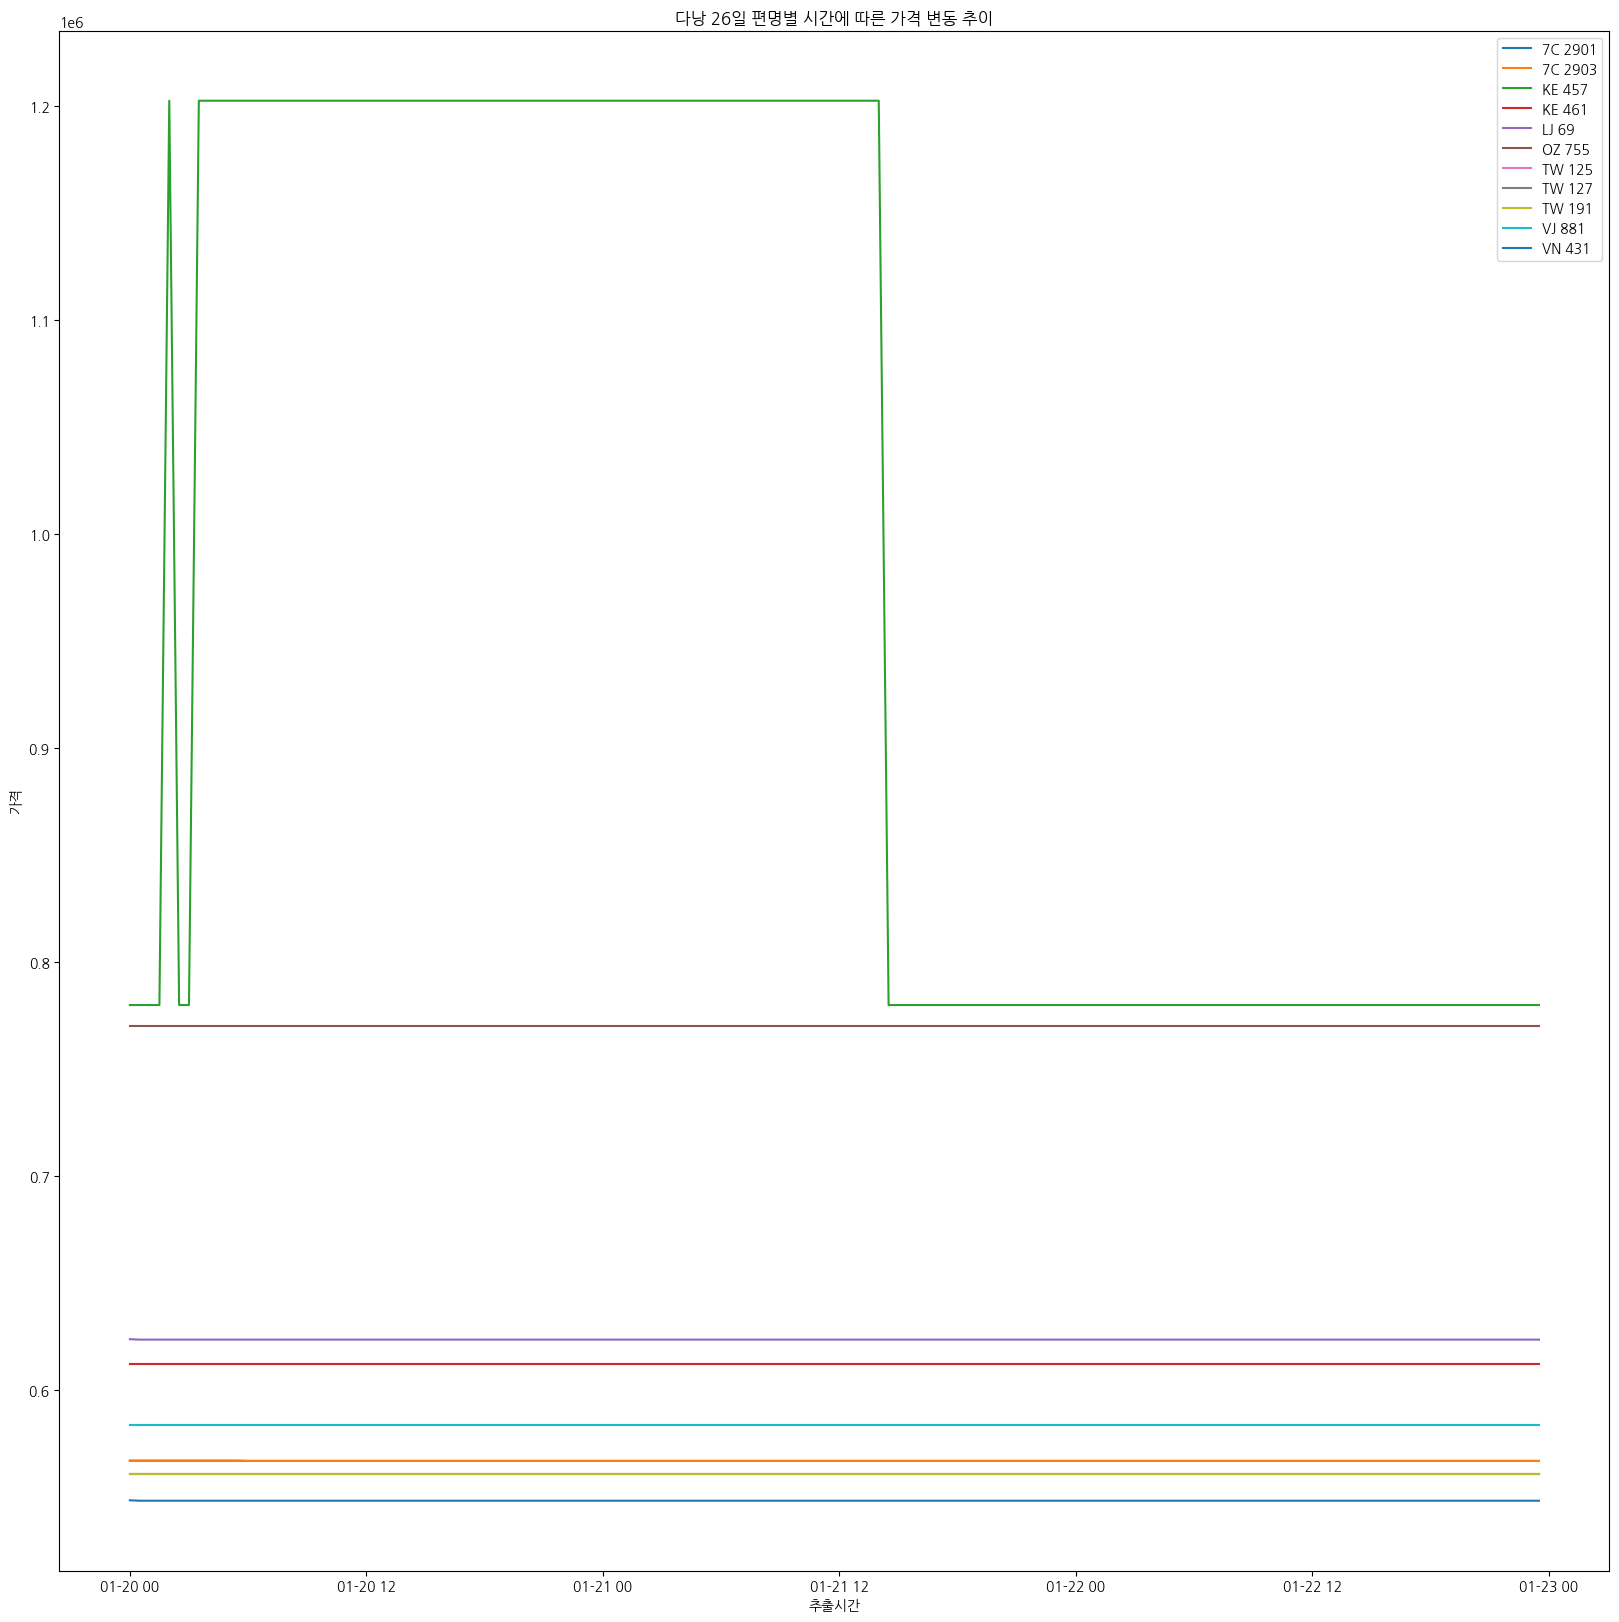

In [41]:
import koreanize_matplotlib
grouped_number = danang_26_sorted.groupby('편명')
grouped_date = danang_26_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('다낭 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

### danang 27

In [96]:
list_danang_27 = danang_27_sorted['편명'].unique()

# 편명마다 결측치가 있는지 프린트
for raw in list_danang_27:
    print("편명:", raw, "개수:", len(danang_27_sorted[danang_27_sorted['편명']==raw]))
print('')

편명: 7C 2901 개수: 127
편명: 7C 2903 개수: 144
편명: KE 457 개수: 144
편명: KE 461 개수: 144
편명: LJ 69 개수: 144
편명: OZ 755 개수: 144
편명: TW 125 개수: 143
편명: TW 127 개수: 144
편명: TW 191 개수: 144
편명: VJ 875 개수: 144
편명: VJ 879 개수: 143
편명: VJ 881 개수: 144
편명: VN 431 개수: 144



In [97]:
# 제거
for raw in list_danang_27:
    if len(danang_27_sorted[danang_27_sorted['편명']==raw]) != 144:
        print("편명 : ", raw, "제거합니다!.")
        danang_27_sorted = danang_27_sorted[danang_27_sorted['편명'] != raw]

편명 :  7C 2901 제거합니다!.
편명 :  TW 125 제거합니다!.
편명 :  VJ 879 제거합니다!.


In [98]:
list_danang_27 = danang_27_sorted['편명'].unique()
print("제거 후 편명 리스트 :", list_danang_27)
print('')


for raw in list_danang_27:
    print("편명:", raw, "개수:", len(danang_27_sorted[danang_27_sorted['편명']==raw]))

제거 후 편명 리스트 : ['7C 2903' 'KE 457' 'KE 461' 'LJ 69' 'OZ 755' 'TW 127' 'TW 191' 'VJ 875'
 'VJ 881' 'VN 431']

편명: 7C 2903 개수: 144
편명: KE 457 개수: 144
편명: KE 461 개수: 144
편명: LJ 69 개수: 144
편명: OZ 755 개수: 144
편명: TW 127 개수: 144
편명: TW 191 개수: 144
편명: VJ 875 개수: 144
편명: VJ 881 개수: 144
편명: VN 431 개수: 144


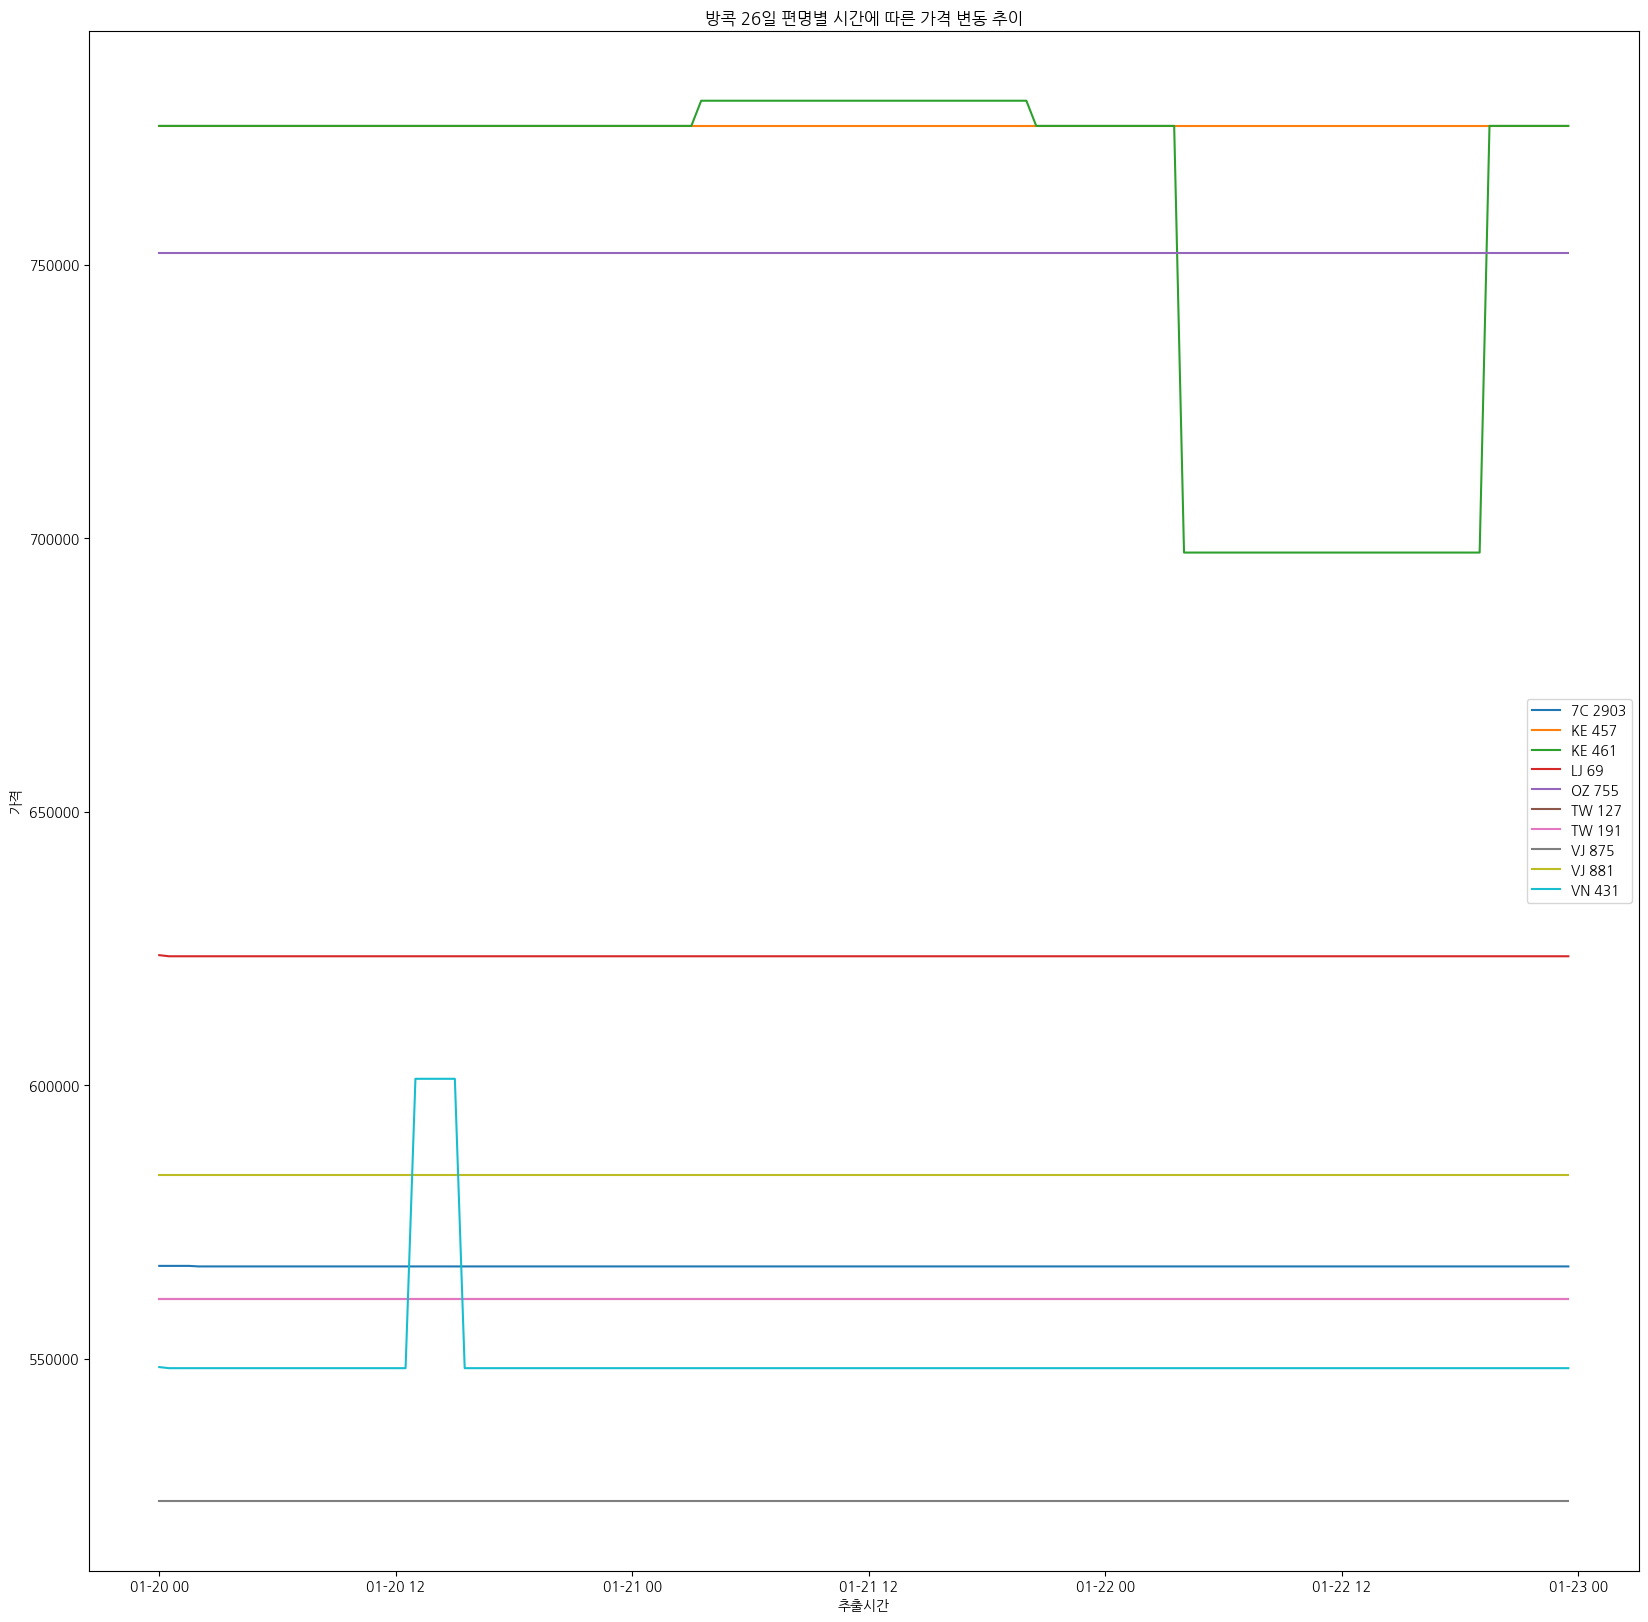

In [99]:
import koreanize_matplotlib
grouped_number = danang_27_sorted.groupby('편명')
grouped_date = danang_27_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()


## 이상치 제거

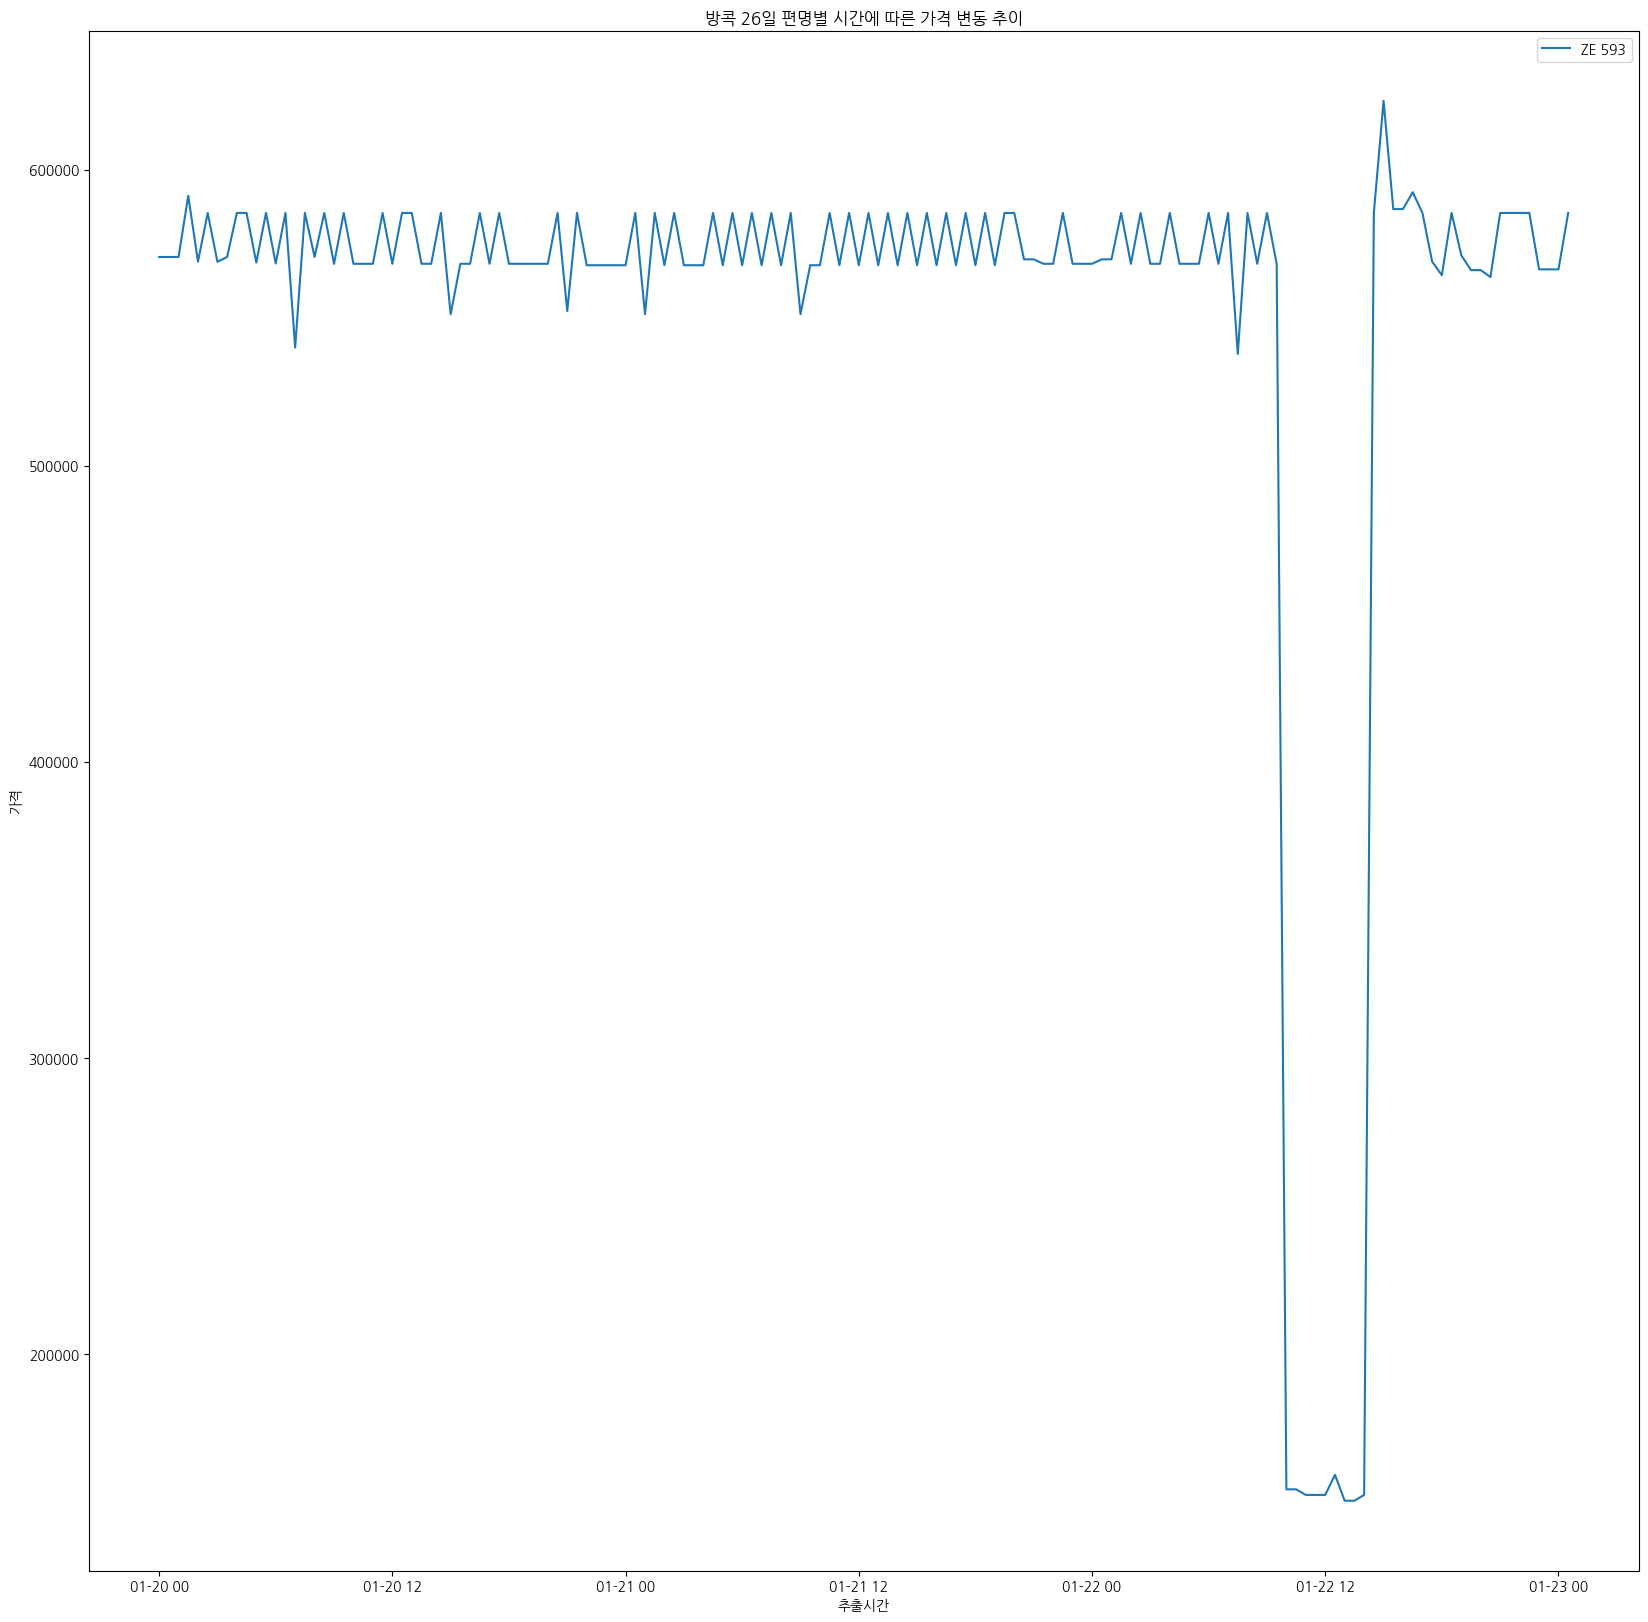

In [429]:
import koreanize_matplotlib

grouped_number = danang_27_sorted[danang_27_sorted['편명'] == 'VJ 881']

# grouped_date = danang_27_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
# for name, group in grouped_number:
plt.plot(grouped_number['추출시간'], grouped_number['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

In [430]:
danang_27_sorted = danang_27_sorted[danang_27_sorted['편명'] != 'VJ 881']

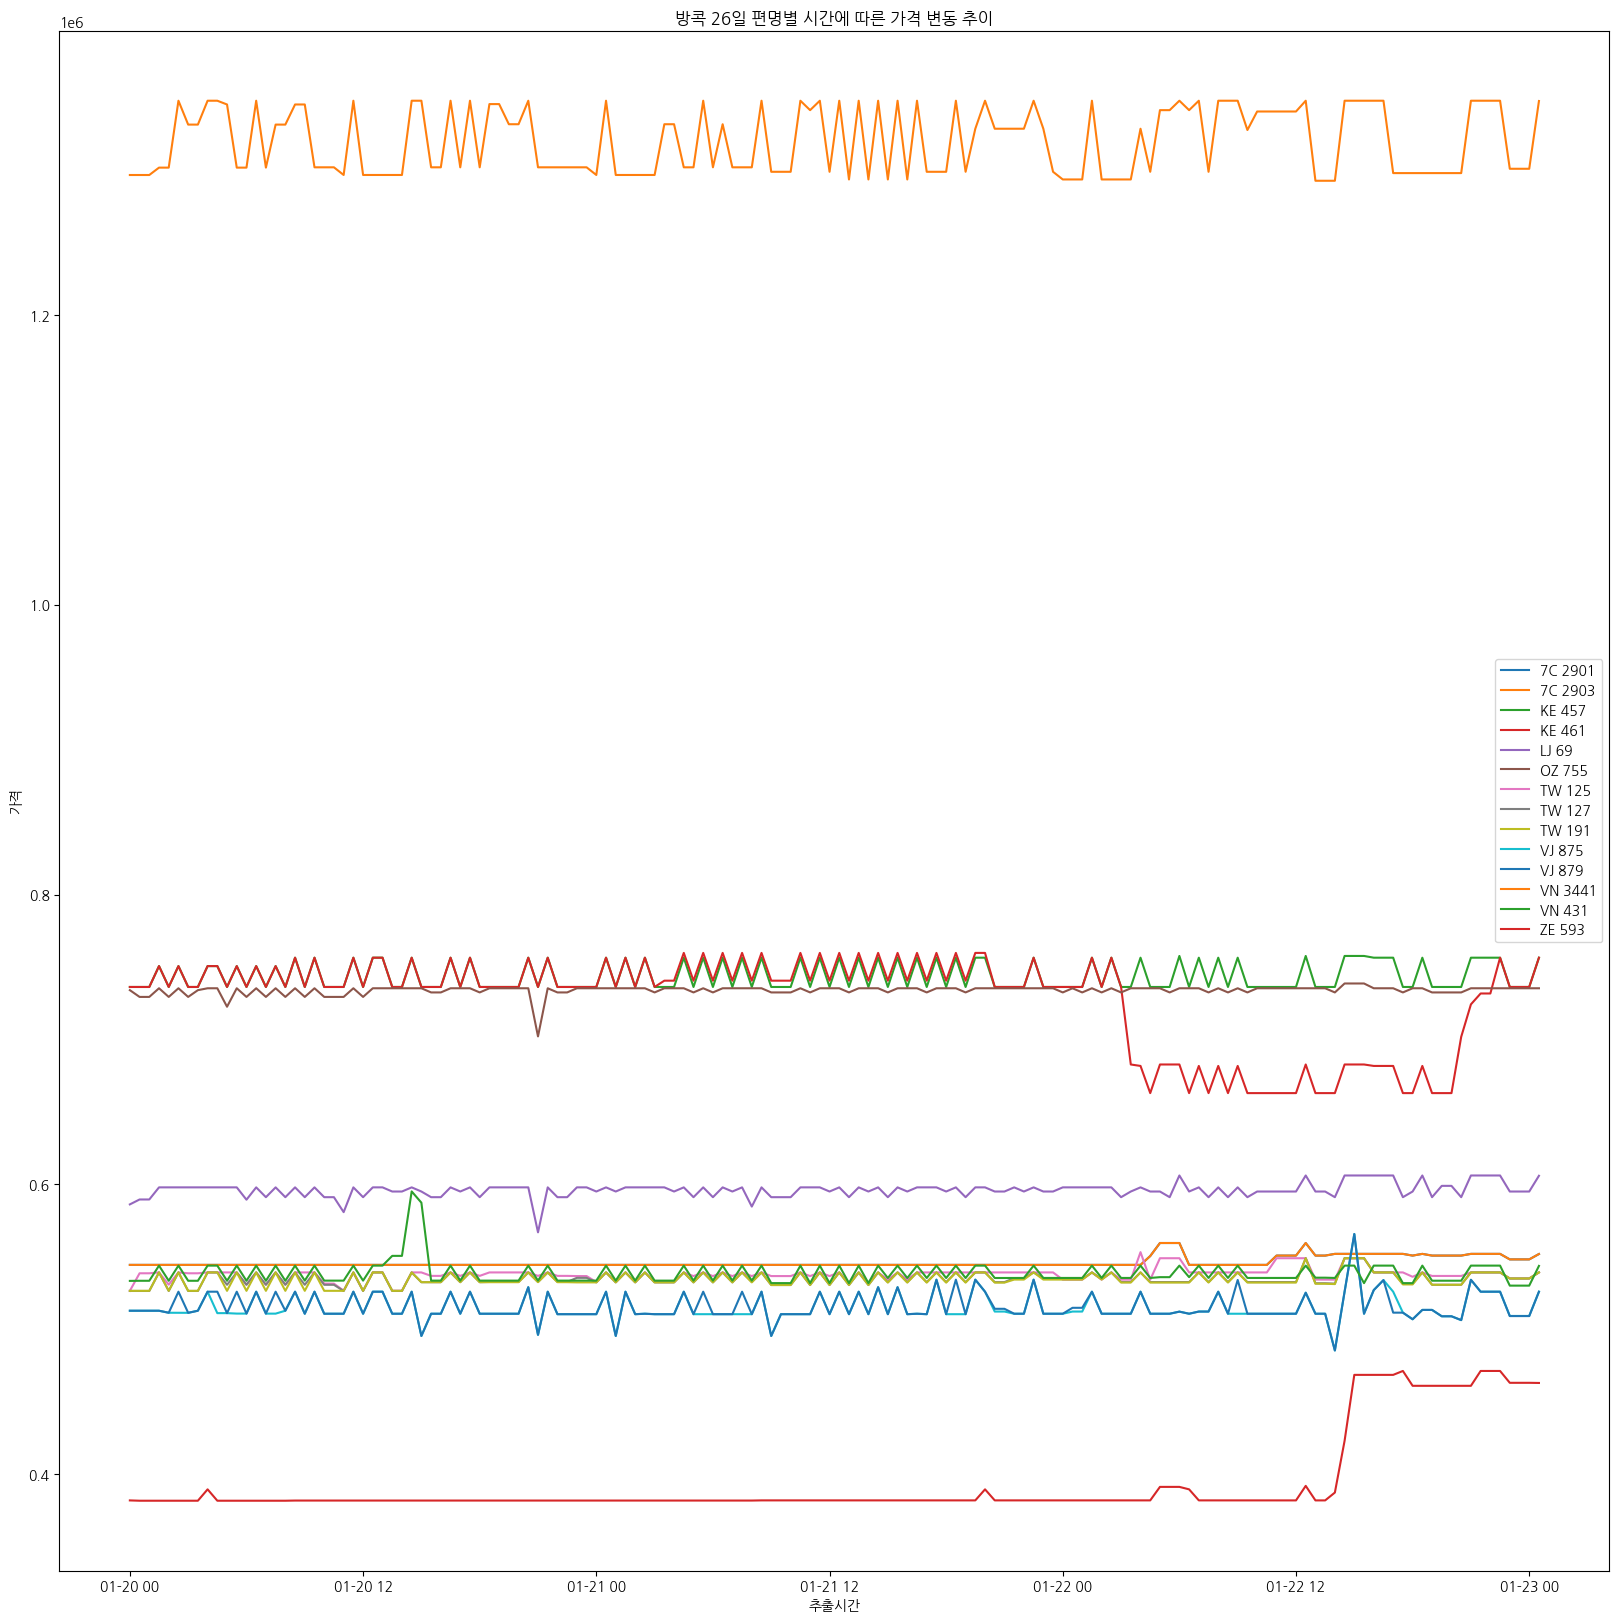

In [431]:
import koreanize_matplotlib
grouped_number = danang_27_sorted.groupby('편명')
grouped_date = danang_27_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

### 오사카 26

In [100]:
list_osaka26 = osaka_26_sorted['편명'].unique()

# 편명마다 결측치가 있는지 프린트
for raw in list_osaka26:
    print("편명:", raw, "개수:", len(osaka_26_sorted[osaka_26_sorted['편명']==raw]))
print('')

편명: 7C 1302 개수: 144
편명: 7C 1304 개수: 144
편명: 7C 1306 개수: 144
편명: 7C 1308 개수: 118
편명: 7C 1382 개수: 144
편명: 7C 1384 개수: 144
편명: BX 172 개수: 44
편명: BX 174 개수: 144
편명: BX 176 개수: 115
편명: KE 2117 개수: 144
편명: KE 2119 개수: 144
편명: KE 721 개수: 144
편명: KE 723 개수: 144
편명: KE 725 개수: 144
편명: KE 727 개수: 77
편명: LJ 233 개수: 144
편명: LJ 235 개수: 144
편명: LJ 239 개수: 144
편명: LJ 241 개수: 144
편명: MM 702 개수: 144
편명: MM 706 개수: 143
편명: MM 710 개수: 144
편명: MM 712 개수: 144
편명: OZ 112 개수: 144
편명: OZ 114 개수: 144
편명: OZ 1145 개수: 144
편명: OZ 116 개수: 144
편명: OZ 1165 개수: 144
편명: TW 281 개수: 144
편명: TW 283 개수: 144
편명: TW 285 개수: 144



In [101]:
# 제거
for raw in list_osaka26:
    if len(osaka_26_sorted[osaka_26_sorted['편명']==raw]) != 144:
        print("편명 : ", raw, "제거합니다!.")
        osaka_26_sorted = osaka_26_sorted[osaka_26_sorted['편명'] != raw]

편명 :  7C 1308 제거합니다!.
편명 :  BX 172 제거합니다!.
편명 :  BX 176 제거합니다!.
편명 :  KE 727 제거합니다!.
편명 :  MM 706 제거합니다!.


In [102]:
list_osaka26 = osaka_26_sorted['편명'].unique()
print("제거 후 편명 리스트 :", list_osaka26)
print('')


for raw in list_osaka26:
    print("편명:", raw, "개수:", len(osaka_26_sorted[osaka_26_sorted['편명']==raw]))

제거 후 편명 리스트 : ['7C 1302' '7C 1304' '7C 1306' '7C 1382' '7C 1384' 'BX 174' 'KE 2117'
 'KE 2119' 'KE 721' 'KE 723' 'KE 725' 'LJ 233' 'LJ 235' 'LJ 239' 'LJ 241'
 'MM 702' 'MM 710' 'MM 712' 'OZ 112' 'OZ 114' 'OZ 1145' 'OZ 116' 'OZ 1165'
 'TW 281' 'TW 283' 'TW 285']

편명: 7C 1302 개수: 144
편명: 7C 1304 개수: 144
편명: 7C 1306 개수: 144
편명: 7C 1382 개수: 144
편명: 7C 1384 개수: 144
편명: BX 174 개수: 144
편명: KE 2117 개수: 144
편명: KE 2119 개수: 144
편명: KE 721 개수: 144
편명: KE 723 개수: 144
편명: KE 725 개수: 144
편명: LJ 233 개수: 144
편명: LJ 235 개수: 144
편명: LJ 239 개수: 144
편명: LJ 241 개수: 144
편명: MM 702 개수: 144
편명: MM 710 개수: 144
편명: MM 712 개수: 144
편명: OZ 112 개수: 144
편명: OZ 114 개수: 144
편명: OZ 1145 개수: 144
편명: OZ 116 개수: 144
편명: OZ 1165 개수: 144
편명: TW 281 개수: 144
편명: TW 283 개수: 144
편명: TW 285 개수: 144


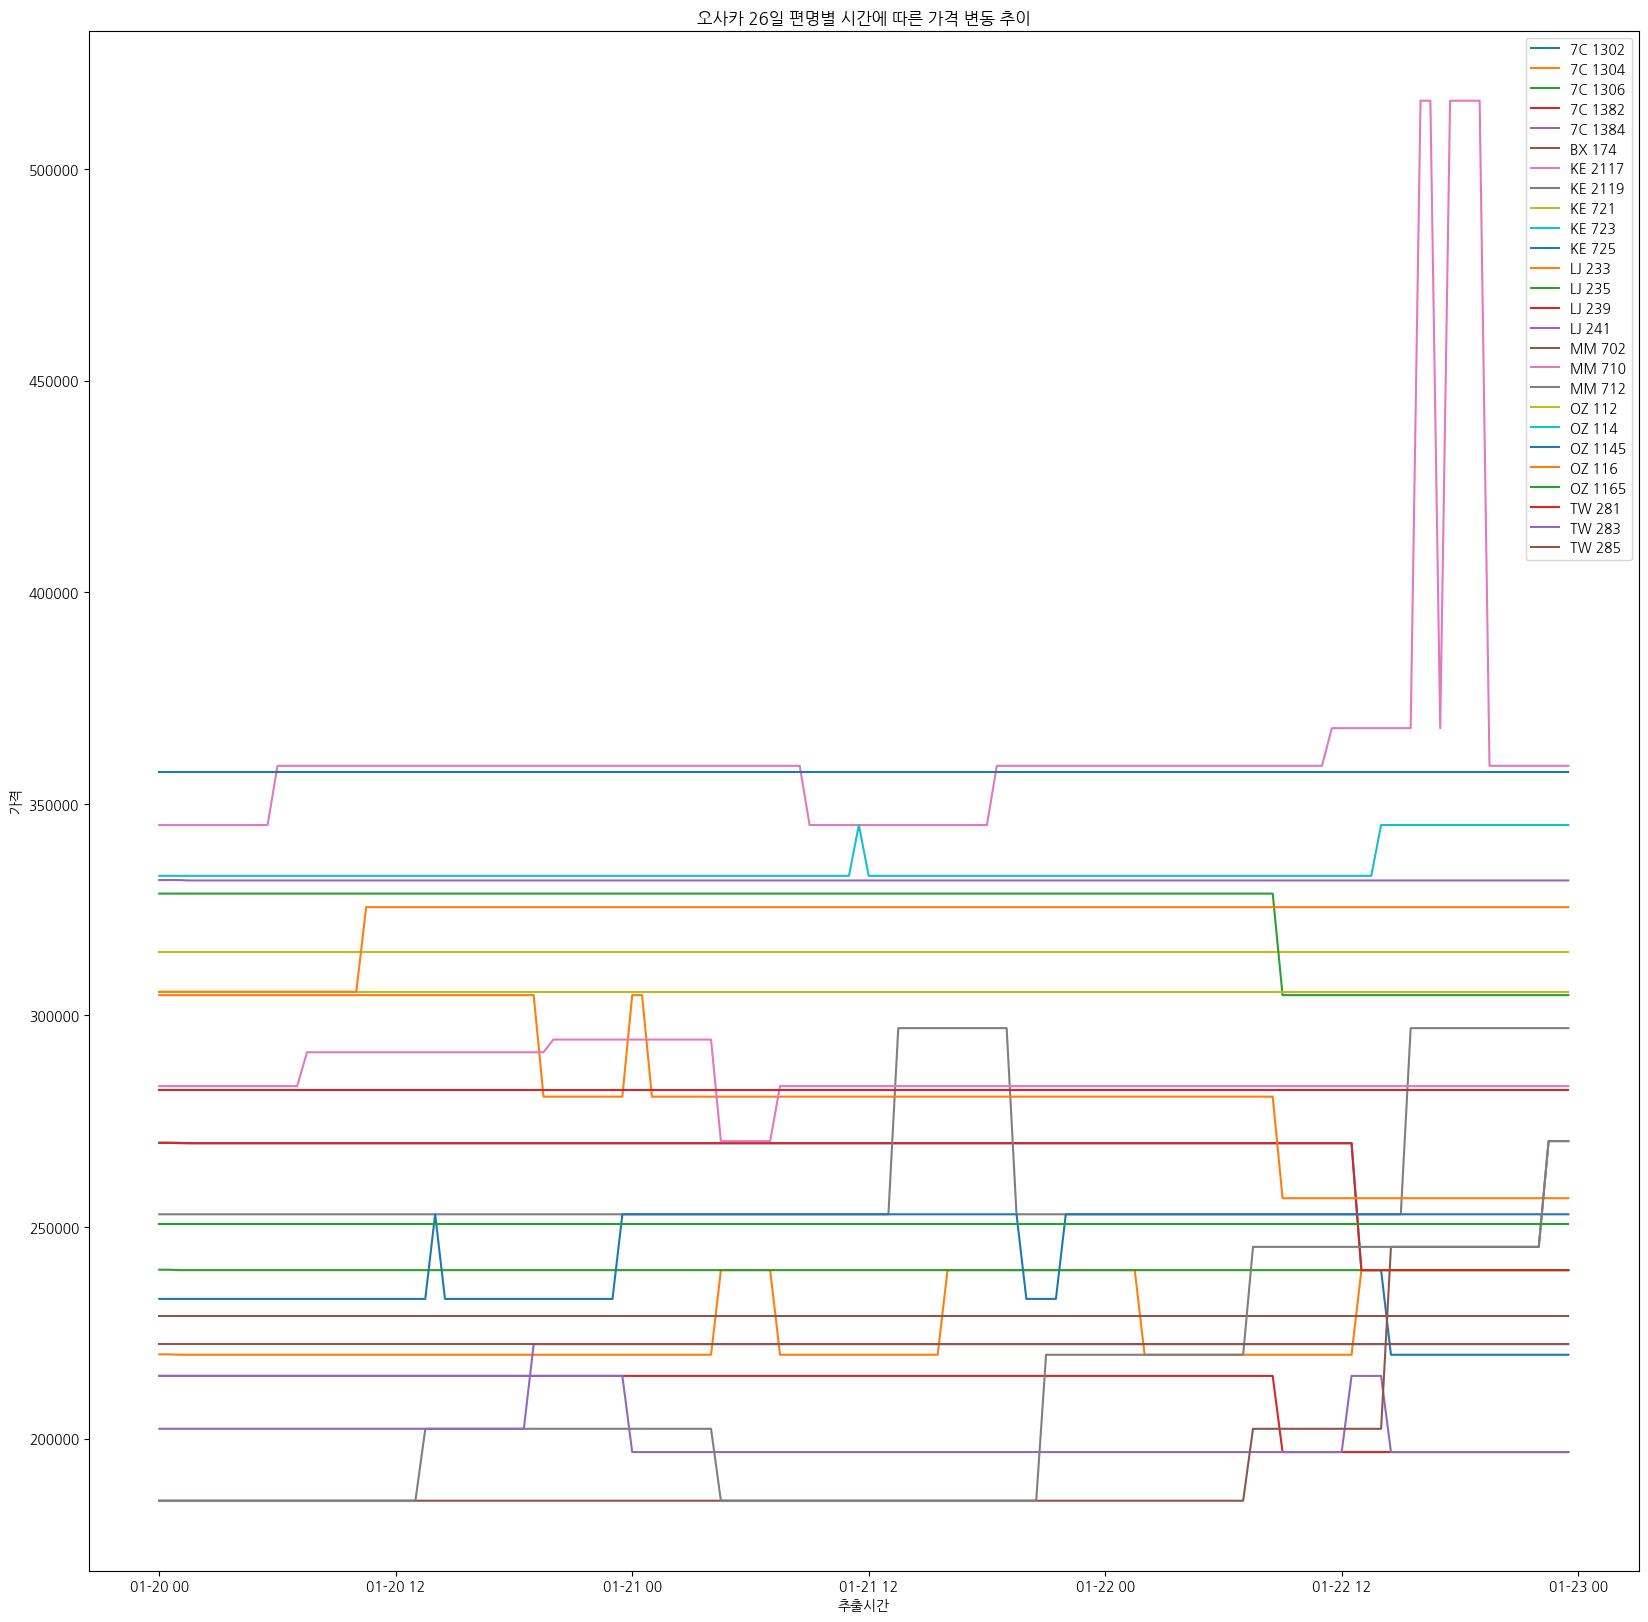

In [105]:
import koreanize_matplotlib
grouped_number = osaka_26_sorted.groupby('편명')
grouped_date = osaka_26_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('오사카 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

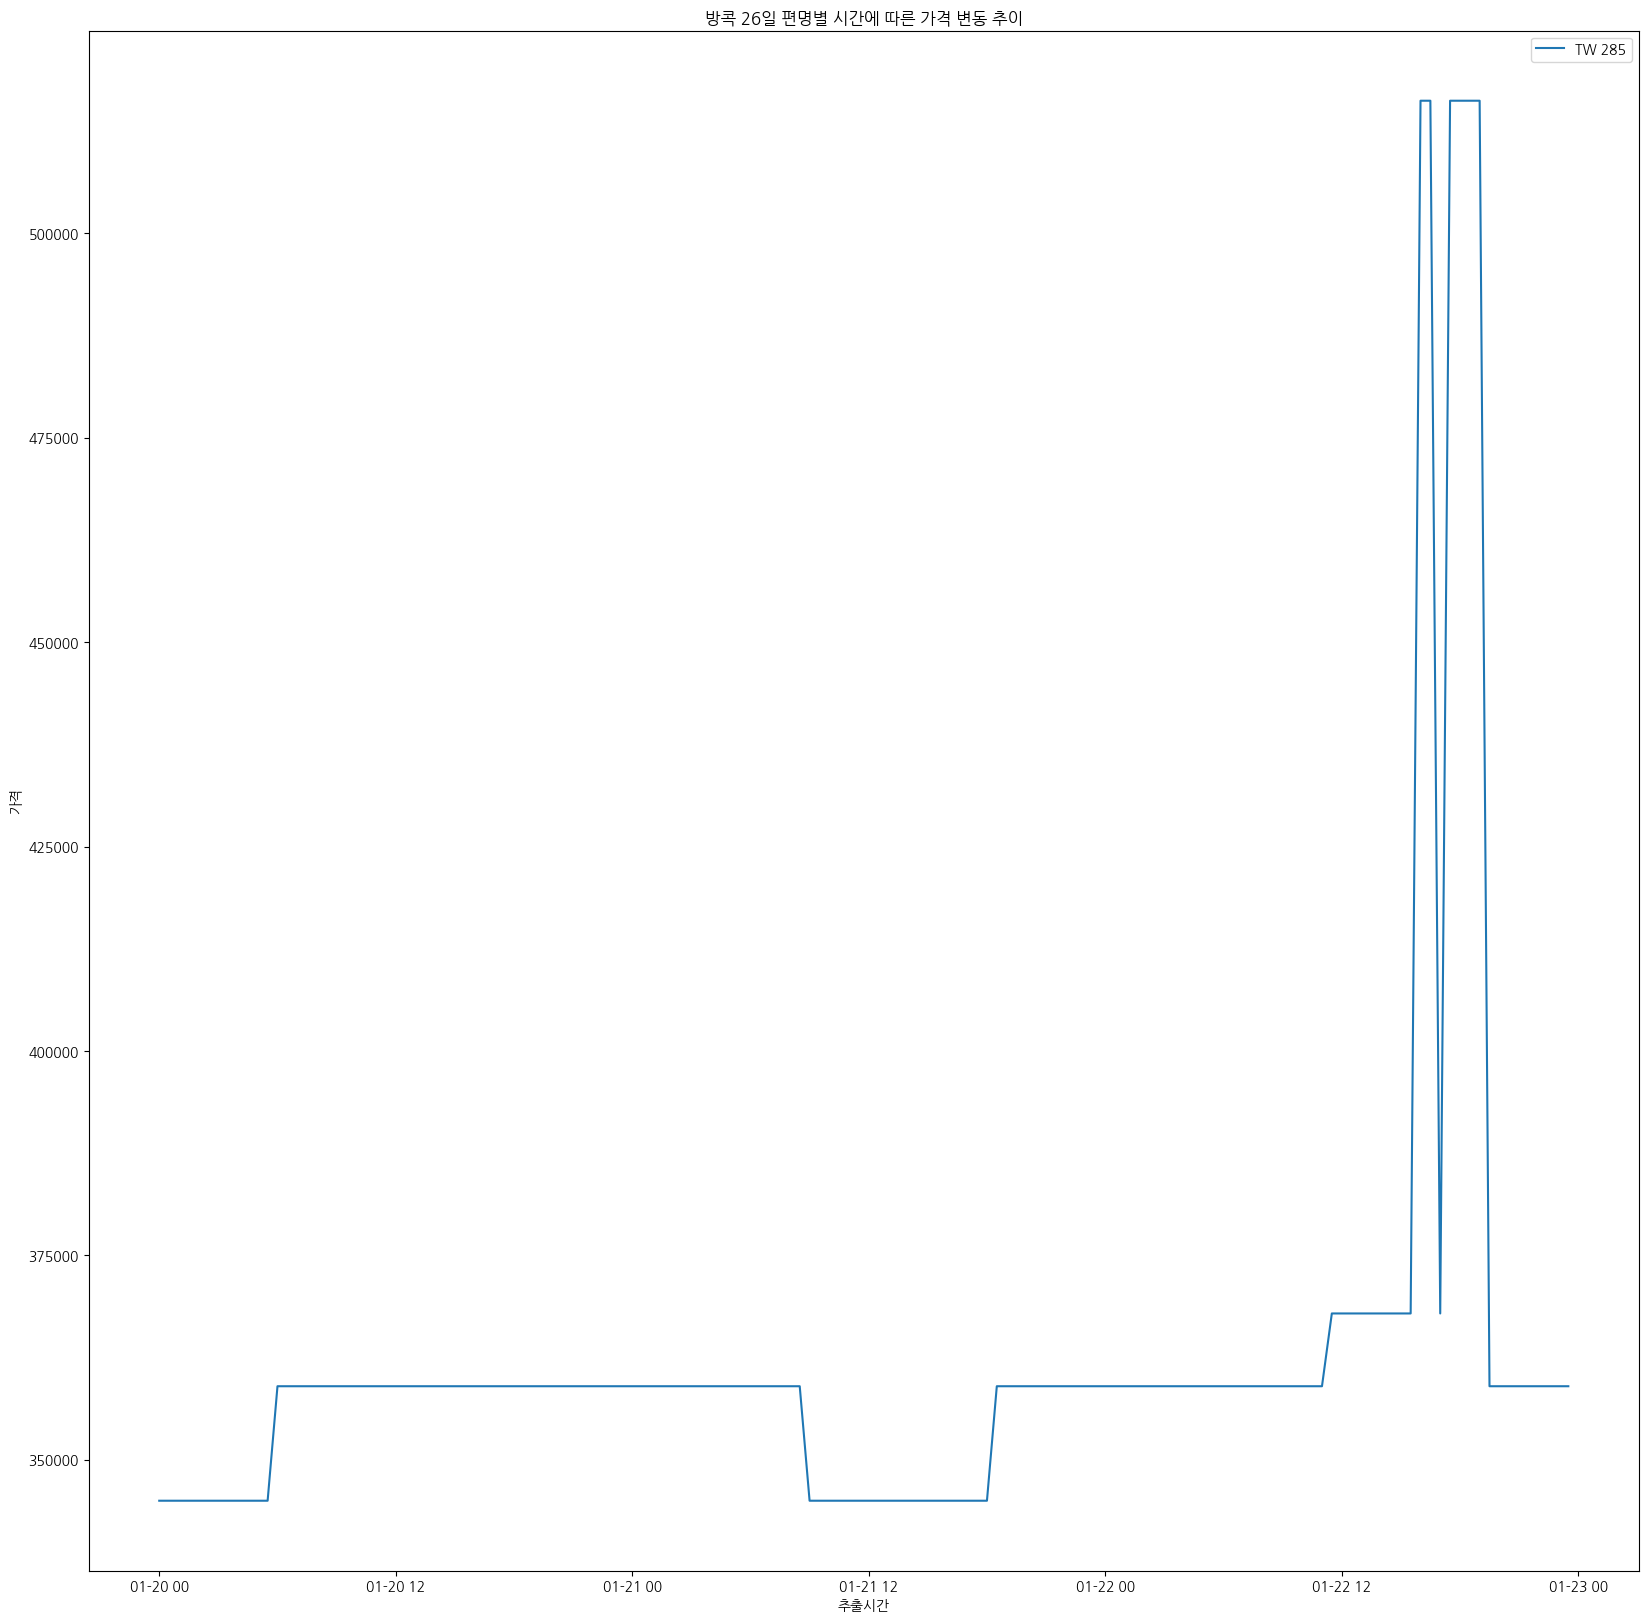

In [106]:
## 이상치 제거
import koreanize_matplotlib

grouped_number = osaka_26_sorted[osaka_26_sorted['편명'] == 'KE 2117']

# grouped_date = osaka_26_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
# for name, group in grouped_number:
plt.plot(grouped_number['추출시간'], grouped_number['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

In [107]:
osaka_26_sorted = osaka_26_sorted[osaka_26_sorted['편명'] != 'KE 2117']

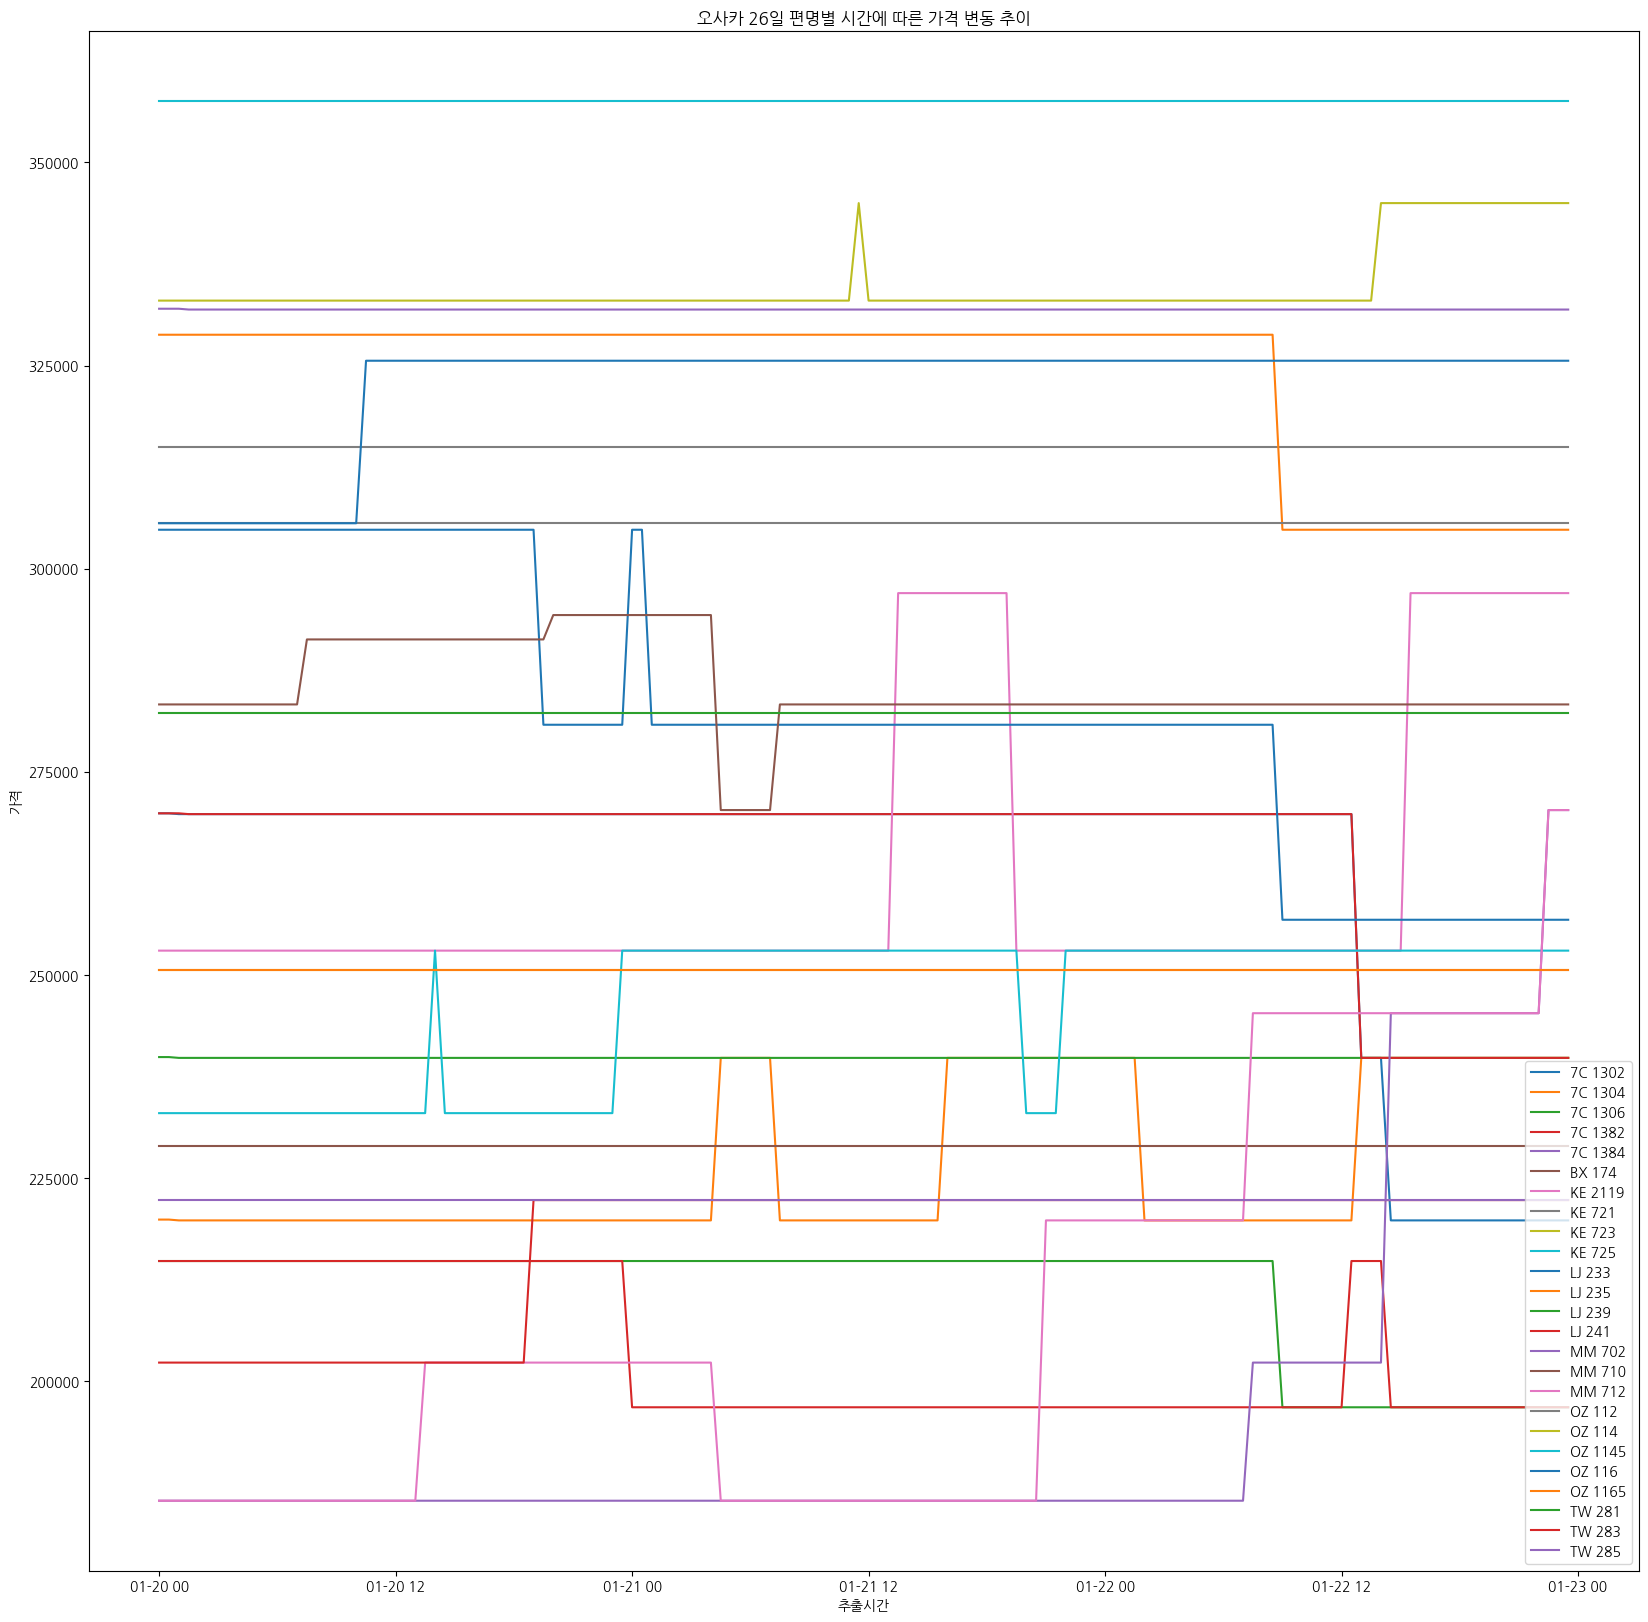

In [108]:
import koreanize_matplotlib
grouped_number = osaka_26_sorted.groupby('편명')
grouped_date = osaka_26_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('오사카 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

## 오사카 27

In [109]:
list_osaka27 = osaka_27_sorted['편명'].unique()

# 편명마다 결측치가 있는지 프린트
for raw in list_osaka27:
    print("편명:", raw, "개수:", len(osaka_27_sorted[osaka_27_sorted['편명']==raw]))
print('')

편명: 7C 1302 개수: 144
편명: 7C 1304 개수: 144
편명: 7C 1306 개수: 144
편명: 7C 1308 개수: 144
편명: 7C 1382 개수: 144
편명: 7C 1384 개수: 142
편명: BX 172 개수: 144
편명: BX 174 개수: 144
편명: BX 176 개수: 144
편명: KE 2117 개수: 144
편명: KE 2119 개수: 144
편명: KE 721 개수: 144
편명: KE 723 개수: 144
편명: KE 725 개수: 144
편명: KE 727 개수: 144
편명: LJ 233 개수: 144
편명: LJ 235 개수: 144
편명: LJ 239 개수: 144
편명: LJ 241 개수: 144
편명: MM 702 개수: 144
편명: MM 706 개수: 144
편명: MM 710 개수: 144
편명: MM 712 개수: 144
편명: OZ 112 개수: 144
편명: OZ 114 개수: 144
편명: OZ 1145 개수: 144
편명: OZ 116 개수: 144
편명: OZ 1165 개수: 144
편명: OZ 118 개수: 144
편명: TW 281 개수: 144
편명: TW 283 개수: 143
편명: TW 285 개수: 144



In [110]:
# 제거
for raw in list_osaka27:
    if len(osaka_27_sorted[osaka_27_sorted['편명']==raw]) != 144:
        print("편명 : ", raw, "제거합니다!.")
        osaka_27_sorted = osaka_27_sorted[osaka_27_sorted['편명'] != raw]

편명 :  7C 1384 제거합니다!.
편명 :  TW 283 제거합니다!.


In [111]:
list_osaka27 = osaka_27_sorted['편명'].unique()
print("제거 후 편명 리스트 :", list_osaka27)
print('')


for raw in list_osaka27:
    print("편명:", raw, "개수:", len(osaka_27_sorted[osaka_27_sorted['편명']==raw]))

제거 후 편명 리스트 : ['7C 1302' '7C 1304' '7C 1306' '7C 1308' '7C 1382' 'BX 172' 'BX 174'
 'BX 176' 'KE 2117' 'KE 2119' 'KE 721' 'KE 723' 'KE 725' 'KE 727' 'LJ 233'
 'LJ 235' 'LJ 239' 'LJ 241' 'MM 702' 'MM 706' 'MM 710' 'MM 712' 'OZ 112'
 'OZ 114' 'OZ 1145' 'OZ 116' 'OZ 1165' 'OZ 118' 'TW 281' 'TW 285']

편명: 7C 1302 개수: 144
편명: 7C 1304 개수: 144
편명: 7C 1306 개수: 144
편명: 7C 1308 개수: 144
편명: 7C 1382 개수: 144
편명: BX 172 개수: 144
편명: BX 174 개수: 144
편명: BX 176 개수: 144
편명: KE 2117 개수: 144
편명: KE 2119 개수: 144
편명: KE 721 개수: 144
편명: KE 723 개수: 144
편명: KE 725 개수: 144
편명: KE 727 개수: 144
편명: LJ 233 개수: 144
편명: LJ 235 개수: 144
편명: LJ 239 개수: 144
편명: LJ 241 개수: 144
편명: MM 702 개수: 144
편명: MM 706 개수: 144
편명: MM 710 개수: 144
편명: MM 712 개수: 144
편명: OZ 112 개수: 144
편명: OZ 114 개수: 144
편명: OZ 1145 개수: 144
편명: OZ 116 개수: 144
편명: OZ 1165 개수: 144
편명: OZ 118 개수: 144
편명: TW 281 개수: 144
편명: TW 285 개수: 144


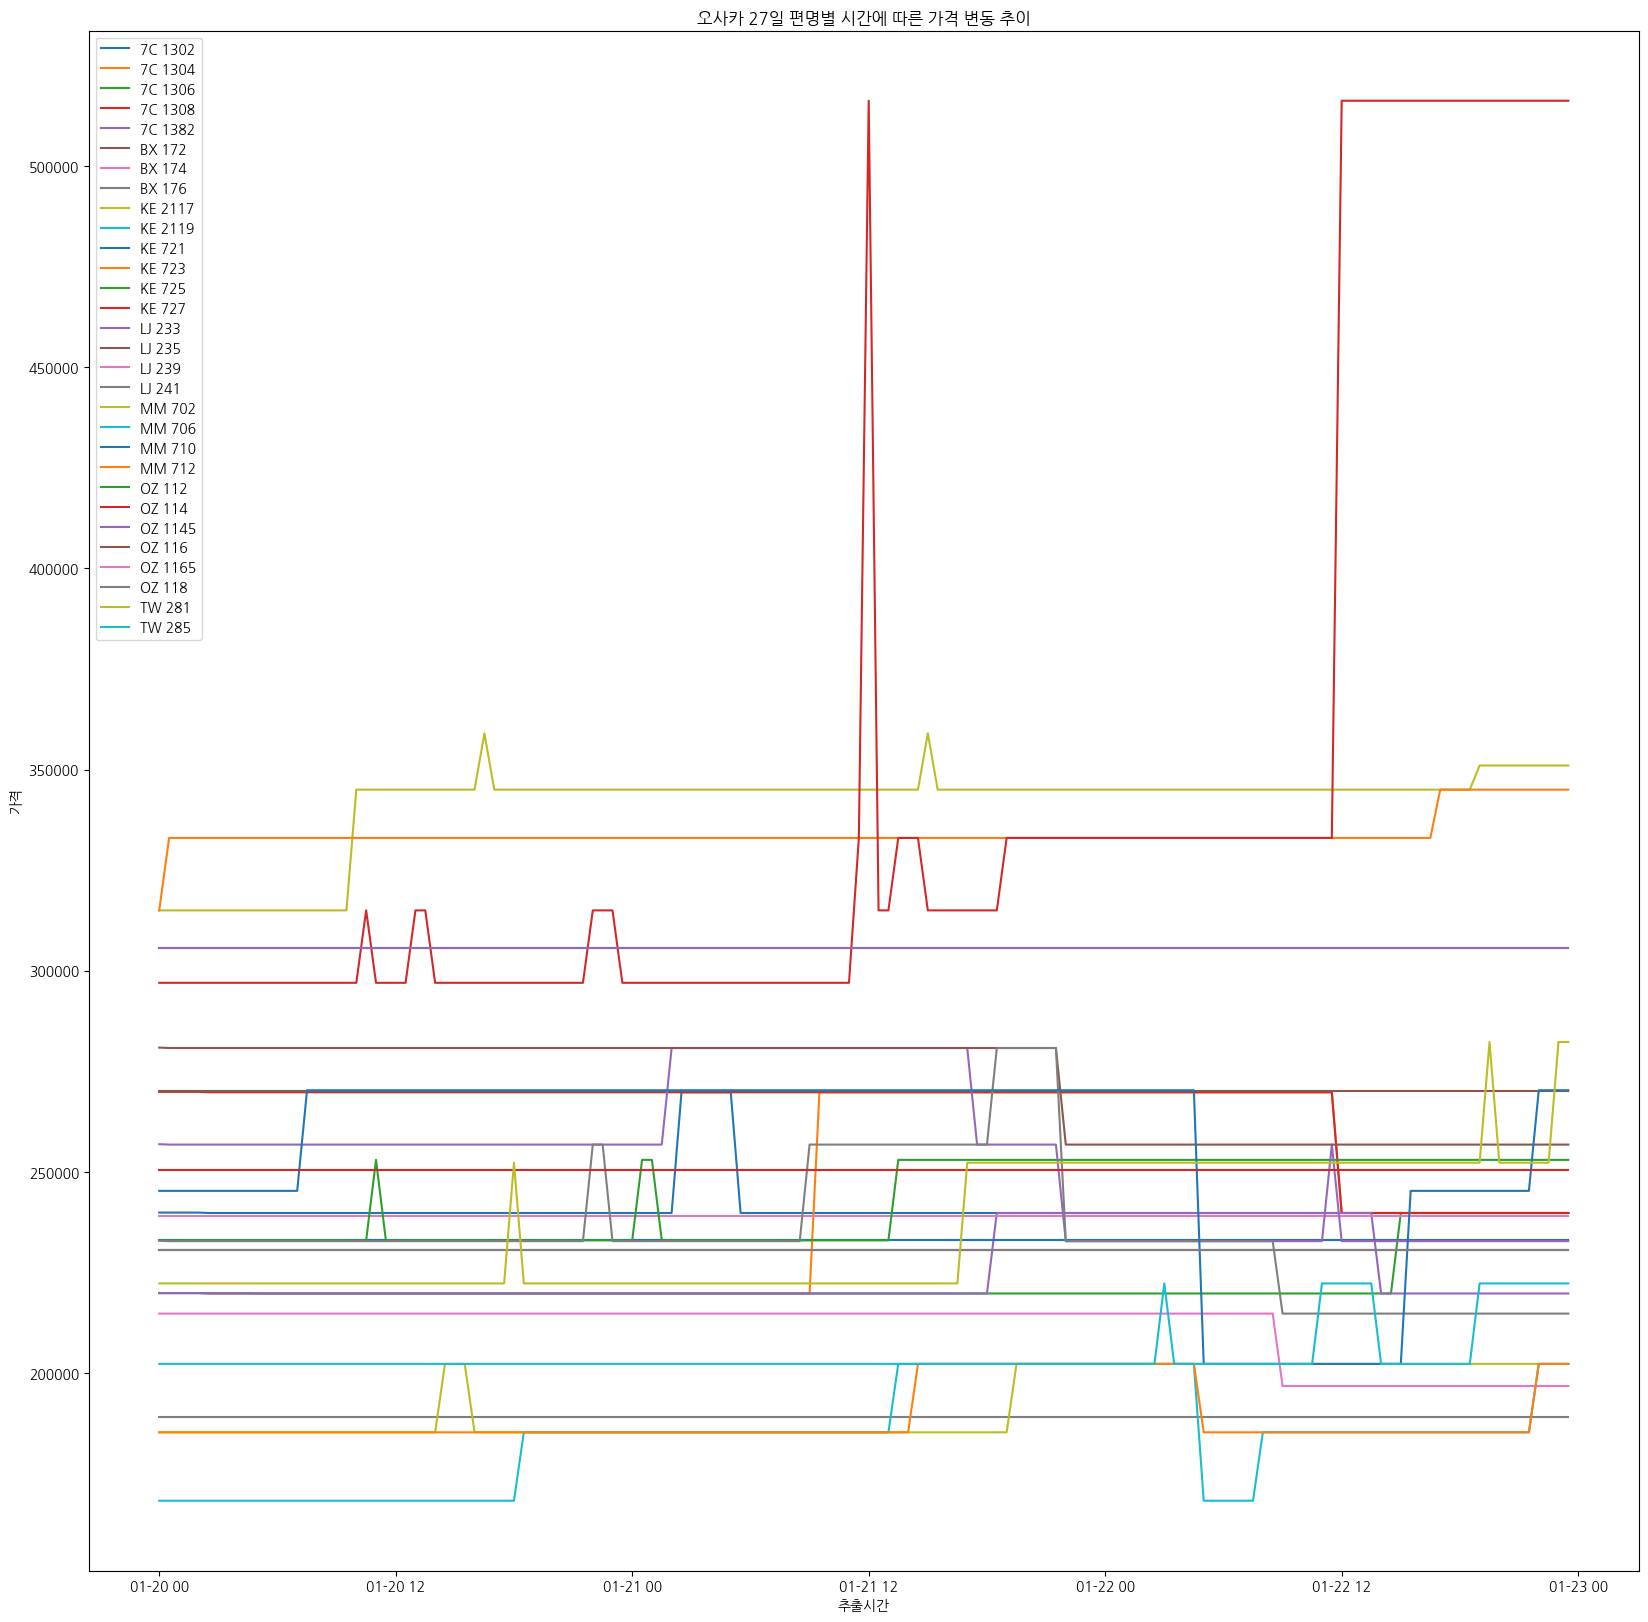

In [112]:
import koreanize_matplotlib
grouped_number = osaka_27_sorted.groupby('편명')
grouped_date = osaka_27_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('오사카 27일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

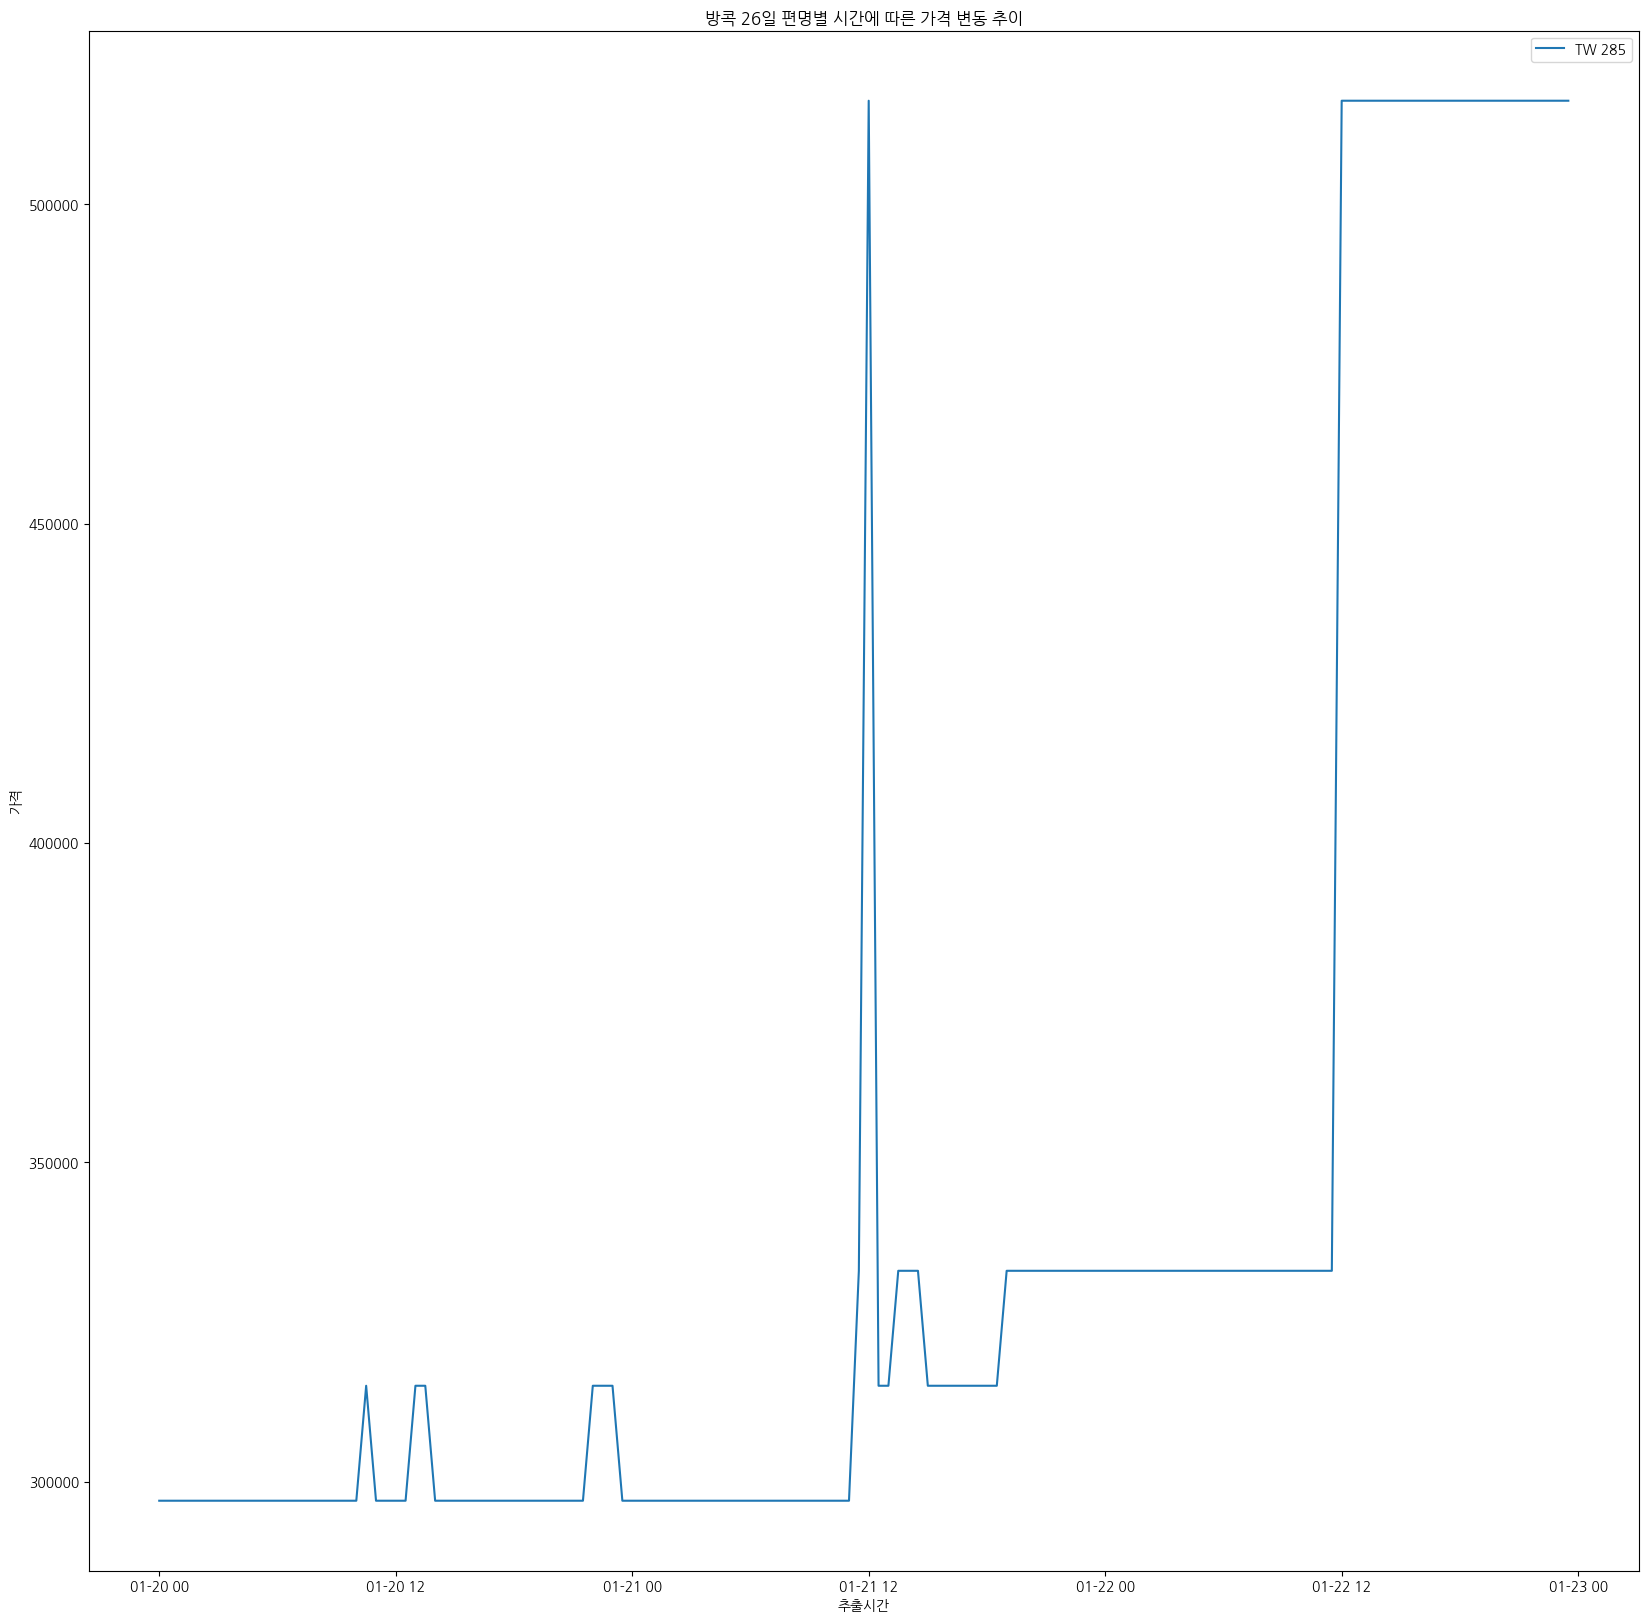

In [113]:
## 이상치 제거
import koreanize_matplotlib

grouped_number = osaka_27_sorted[osaka_27_sorted['편명'] == 'KE 727']

# grouped_date = osaka_27_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
# for name, group in grouped_number:
plt.plot(grouped_number['추출시간'], grouped_number['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

In [114]:
osaka_27_sorted = osaka_27_sorted[osaka_27_sorted['편명'] != 'KE 727']

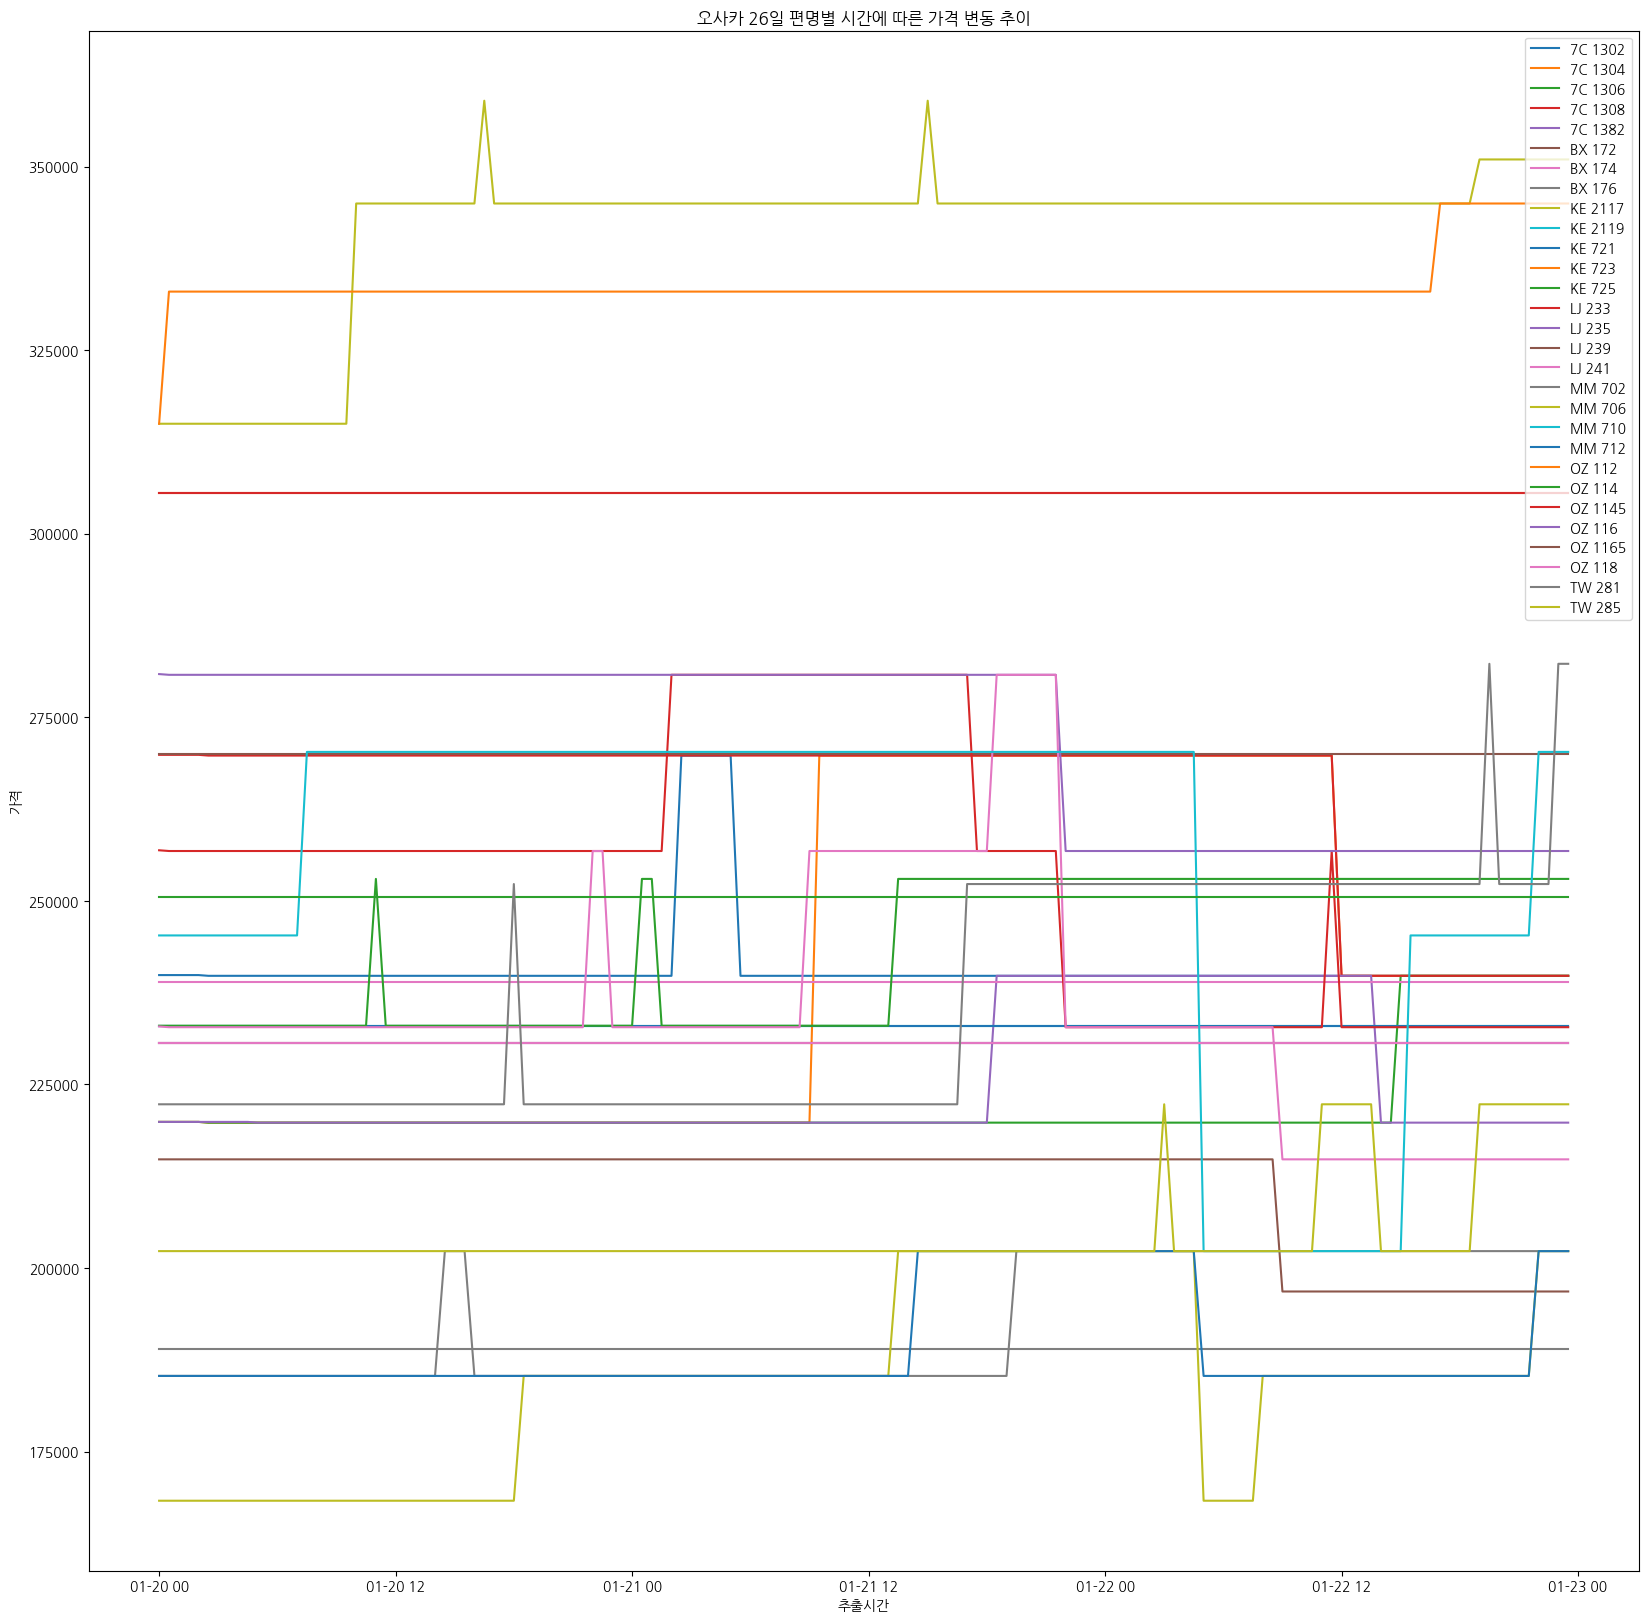

In [115]:
import koreanize_matplotlib
grouped_number = osaka_27_sorted.groupby('편명')
grouped_date = osaka_27_sorted.groupby('추출시간')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('추출시간')
plt.ylabel('가격')
plt.title('오사카 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

In [116]:
bangkok_26_sorted = bangkok_26_sorted.reset_index(drop=True)
bangkok_27_sorted = bangkok_27_sorted.reset_index(drop=True)

danang_26_sorted = danang_26_sorted.reset_index(drop=True)
danang_27_sorted = danang_27_sorted.reset_index(drop=True)

osaka_26_sorted = osaka_26_sorted.reset_index(drop=True)
osaka_27_sorted = osaka_27_sorted.reset_index(drop=True)

In [117]:
bangkok_26_sorted.to_csv("/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/전처리 마무리 구글 데이터/final_bangkok_26_google.csv", index=False)
bangkok_27_sorted.to_csv("/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/전처리 마무리 구글 데이터/final_bangkok_27_google.csv", index=False)

danang_26_sorted.to_csv("/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/전처리 마무리 구글 데이터/final_danang_26_google.csv", index=False)
danang_27_sorted.to_csv("/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/전처리 마무리 구글 데이터/final_danang_27_google.csv", index=False)

osaka_26_sorted.to_csv("/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/전처리 마무리 구글 데이터/final_osaka_26_google.csv", index=False)
osaka_27_sorted.to_csv("/home/subin/amr_ws/eda/src/project/Raw_data/최종 raw/전처리 마무리 구글 데이터/final_osaka_27_google.csv", index=False)
